## Flight Fare Prediction

<table>
    <tr>
        <th>Project Title</th>
        <td>Flight Fare Prediction</td>
    </tr>
    <tr>
        <th>Technologies</th>
        <td>Machine Learning Technology</td>
    </tr>
    <tr>
        <th>Domain</th>
        <td>Aviation</td>
    </tr>
</table>

### Problem Statement
Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights,
destination, and duration of flights various occasions such as vacations or festive
season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in the provided dataset.

### Approach
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing.

### Features
1. Airline
    * The airline providing the flight service.
2. Date_of_Journey
    * The date when the flight departs.
3. Source
    * The departure city or airport.
4. Destination
    * The arrival city or airport.
5. Route
    * Route taken by flight.
6. Dep_Time
    * The time when the flight departs.
7. Arrival_Time
    * The time of day when the flight arrives.
8. Duration
    * Total duration of the flight in minutes.
9. Total_Stops
     * Number of stops in flight.
10. Additional_Info
    * Other features that may impact flight fare, including the provision of in-flight meals.
11. Price
    * The cost of the flight ticket.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import warnings
import IPython.display

# Any warning created by pandas, python, other library will be ignored
warnings.filterwarnings("ignore")
# Setting Maximum number of displaying columns to None to see all columns
pd.set_option('display.max_columns', None)

In [3]:
# For this notebook I have stored a copy of data inside notebooks directory
train_dataset_path = '../data/Data_Train.xlsx'
test_dataset_path = '../data/Test_set.xlsx'
sub_dataset_path = '../data/Sample_submission.xlsx'

# reading dataset
train = pd.read_excel(train_dataset_path)
test = pd.read_excel(test_dataset_path)
sub = pd.read_excel(sub_dataset_path)

In [4]:
def get_details(data: pd.DataFrame) -> None:
    '''
    Displays the details, information and statistics about data.
    * Details = Number of Rows, Columns.
    * Details = Datatypes information, Top 5 and Last 5 rows of data.
    * Statistics = NaN Values, Descriptive Statistics.
    ## Parameters
    `data`: Pandas DataFrame Object
    '''

    def title(string: str, width=50) -> None:
        '''
        Prints a centered string of length width(default=50).
        ### Example
        >>> title('abc')
        '----------------------abc-----------------------'
        >>>
        '''
        print(string.center(width, '_'))
    
    title('Shape')
    Rows = data.shape[0]
    Columns = data.shape[1]
    print(f'{Rows=}\n{Columns=}')

    title('Types')
    # Displays the dtypes object to cell output
    IPython.display.display(data.dtypes)

    title('Head')
    # displays the data.head to cell output
    IPython.display.display(data.head())

    title('Tail')
    IPython.display.display(data.tail())

    title('Nan Values')
    IPython.display.display(data.isna().sum())
    
    title('Statistics')
    # displays the descriptive statistics to cell output
    IPython.display.display(data.describe(include='all').T)

### Dataset Information

In [5]:
# details of train dataset
get_details(train)

______________________Shape_______________________
Rows=10683
Columns=11
______________________Types_______________________


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

_______________________Head_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


_______________________Tail_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


____________________Nan Values____________________


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

____________________Statistics____________________


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion: Here we can see that column Route and Total_Stops have missing values, 75% of flight's Price is less than ₹ 13000. Most of the flight are from Jet Airways Airline.

In [6]:
# details of test dataset
get_details(test)

______________________Shape_______________________
Rows=2671
Columns=10
______________________Types_______________________


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

_______________________Head_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


_______________________Tail_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


____________________Nan Values____________________


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

____________________Statistics____________________


,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL → BOM → COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


Here we can see that the test dataset is missing a **Price** column. Similarly in Test data most of the flights are from Jet Airways. there are no NaN values in Test.

In [7]:
# details of sub dataset
get_details(sub)

______________________Shape_______________________
Rows=2671
Columns=1
______________________Types_______________________


Price    int64
dtype: object

_______________________Head_______________________


,Price
0,15998
1,16612
2,25572
3,25778
4,16934


_______________________Tail_______________________


,Price
2666,14046
2667,14086
2668,22720
2669,23544
2670,27489


____________________Nan Values____________________


Price    0
dtype: int64

____________________Statistics____________________


,count,mean,std,min,25%,50%,75%,max
Price,2671.0,20159.514414,5005.399225,10138.0,16469.5,19582.0,23476.5,64881.0


**Handling Missing** Value in the train data, as we see previously the Route and Total_Stops columns each has 1 missing value.

First checking Route column

In [8]:
# Filtering rows based on missing value in Route column
train[train['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Both the NaN values of Route and Total_Stops are present in this row, Now filter rows whose Source is 'Delhi' and Destination is 'Cochin'

In [9]:
row_filter = (train['Source'] == 'Delhi') & (train['Destination'] == 'Cochin')
temp = train.loc[row_filter]
temp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794


Based on the filter we have 4537 rows.
In the missing row the Airline is 'Air India' and the Duration of Flight is 23h 40m.
Now adding Airline and Duration filter

In [10]:
row_filter = (train['Airline'] == 'Air India') & (train['Source'] == 'Delhi') & (train['Destination'] == 'Cochin') & (train['Duration'] == '23h 40m')
temp = train.loc[row_filter]
temp.shape

(27, 11)

Now we have 27 rows including missing value

In [11]:
temp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1336,Air India,9/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Mar,23h 40m,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Jun,23h 40m,2 stops,No info,10975
1862,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Jun,23h 40m,2 stops,No info,10975
2343,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 16 May,23h 40m,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
3272,Air India,27/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Mar,23h 40m,2 stops,No info,7090
3595,Air India,18/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 19 May,23h 40m,1 stop,No info,8372
4280,Air India,1/04/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 02 Apr,23h 40m,1 stop,No info,5117
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480


The missing value in Route column is either "DEL → HYD → MAA → COK" or "DEL → MAA → COK" and Total_Stops is either "1 stop" if Route is "DEL → MAA → COK" and "2 stops" if Route is "DEL → HYD → MAA → COK".
Here I am grouping above 27 rows based on Route and then take the median of Price, If the price of a route is near to the missing value price then that route used as replacement for missing value.

In [12]:
# Price of Flight in the missing row
temp[temp['Route'].isna()]['Price'].values

array([7480])

In [13]:
# Median price of flight on each Route
temp.groupby('Route').Price.median()

Route
DEL → HYD → MAA → COK    10975.0
DEL → MAA → COK           7506.0
Name: Price, dtype: float64

The price of Route "DEL → MAA → COK" is nearly equal to the price of missing row, So replacing "DEL → MAA → COK" with NaN value in Route and this route has only 1 stop, also replacing "1 stop" with NaN value in Total_Stops.

In [14]:
train['Route'].fillna(value='DEL → MAA → COK ', inplace=True)
train['Total_Stops'].fillna(value='1 stop', inplace=True)

Dropping duplicated rows in train and test data.

In [15]:
# Droping Duplicates
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [16]:
# Adding both train and test dataset into one dataframe 
df = pd.concat(objs = [train, test], axis=0, ignore_index=True)

In [17]:
# details of the both train and test dataset
get_details(df)

______________________Shape_______________________
Rows=13108
Columns=11
______________________Types_______________________


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

_______________________Head_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


_______________________Tail_______________________


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13103,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13104,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13105,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13106,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13107,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


____________________Nan Values____________________


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2645
dtype: int64

____________________Statistics____________________


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,13108,12,Jet Airways,4586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,13108,44,12/06/2019,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,13108,5,Delhi,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,13108,6,Cochin,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,13108,133,DEL → BOM → COK,2996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,13108,223,18:55,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,13108,1451,19:00,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,13108,374,2h 50m,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,13108,5,1 stop,7053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,13108,10,No info,10309,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These 2645 Nan values are from the missing Price column in test dataset.

Separating the Duration column in data into two column "Duration_Hour", "Duration_Mins".

In [18]:
# Cleaning Data

# Duration is time taken by Flight to reach destination
# It is difference of Arrival Time and Departure Time
# The duration in dataset is written as '10h 50m' splitting it in two columns

# the regex pattern '(\d+)h would match any string that ends with 'h'
hours = df['Duration'].str.extract(pat=r'(\d+)h')
# filling the NaN values with 0 because flight is less than 1 hour
hours.fillna(value=0, inplace=True)

# the regex pattern here '(\d+)m' would match any string that ends with 'm'
minutes = df['Duration'].str.extract(pat=r'(\d+)m')
# filling the NaN values with 0 because flight take proper time in hours
minutes.fillna(value=0, inplace=True)

In [19]:
# converting the hours and minutes into integers as these as extracted from string
df['Duration_Hours'] = hours.astype(int)
df['Duration_Mins'] = minutes.astype(int)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45


In [20]:
# Extracting day of journey from Date
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
# Extracting Month of Journey from Date
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3


Seperating Departure Hour and Departure Minute from Departure Time ("Dep_Time") column.

In [21]:
# Splitting the departure time into two columns using ":" as seperater
# For Departure Hour and Departure Minutes
departure_time = df['Dep_Time'].str.split(pat=':', expand=True)
# converting both columns into integers
df['Dep_Hour'] = departure_time[0].astype(int)
df['Dep_Min'] = departure_time[1].astype(int)

Same for Arrival Time seperating into two column.

In [22]:
# Extracting Arrival Hour and Arrival Minutes from Arrival Time
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


In [24]:
# importing library for graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Arrival Hour

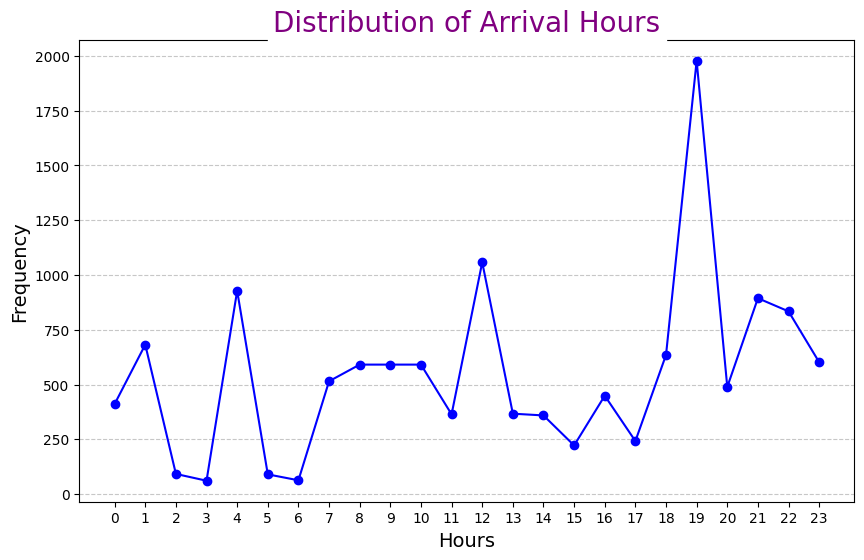

In [25]:
# setting the figure size 10x6
plt.figure(figsize=(10, 6))

# counting the frequency of each Arrival hour
arrival_hour = df['Arrival_Hour'].value_counts().sort_index()

# plotting a line graph of each Arrival Hour
arrival_hour.plot(kind='line', marker='o', color='blue', linestyle='-')

# setting the title of graph
plt.title("Distribution of Arrival Hours", fontsize=20, backgroundcolor='white', color='purple')

# setting the x-axis label of graph
plt.xlabel('Hours', fontsize=14)

# setting the y-axis label of graph
plt.ylabel('Frequency', fontsize=14)

# adding each hour x-axis
plt.xticks(ticks=range(24))

# adding grid lines to graph
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

**Conclusion:** 
1. Most of the flight arrives at 7 PM followed by at 12 PM and 4 AM.
2. Very less number of flight arrives in between 2AM to 3AM and 5AM to 6AM.

### Distribution of Departure Hour

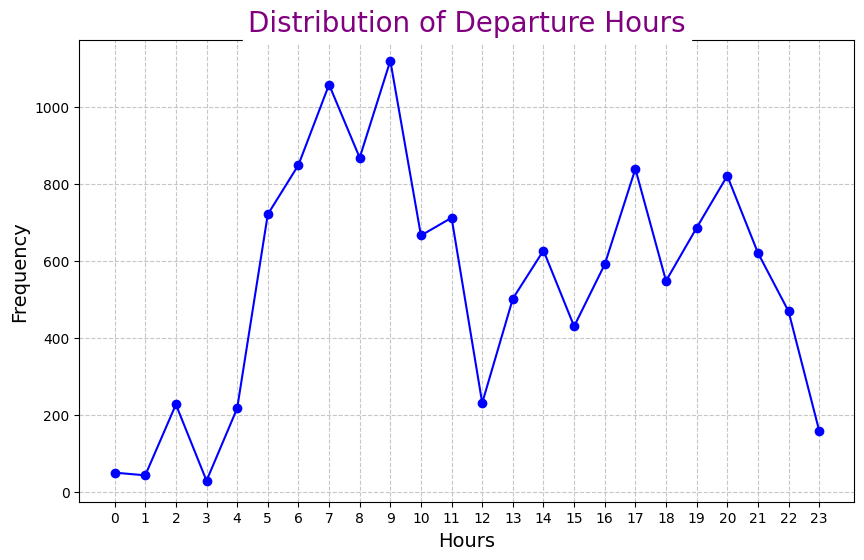

In [26]:
# setting the figure size 10x6
plt.figure(figsize=(10, 6))

# Counting the frequency of each Depature Hour
dep_time = df['Dep_Hour'].value_counts().sort_index()

# plotting a line graph
dep_time.plot(kind='line', marker='o', style='-', color='blue')

# settting the Title of graph
plt.title("Distribution of Departure Hours", fontsize=20, backgroundcolor='white', color='purple')


# setting the x-axis label of graph
plt.xlabel('Hours', fontsize=14)

# setting the y-axis label of graph
plt.ylabel('Frequency', fontsize=14)

# adding each hour on x-axis
plt.xticks(ticks=range(24))

# adding grid lines to graph
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**Conclusion:**
1. Most flight deperature at 7AM and 9 AM followed by 5PM and 8PM.
2. Very less number of flight departure at in between 12AM and 1 AM.

### Price Distribution Across Month

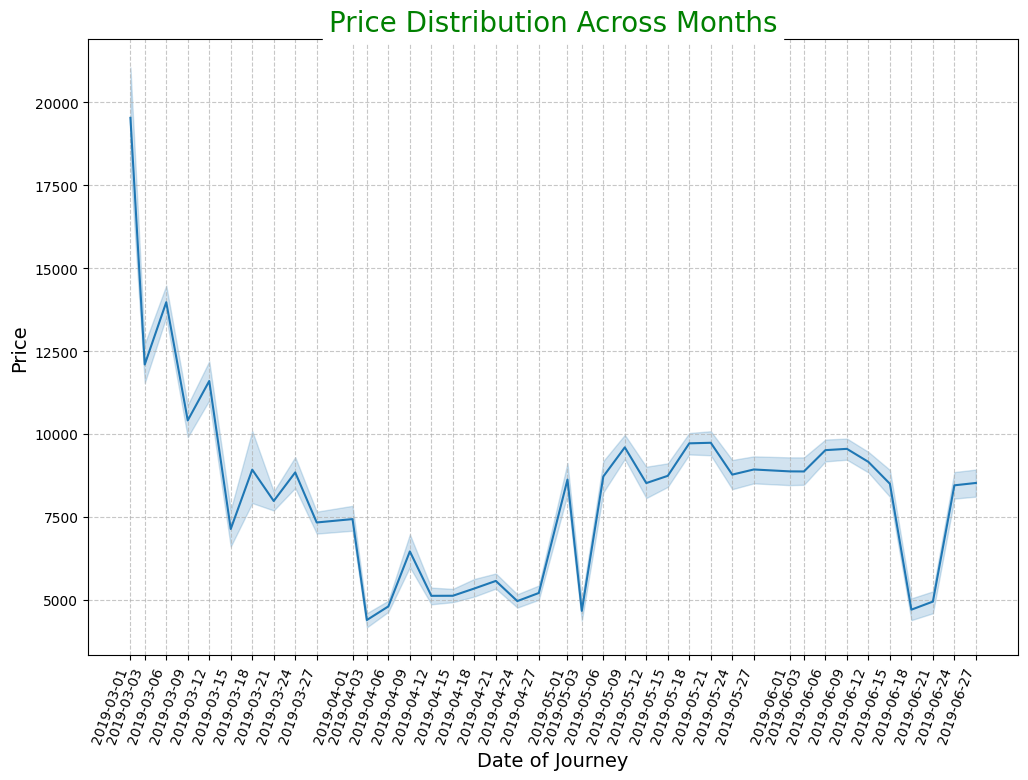

In [27]:
# filtering out null values from Price column
df_no_null = df[df['Price'].notna()]


plt.figure(figsize=(12, 8))

sns.lineplot(data=df_no_null.sort_values(by='Date_of_Journey'), x='Date_of_Journey', y='Price')

# Title of Graph
plt.title("Price Distribution Across Months", fontsize=20, backgroundcolor='white', color='green')
plt.xlabel('Date of Journey', fontsize=14)
plt.ylabel('Price', fontsize=14)

# adding grid to graph
plt.grid(axis='both', linestyle='--', alpha=0.7)

x_axis_ticks = df_no_null['Date_of_Journey'].sort_values().value_counts(sort=False).index
plt.xticks(ticks=x_axis_ticks, rotation=70, ha='right')

plt.show()

Conclusion: Price of flight drops 62.5% from 20000 to 12500 in between 1-3 March, from 5 May to 15 June flight price were roughly same. In between 3 April to 27 April and 18 June to 21 June Price were lower.

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


### Highest Journey Month

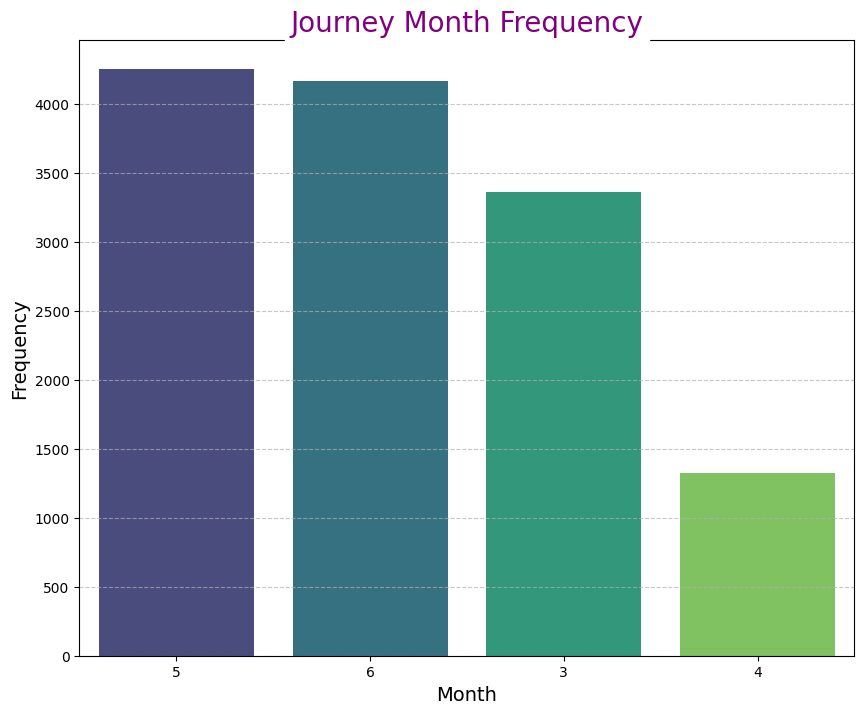

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Journey_Month', order=df['Journey_Month'].value_counts().index, palette='viridis')

# Title of Graph
plt.title('Journey Month Frequency', fontsize=20, backgroundcolor='white', color='purple')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Month', fontsize=14)

# adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most number of flight are in May, June. In this period most of education institution have vacation peroid, Usually families to vacation in this peroid, Also from previous graph in this period the price of flight remains nearly equal.

### Distribution of Hours

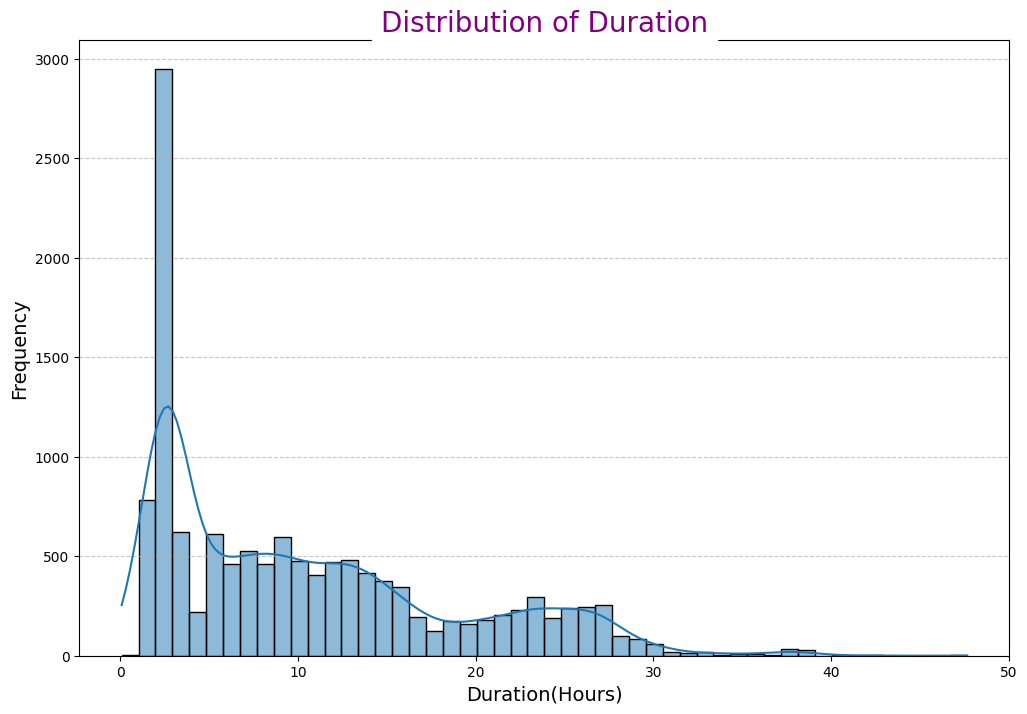

In [30]:
duration = df['Duration_Hours'] + (df['Duration_Mins']/60)
plt.figure(figsize=(12, 8))
sns.histplot(data=duration, palette='viridis', bins=50, kde=True)

# Title of Distribution
plt.title('Distribution of Duration', backgroundcolor='white', color='purple', fontsize=20)
plt.xlabel('Duration(Hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Conclusion: Most of the flights duration is in-between 1 to 3 hours.

Droping columns

In [31]:
# droping columns Arrival_Time, Date_of_Journey, Duration, Dep_Time
df.drop(columns=[
    "Arrival_Time", 
    "Date_of_Journey", 
    "Duration", 
    "Dep_Time"
    ], 
    inplace = True
)

In [32]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


In [33]:
df.Price.quantile([0, .25, .5, .75, .99, 1])

0.00     1759.0
0.25     5224.0
0.50     8266.0
0.75    12343.5
0.99    22270.0
1.00    79512.0
Name: Price, dtype: float64

In [34]:
# Creaing Price bins values into discreate interval
Price_Range = pd.cut(
    x=train['Price'], 
    bins=[0, 5000, 10000, 15000, 20000, np.inf], 
    labels=['0-5k', '0-10k', '10-15k', '15-20k', '20k+']
    )
Price_Range

0          0-5k
1         0-10k
2        10-15k
3         0-10k
4        10-15k
          ...  
10678      0-5k
10679      0-5k
10680     0-10k
10681    10-15k
10682    10-15k
Name: Price, Length: 10463, dtype: category
Categories (5, object): ['0-5k' < '0-10k' < '10-15k' < '15-20k' < '20k+']

### Price Distribution Graph

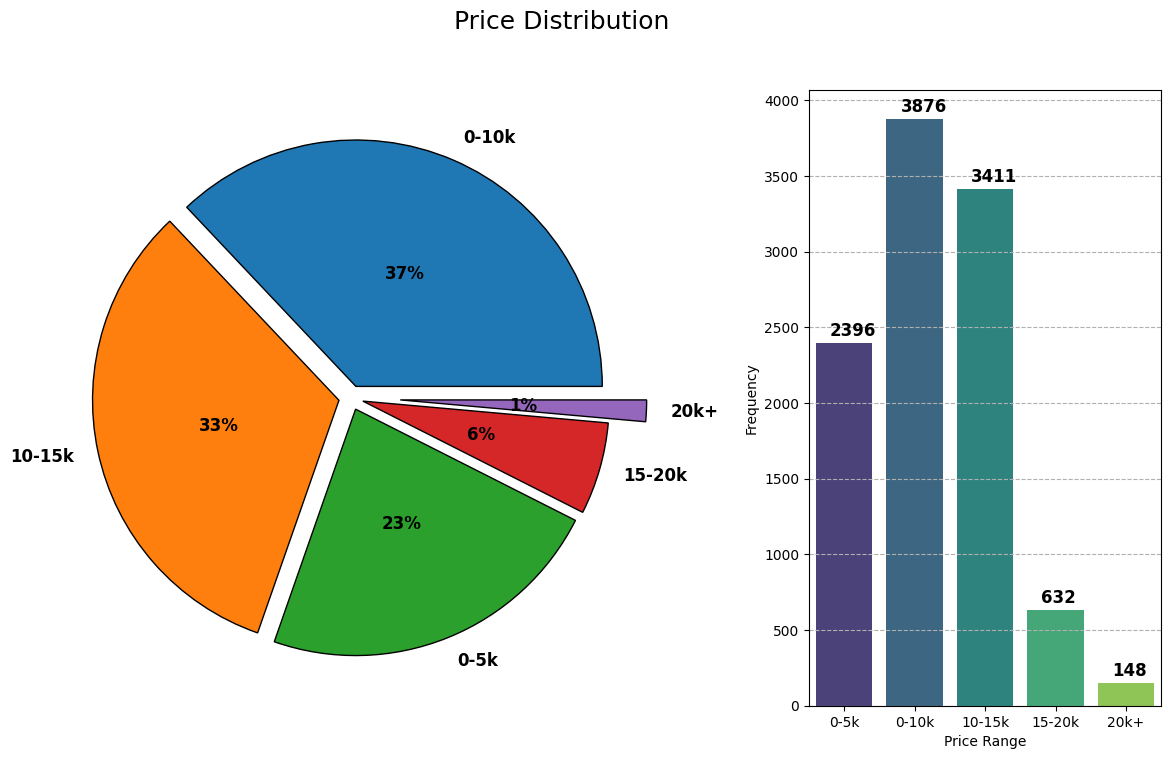

In [35]:
Range_count = Price_Range.value_counts()

# creating figure and axes for 2 plots
fig, ax = plt.subplots(1, 2, figsize=(15, 8), width_ratios=[2, 1])
# adding title of graph as Price Distribution
fig.suptitle(t='Price Distribution', fontsize=18)

# text property used to labels and texts on graphs
text_property = {
    'fontsize': 12, 
    'weight': 'bold',
    "color": "black"
    }
# creating pie plot
ax[0].pie(
    x=Range_count.values,
    labels=Range_count.index,
    autopct='%1.f%%',
    explode=([0.05]*(Range_count.index.size - 1)) + [0.2],
    pctdistance=0.5,
    wedgeprops={'linewidth':1, 'edgecolor':'black'},
    textprops=text_property
    )
# Creating bar plot
sns.countplot(ax=ax[1], x=Price_Range, palette='viridis')

# Writing height of bar above the bar in second graph
for i, count in enumerate(Range_count.sort_index()):
    ax[1].text(x=(i-0.2), y=count+50, s=str(count), fontdict=text_property)

# X axis label of second graph
ax[1].set_xlabel('Price Range')
# Y axis label of second graph
ax[1].set_ylabel('Frequency')
# Adding grid lines to second graph
ax[1].grid(axis='y', linestyle='--')

plt.show()

Conclusion: 93% of the Flights Price are less than ₹15000, only 1% of the flights price are higher than ₹20000. 

### Price Distribution by Airlines

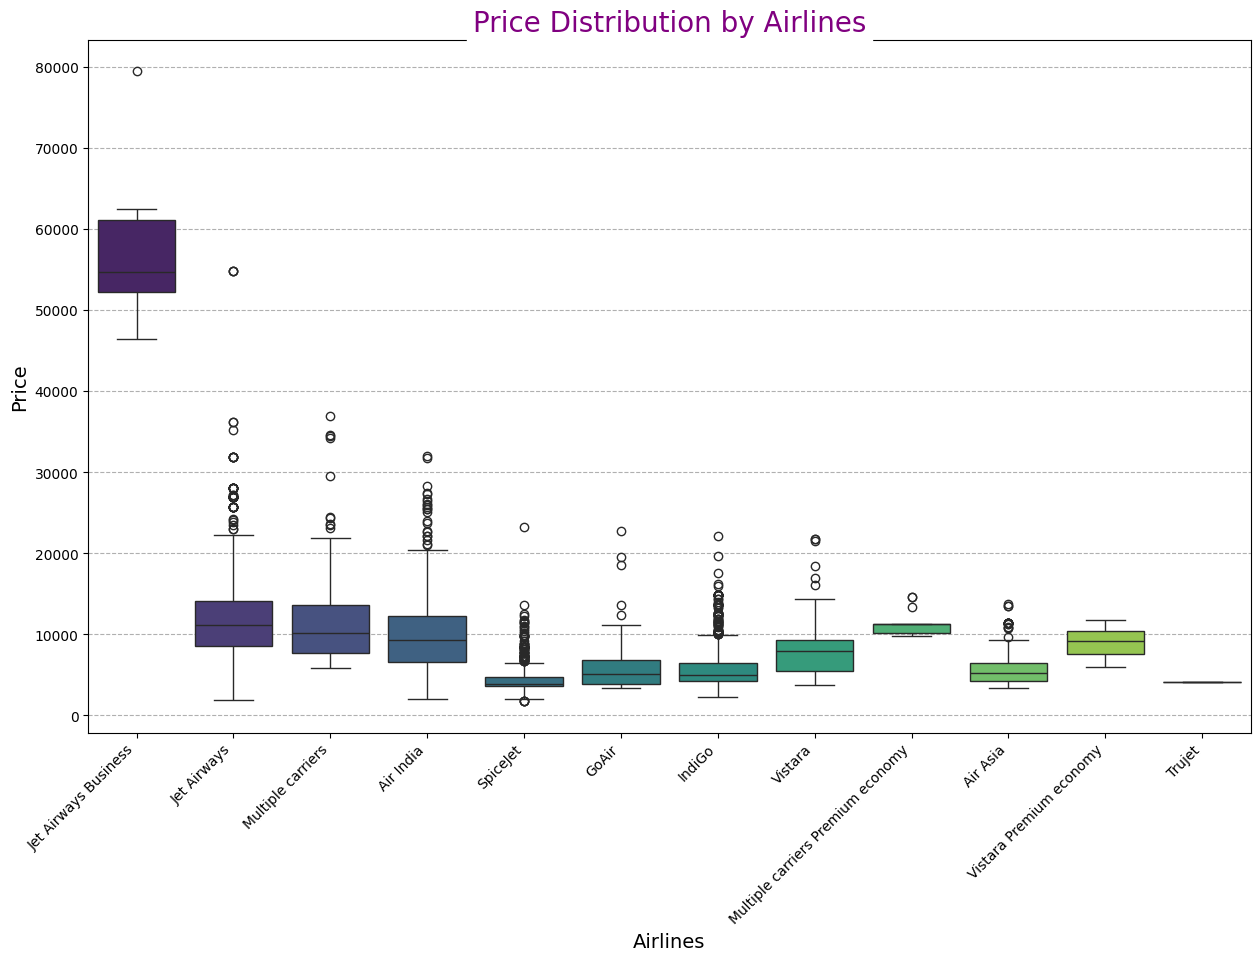

In [36]:
# setting figure size
plt.figure(figsize=(15, 9))
# boxplot
sns.boxplot(data=df.sort_values(by='Price', ascending=False), x='Airline', y='Price', palette='viridis')
# setting title of graph
plt.title('Price Distribution by Airlines', fontsize=20, color='purple', backgroundcolor='white')
# X axis label for graph
plt.xlabel('Airlines', fontsize=14)
# Y axis label for graph
plt.ylabel('Price', fontsize=14)
# Rotating the x-axis label at 45 degree and aligning label to right
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

Conclusion:
* Jet Airways Business Ticket Price are very high from the rest of Airlines.
* SpiceJet, Indigo, Air Asia are more on afforable side.

Selecting categorical and numerical columns

In [37]:
def get_cat_num_cols(data: pd.DataFrame) -> tuple[pd.Index, pd.Index]:
    # Numerical columns and categorical columns
    numerical = data.select_dtypes(exclude='O')
    categorical = data.select_dtypes(include='O')

    categorical_columns = categorical.columns
    # selecting numerical columns which has less than 10 unique values
    numerical_but_categorical = [col for col in numerical.columns if numerical[col].nunique() < 10]
    # selecting categorical columns which hass more than 20 unique values
    categorical_but_cardinal = [col for col in categorical.columns if categorical[col].nunique() > 20]

    categorical_columns = categorical_columns.union(numerical_but_categorical, sort=False).difference(categorical_but_cardinal, sort=False)
    numerical_columns = numerical.columns.difference(numerical_but_categorical)

    return categorical_columns, numerical_columns

In [38]:
categorical_columns, numerical_columns = get_cat_num_cols(df)

In [39]:
categorical_columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Journey_Month'],
      dtype='object')

'______________________________Airline Value Count_______________________________'

,Frequency,Airline Ratio
Airline,,
Jet Airways,4586,34.99
IndiGo,2552,19.47
Air India,2127,16.23
Multiple carriers,1539,11.74
SpiceJet,1023,7.80
Vistara,607,4.63
Air Asia,405,3.09
GoAir,239,1.82
Multiple carriers Premium economy,16,0.12


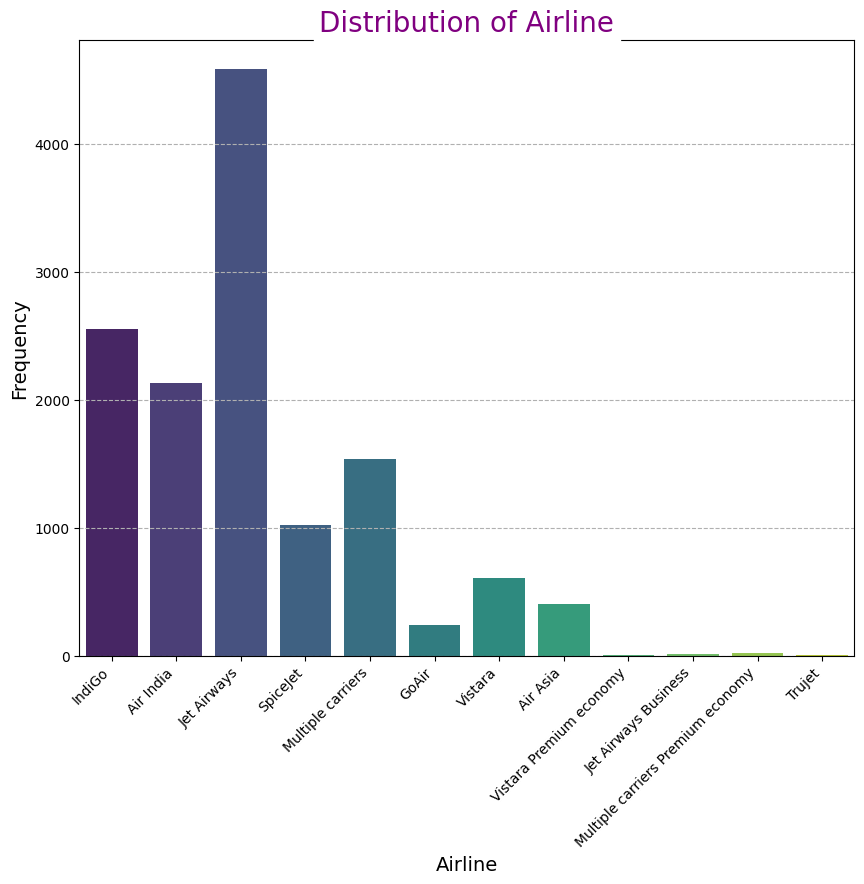

'_______________________________Source Value Count_______________________________'

,Frequency,Source Ratio
Source,,
Delhi,5473,41.75
Kolkata,3567,27.21
Banglore,2729,20.82
Mumbai,883,6.74
Chennai,456,3.48


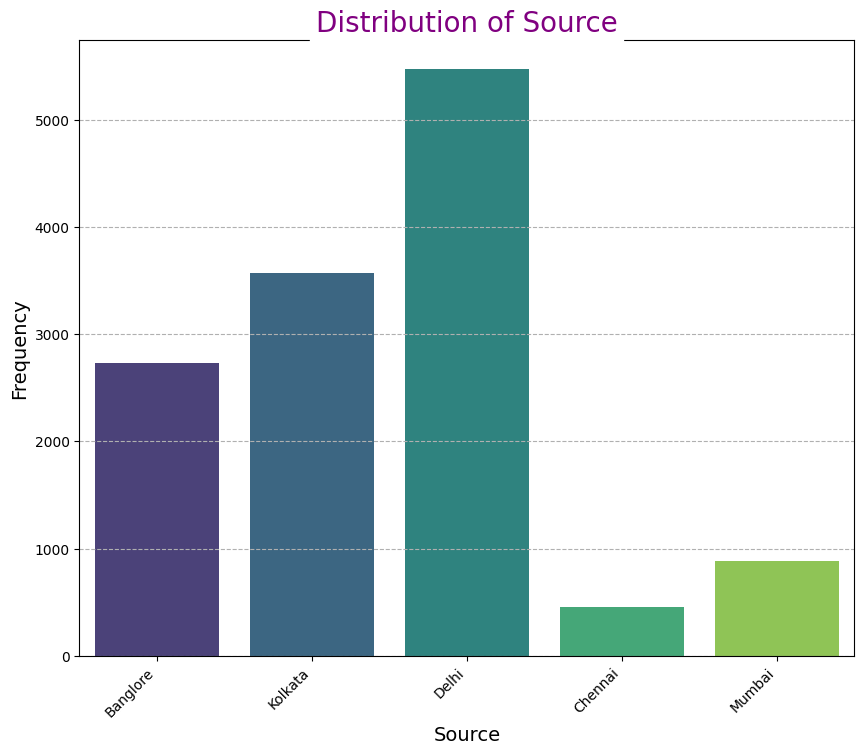

'____________________________Destination Value Count_____________________________'

,Frequency,Destination Ratio
Destination,,
Cochin,5473,41.75
Banglore,3567,27.21
Delhi,1582,12.07
New Delhi,1147,8.75
Hyderabad,883,6.74
Kolkata,456,3.48


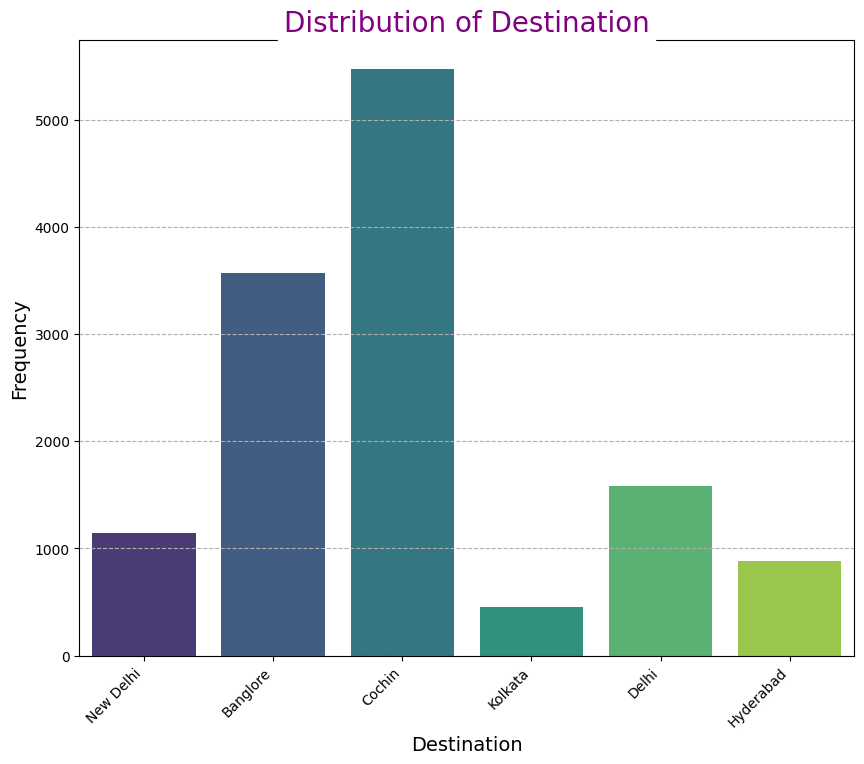

'____________________________Total_Stops Value Count_____________________________'

,Frequency,Total_Stops Ratio
Total_Stops,,
1 stop,7053,53.81
non-stop,4321,32.96
2 stops,1678,12.80
3 stops,54,0.41
4 stops,2,0.02


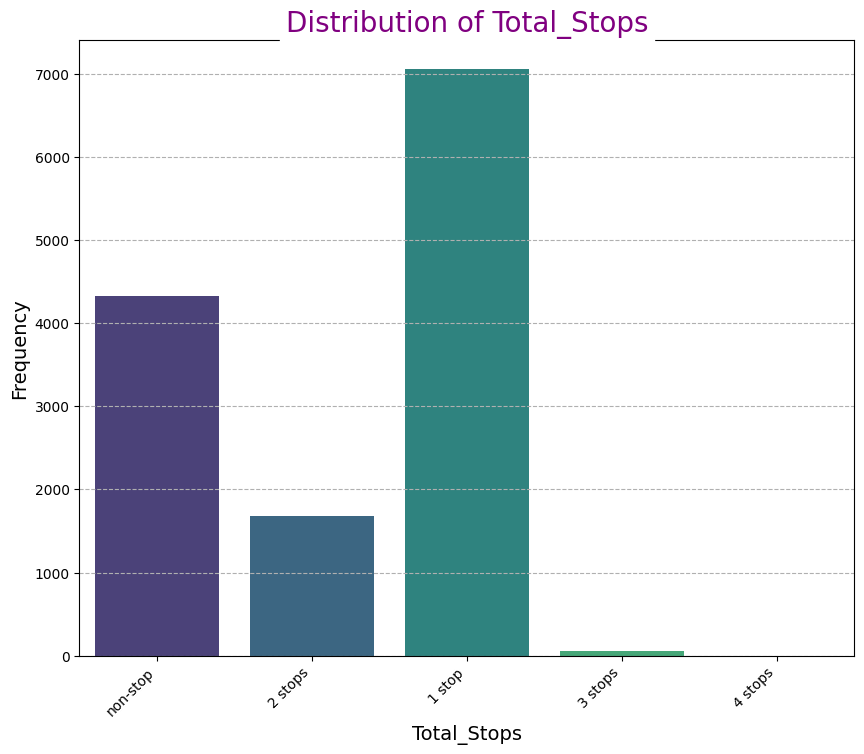

'__________________________Additional_Info Value Count___________________________'

,Frequency,Additional_Info Ratio
Additional_Info,,
No info,10309,78.65
In-flight meal not included,2366,18.05
No check-in baggage included,394,3.01
1 Long layover,20,0.15
Change airports,8,0.06
Business class,5,0.04
No Info,3,0.02
1 Short layover,1,0.01
Red-eye flight,1,0.01


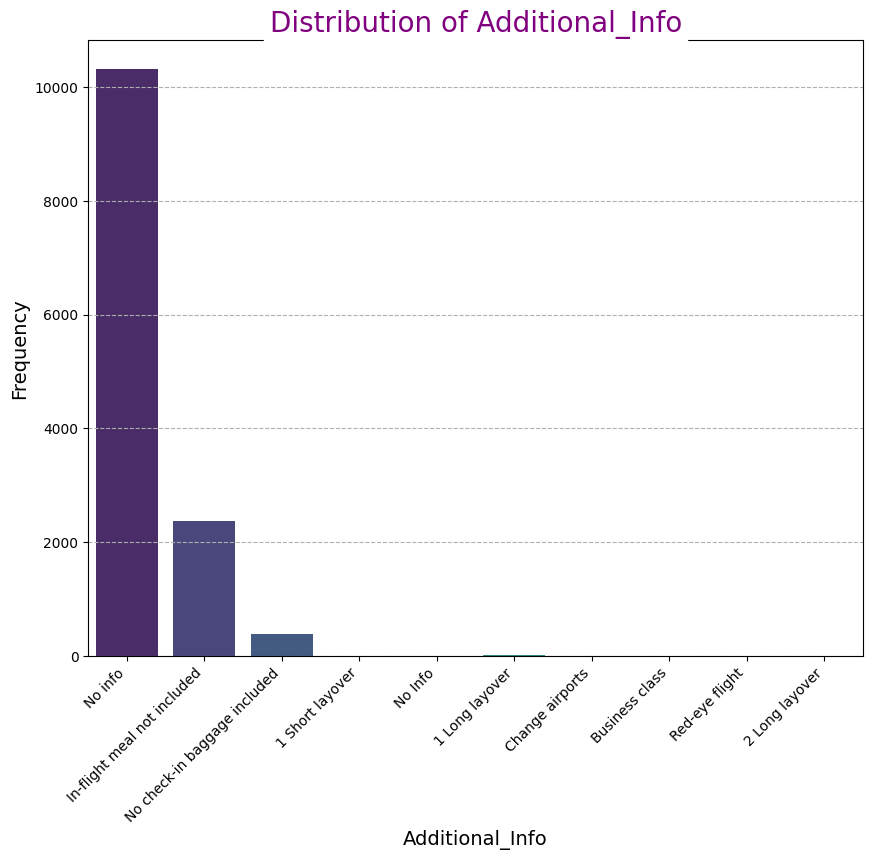

'___________________________Journey_Month Value Count____________________________'

,Frequency,Journey_Month Ratio
Journey_Month,,
5,4253,32.45
6,4170,31.81
3,3360,25.63
4,1325,10.11


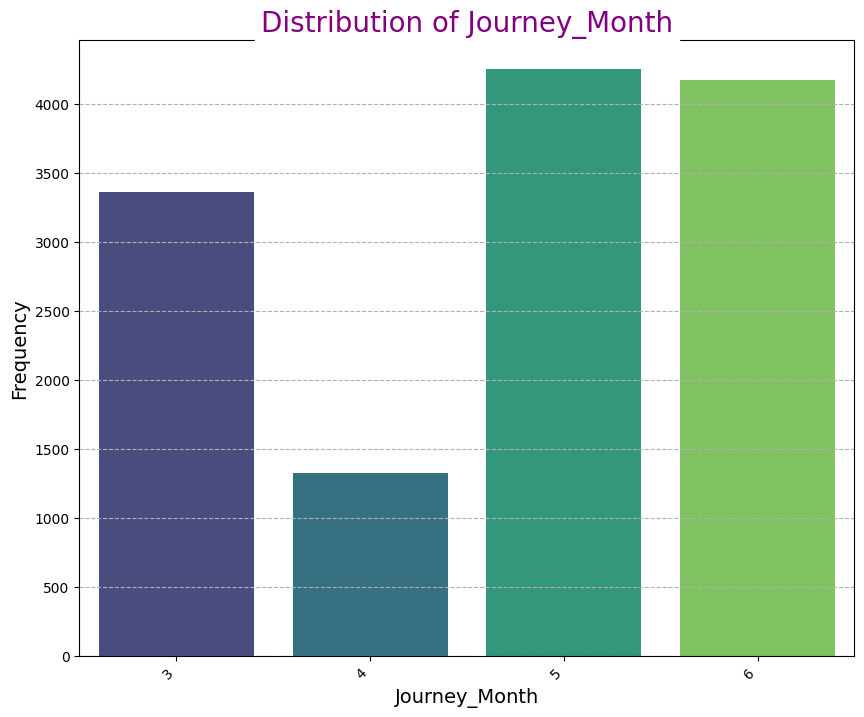

In [40]:
for column in categorical_columns:
    
    # setting the figure size 10x8
    plt.figure(figsize=(10, 8))
    # Counting the frequency of all category inside column
    ColumnCount = df[column].value_counts()
    # diviing the frequency to the number of rows in dataframe
    ColumnRatio = (ColumnCount / df.index.size) * 100
    # storing frequency and ration inside temporary dataframe
    table = pd.DataFrame(
        data={
                'Frequency' : ColumnCount.values,
                f'{column} Ratio' : ColumnRatio.round(2)
            },
        index=ColumnCount.index
        )
    # Writing name of dataframe
    IPython.display.display(f'{column} Value Count'.center(80, '_'))
    # printing dataframe
    IPython.display.display(table)
    # Countplot of each column
    sns.countplot(data=df, x=column, palette='viridis')
    # setting the title of graph
    plt.title(f'Distribution of {column}', fontsize=20, color='purple', backgroundcolor='white')
    # setting x-axis label of graph
    plt.xlabel(column, fontsize=14)
    # setting the y axis label of graph
    plt.ylabel('Frequency', fontsize=14)
    # Rotating the x-axis label at 45 degree and aligning label to right
    plt.xticks(rotation=45, ha='right')
    # Adding grid lines to all graph
    plt.grid(axis='y', linestyle='--')

    plt.show()

**Conclusion:**
* Most number of flights are from Jet Airways 35% followed by IndiGo 19% and Air India 16%.
* Most of the flights start from Delhi 41% followed by Kolkata 27% and Most flight reaches Cochin 41%.
* More than half of flights only have 1 stop.

In [41]:
from typing import List

In [42]:
from typing import List

def mean_analyser(data: pd.DataFrame, categorical_columns: List|pd.Index, target_column: str) -> None:
    '''
    Shows frequency count, frequency ratio, and mean price of each categorical column.
    # Pararmeters
    `data` : Pandas DataFrame Object
    `categorical_columns` : List of categorical columns in data.
    `target_column` : Name of target column
    '''
    for column in categorical_columns:
        count = data[column].value_counts()
        IPython.display.display(f'{column}: {count.index.size}'.center(80, '_'))

        IPython.display.display(pd.DataFrame({
            'Count': count,
            'Ratio' : ((count / data.index.size) * 100).round(2),
            f'Mean {target_column}' : data.groupby(column)['Price'].mean()
        }))

In [43]:
# Not including Route columns, because there are too many routes
mean_analyser(df, categorical_columns, 'Price')

'__________________________________Airline: 12___________________________________'

,Count,Ratio,Mean Price
Airline,,,
Air Asia,405,3.09,5590.260188
Air India,2127,16.23,9555.382891
GoAir,239,1.82,5861.056701
IndiGo,2552,19.47,5668.469897
Jet Airways,4586,34.99,11599.021081
Jet Airways Business,8,0.06,58358.666667
Multiple carriers,1539,11.74,10902.678094
Multiple carriers Premium economy,16,0.12,11418.846154
SpiceJet,1023,7.80,4335.841718


'___________________________________Source: 5____________________________________'

,Count,Ratio,Mean Price
Source,,,
Banglore,2729,20.82,8022.872877
Chennai,456,3.48,4789.892388
Delhi,5473,41.75,10460.914634
Kolkata,3567,27.21,9143.083566
Mumbai,883,6.74,5059.708752


'_________________________________Destination: 6_________________________________'

,Count,Ratio,Mean Price
Destination,,,
Banglore,3567,27.21,9143.083566
Cochin,5473,41.75,10460.914634
Delhi,1582,12.07,5143.918577
Hyderabad,883,6.74,5059.708752
Kolkata,456,3.48,4789.892388
New Delhi,1147,8.75,12007.421225


'_________________________________Total_Stops: 5_________________________________'

,Count,Ratio,Mean Price
Total_Stops,,,
1 stop,7053,53.81,10593.570032
2 stops,1678,12.80,12761.099393
3 stops,54,0.41,13260.674419
4 stops,2,0.02,17686.000000
non-stop,4321,32.96,5018.506763


'______________________________Additional_Info: 10_______________________________'

,Count,Ratio,Mean Price
Additional_Info,,,
1 Long layover,20,0.15,22109.631579
1 Short layover,1,0.01,26743.000000
2 Long layover,1,0.01,26480.000000
Business class,5,0.04,56811.250000
Change airports,8,0.06,16800.714286
In-flight meal not included,2366,18.05,9435.647456
No Info,3,0.02,8044.666667
No check-in baggage included,394,3.01,3642.465409
No info,10309,78.65,9075.062447


'________________________________Journey_Month: 4________________________________'

,Count,Ratio,Mean Price
Journey_Month,,,
3,3360,25.63,10695.397311
4,1325,10.11,5766.545455
5,4253,32.45,9028.783569
6,4170,31.81,8736.152522


Conclusion:
1. Most of Additional Info is No_Info (nearly 80%).
2. The Average Price of Flight in Jet Airways Business is nearly 58000.
3. Flights of Jet Airways Business, Trujet, Vistara Premium Economy and Multiple Carrier Premium Economy are very less as compared to other Airlines.

In [44]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


Mean Flight Price based on No. of Stops and City of Source and Destination.

In [45]:
mean_price_by_stops_source = pd.crosstab(
    index=df['Total_Stops'], 
    columns=[df['Source'], df['Destination']], 
    values=df['Price'], 
    aggfunc='mean'
)
mean_price_by_stops_source

Source          Banglore                    Chennai         Delhi  \
Destination        Delhi     New Delhi      Kolkata        Cochin   
Total_Stops                                                         
1 stop               NaN  14016.540925          NaN  10030.021971   
2 stops              NaN  13278.041096          NaN  12833.929654   
3 stops              NaN  12761.000000          NaN  13202.826087   
4 stops              NaN  17686.000000          NaN           NaN   
non-stop     5143.918577   7458.217712  4789.892388   6315.816901   

Source            Kolkata        Mumbai  
Destination      Banglore     Hyderabad  
Total_Stops                              
1 stop       10477.414395  12520.477273  
2 stops      11994.477663  16696.266667  
3 stops      13151.272727  16276.500000  
4 stops               NaN           NaN  
non-stop      4556.055249   3932.809984

Conclusion: The non-stop flights price are very low as compared with 1 stop, 2 stop...

In [46]:
mean_price_by_stops_source.columns.get_level_values(0)

Index(['Banglore', 'Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype='object', name='Source')

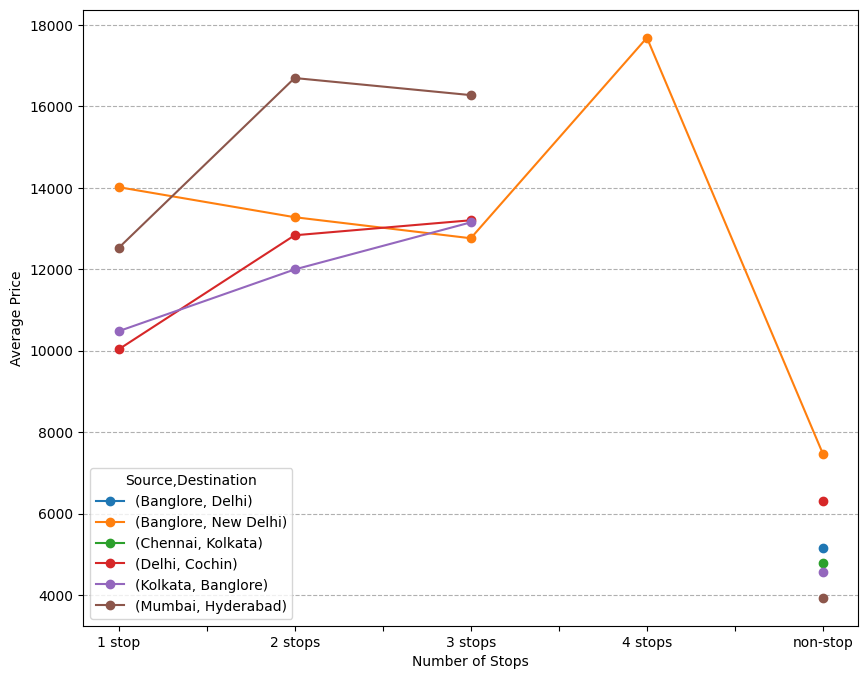

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
mean_price_by_stops_source.plot(kind='line', ax=ax, legend=True, marker='o')
ax.grid(axis='y', linestyle='--')
ax.set_xlabel('Number of Stops')
ax.set_ylabel('Average Price')
plt.show()

Conclusion: As the number of increase the Price of flights also increases.

In [48]:
mean_price_by_stops_source.columns.map(lambda col: f'{col[0]}-{col[1]}')

Index(['Banglore-Delhi', 'Banglore-New Delhi', 'Chennai-Kolkata',
       'Delhi-Cochin', 'Kolkata-Banglore', 'Mumbai-Hyderabad'],
      dtype='object')

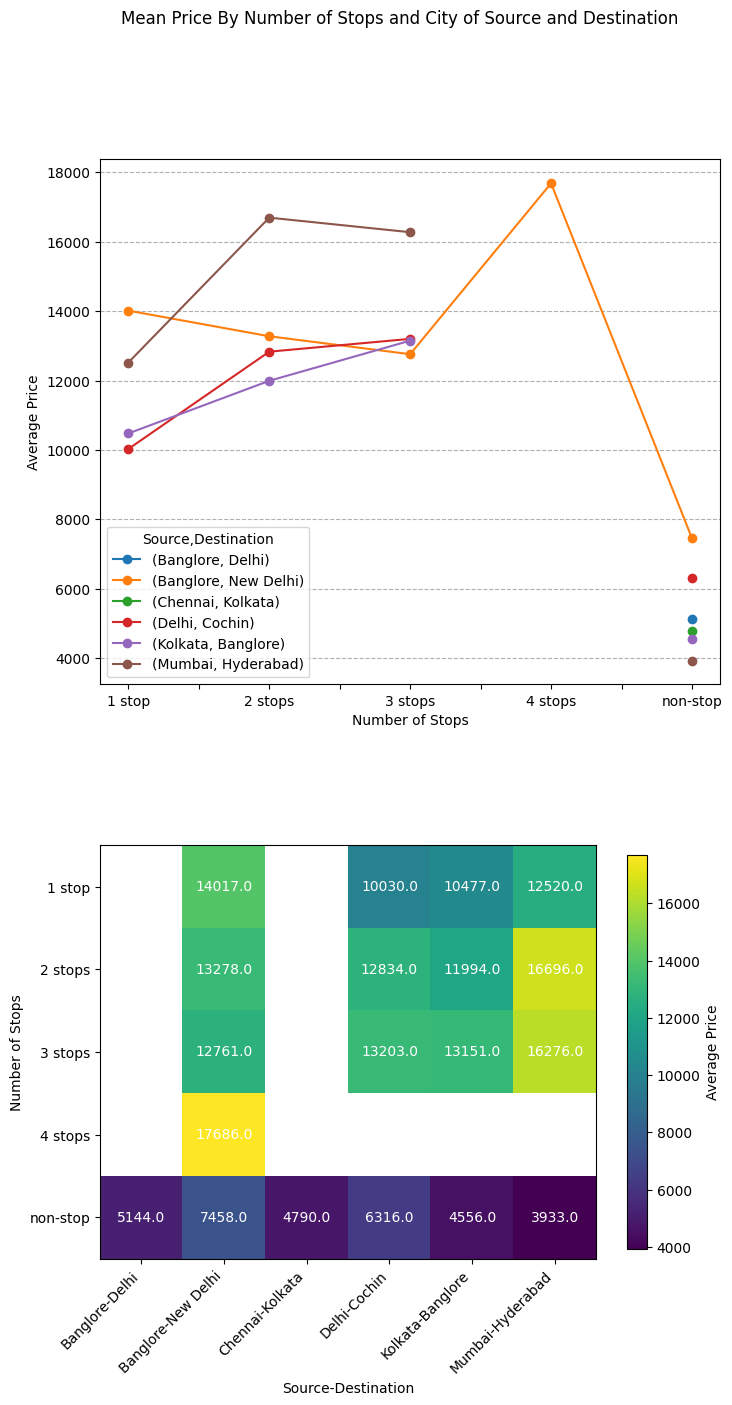

In [49]:
stops = mean_price_by_stops_source.index
source_destination = mean_price_by_stops_source.columns.map(lambda col: f'{col[0]}-{col[1]}')

prices = mean_price_by_stops_source.values


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 15))
fig.suptitle('Mean Price By Number of Stops and City of Source and Destination')

mean_price_by_stops_source.plot(kind='line', ax=ax1, legend=True, marker='o')

im = ax2.imshow(prices)
fig.colorbar(im, ax=ax2, label='Average Price', shrink=0.75)

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(source_destination.size), labels=source_destination, rotation=45, ha='right')
ax2.set_yticks(np.arange(stops.size), labels=stops)


# Loop over data dimensions and create text annotations.
for i in range(source_destination.size):
    for j in range(stops.size):
        if not np.isnan(prices[j, i]):
            text = ax2.text(i, j, prices[j, i].round(),
                       ha="center", va="center", color="w")
        


ax2.set_ylabel('Number of Stops')
ax2.set_xlabel('Source-Destination')
ax1.set_xlabel('Number of Stops')
ax1.set_ylabel('Average Price')
ax1.grid(axis='y', linestyle='--')

plt.show()

Conclusion:
1. Non Stops Flight are have less prices.
2. As number of stops increases flight prices also increases.

In [50]:
df['Airline'].value_counts()

Airline
Jet Airways                          4586
IndiGo                               2552
Air India                            2127
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               607
Air Asia                              405
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

As Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy and Trujet flights are very low so moving these all airlines into 'Others' category.

In [51]:

# All these airlines the list are converted to Others
Others = np.array([
    'Multiple carriers Premium economy',
    'Jet Airways Business',
    'Trujet',
    'Vistara Premium economy'
    ])
# This lambda function returns "Others" if argument is present inside list else it returns argument
Airline_Filter = lambda x: 'Others' if x in Others else x

New_Airline = df['Airline'].apply(Airline_Filter)
New_Airline.value_counts()

Airline
Jet Airways          4586
IndiGo               2552
Air India            2127
Multiple carriers    1539
SpiceJet             1023
Vistara               607
Air Asia              405
GoAir                 239
Others                 30
Name: count, dtype: int64

In [52]:
# Airlines is categorical columns so performing OneHotEncoding
Airlines = pd.get_dummies(New_Airline, dtype=np.int8, drop_first=True, prefix='Airline')

Airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [53]:
# Source is categorical performing OneHotEncoding
Source = df['Source']
Source = pd.get_dummies(Source, drop_first=True, dtype=np.int8, prefix='Source')

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [54]:
Destination = df['Destination']
Destination = pd.get_dummies(Destination, drop_first=True, dtype=np.int8, prefix='Destination')

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [55]:
# Dropping Additional_Info Columns as mostly(80%) contains No_info.
# Total_Stops is giving same information
df.drop(columns=['Additional_Info'], inplace=True)

In [56]:
# Replacing the strings in Total_stops ex.['non-stop', '1 stop'] with number [0, 1]
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4,
})

In [57]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,4,45,1,3,16,50,21,35


Plotting Route

In [58]:
df.groupby(['Source', 'Destination', 'Route'])['Price'].mean()

Source    Destination  Route                
Banglore  Delhi        BLR → DEL                 5143.918577
          New Delhi    BLR → AMD → DEL          11134.166667
                       BLR → BBI → DEL          11486.000000
                       BLR → BDQ → DEL          11550.500000
                       BLR → BOM → AMD → DEL    14155.750000
                                                    ...     
Mumbai    Hyderabad    BOM → NDC → HYD           4140.000000
                       BOM → RPR → VTZ → HYD     9736.000000
                       BOM → UDR → DEL → HYD    22950.000000
                       BOM → VGA → TIR → HYD             NaN
                       BOM → VNS → DEL → HYD    23528.000000
Name: Price, Length: 134, dtype: float64

In [59]:
Price_by_Route_Source_Dest = pd.crosstab(
    index=df['Route'], 
    columns=[df['Source'], 
    df['Destination']], 
    values=df['Price'], 
    aggfunc='mean'
    )
Price_by_Route_Source_Dest.head()

Source                Banglore               Chennai  Delhi  Kolkata    Mumbai
Destination              Delhi     New Delhi Kolkata Cochin Banglore Hyderabad
Route                                                                         
BLR → AMD → DEL            NaN  11134.166667     NaN    NaN      NaN       NaN
BLR → BBI → DEL            NaN  11486.000000     NaN    NaN      NaN       NaN
BLR → BDQ → DEL            NaN  11550.500000     NaN    NaN      NaN       NaN
BLR → BOM → AMD → DEL      NaN  14155.750000     NaN    NaN      NaN       NaN
BLR → BOM → BHO → DEL      NaN  17211.545455     NaN    NaN      NaN       NaN

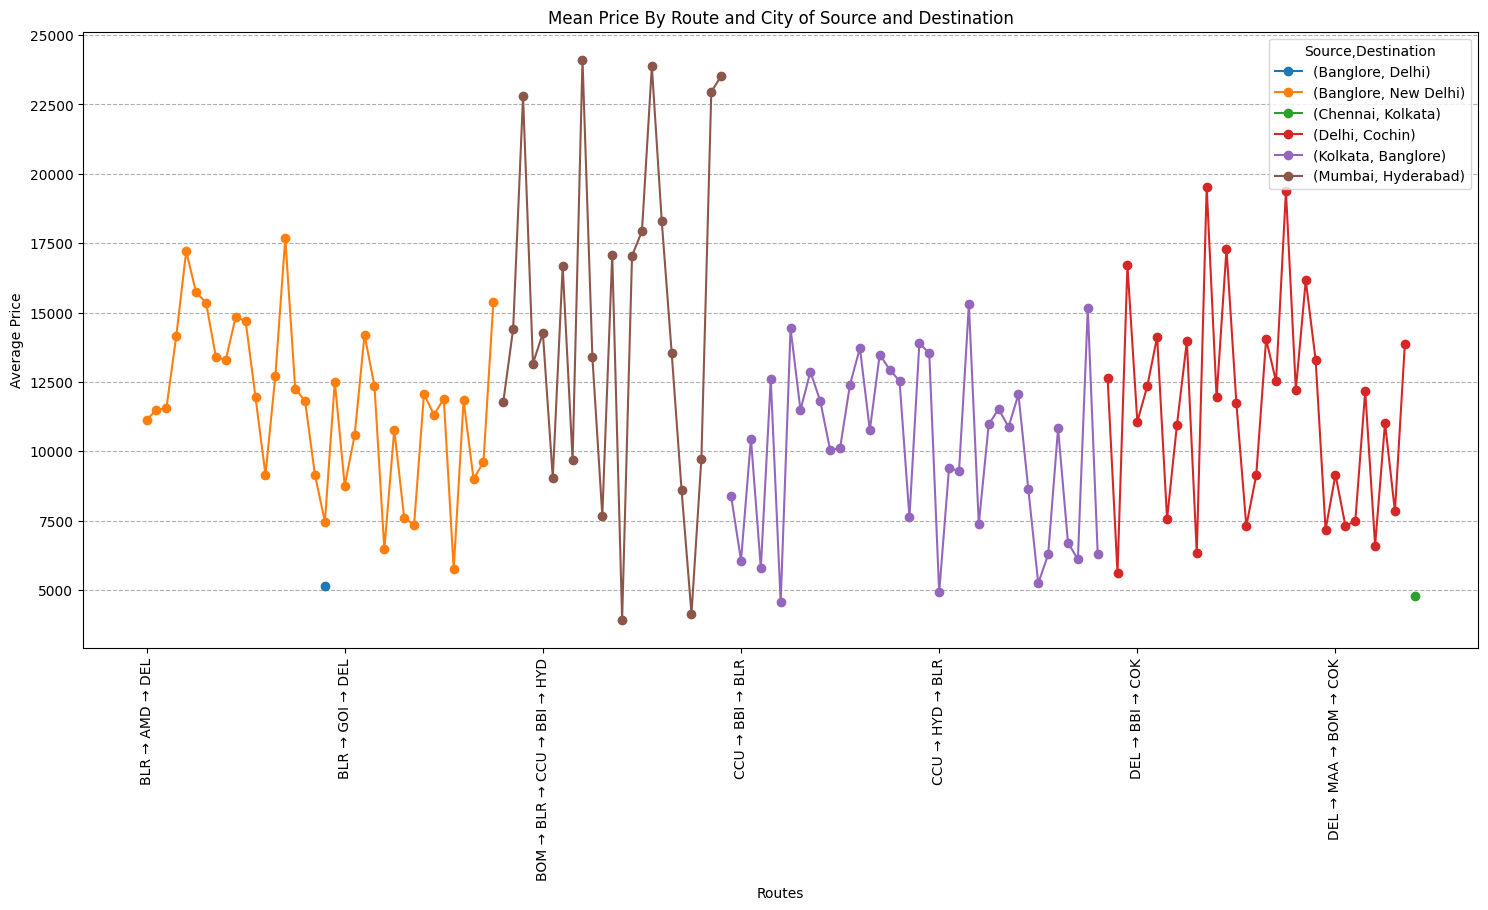

In [60]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('Mean Price By Route and City of Source and Destination')

plots = Price_by_Route_Source_Dest.plot(kind='line', ax=ax, legend=True, marker='o')
plt.xticks(rotation=90)
        

ax.set_xlabel('Routes')
ax.set_ylabel('Average Price')
ax.grid(axis='y', linestyle='--')

plt.show()

Conclusion:
1. Having same Source and Destination here price is very fluctuating depend on which route is taken.

In [61]:
Route = df['Route'].str.split(' → ', expand=True)
Route.columns = 'Route_' + Route.columns.astype(str)

In [62]:
Route.fillna(value='None', inplace=True)
Route.head()

,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR,DEL,None,None,None,None
1,CCU,IXR,BBI,BLR,None,None
2,DEL,LKO,BOM,COK,None,None
3,CCU,NAG,BLR,None,None,None
4,BLR,NAG,DEL,None,None,None


In [63]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

for column in Route.columns:
    Route[column] = lbl.fit_transform(Route[column])
Route

,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,10,22,10,4,1
1,2,20,1,3,4,1
2,3,27,4,5,4,1
3,2,29,3,10,4,1
4,0,29,8,10,4,1
...,...,...,...,...,...,...
13103,2,10,3,10,4,1
13104,2,5,22,10,4,1
13105,3,6,6,10,4,1
13106,3,6,6,10,4,1


In [64]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,4,45,1,3,16,50,21,35


In [65]:
# Adding Airlines, Source, Destination and Route to train 

df_train = pd.concat([df, Airlines, Source, Destination, Route], axis=1)
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,22,10,4,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,20,1,3,4,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,27,4,5,4,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,29,3,10,4,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,29,8,10,4,1


In [66]:
# Droping Airline, Source, Destination, Route from train
df_train.drop(columns=['Airline', 'Source', 'Destination', 'Route'], inplace=True)

In [67]:
df_train.head()

,Total_Stops,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897.0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,22,10,4,1
1,2,7662.0,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,20,1,3,4,1
2,2,13882.0,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,27,4,5,4,1
3,1,6218.0,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,29,3,10,4,1
4,1,13302.0,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,29,8,10,4,1


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13108 entries, 0 to 13107
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                13108 non-null  int64  
 1   Price                      10463 non-null  float64
 2   Duration_Hours             13108 non-null  int64  
 3   Duration_Mins              13108 non-null  int64  
 4   Journey_Day                13108 non-null  int32  
 5   Journey_Month              13108 non-null  int32  
 6   Dep_Hour                   13108 non-null  int64  
 7   Dep_Min                    13108 non-null  int64  
 8   Arrival_Hour               13108 non-null  int32  
 9   Arrival_Minute             13108 non-null  int32  
 10  Airline_Air India          13108 non-null  int8   
 11  Airline_GoAir              13108 non-null  int8   
 12  Airline_IndiGo             13108 non-null  int8   
 13  Airline_Jet Airways        13108 non-null  int

### Feature Selection
Finding best features which fits best with target variable
* Checking Feature importance
* Checking multicollinearity

In [69]:
# Splitting Train and Test data

In [70]:
# test data
df_test = df_train[df_train['Price'].isna()]

# train data
df_train = df_train.dropna(subset=['Price'])

# droping Price column from test as it is null
df_test = df_test.drop(columns=['Price'])

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
# scaler = StandardScaler()
# df_train_scaled = scaler.fit_transform(df_train)

In [73]:
df_train_features = df_train.drop(columns=['Price'])
df_train_target = df_train['Price']

scaler = StandardScaler()

df_train_features_scaled = scaler.fit_transform(df_train_features)

In [74]:
df_train_features_scaled

array([[-1.21467398, -0.95813507,  1.29095446, ...,  0.37752647,
         0.06161757,  0.00977671],
       [ 1.81311252, -0.36134689, -0.19026678, ..., -3.45482502,
         0.06161757,  0.00977671],
       [ 1.81311252,  1.07094475, -1.67148802, ..., -2.35986745,
         0.06161757,  0.00977671],
       ...,
       [-1.21467398, -0.83877743, -1.67148802, ...,  0.37752647,
         0.06161757,  0.00977671],
       [-1.21467398, -0.95813507,  0.69846596, ...,  0.37752647,
         0.06161757,  0.00977671],
       [ 1.81311252, -0.24198925, -0.48651103, ..., -2.35986745,
         0.06161757,  0.00977671]])

In [75]:
df_train_scaled = pd.DataFrame(df_train_features_scaled, columns=df_train_features.columns)

In [76]:
df_train_scaled.head()

,Total_Stops,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,-1.214674,-0.958135,1.290954,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,-0.439678,-0.137447,2.030121,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,-0.613325,-0.267152,-0.842899,-0.37085,-0.267152,-0.194397,3.232257,-1.659037,0.066723,1.352136,0.377526,0.061618,0.009777
1,1.813113,-0.361347,-0.190267,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,2.274393,-0.137447,-0.492582,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,1.630457,-0.267152,-0.842899,-0.37085,-0.267152,-0.194397,-0.309381,-0.004191,1.639776,-1.228609,-3.454825,0.061618,0.009777
2,1.813113,1.070945,-1.671488,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,-0.439678,-0.137447,-0.492582,1.351976,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,1.186382,-0.613325,-0.267152,1.186382,-0.37085,-0.267152,-0.194397,-0.309381,0.823232,2.740913,-0.859931,-2.359867,0.061618,0.009777
3,0.299219,-0.600062,-0.190267,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,-0.439678,-0.137447,2.030121,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,1.630457,-0.267152,-0.842899,-0.37085,-0.267152,-0.194397,-0.309381,-0.004191,3.055524,-0.982824,0.377526,0.061618,0.009777
4,0.299219,-0.719420,0.994710,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,-0.439678,-0.137447,2.030121,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,-0.613325,-0.267152,-0.842899,-0.37085,-0.267152,-0.194397,3.232257,-1.659037,3.055524,-0.368361,0.377526,0.061618,0.009777


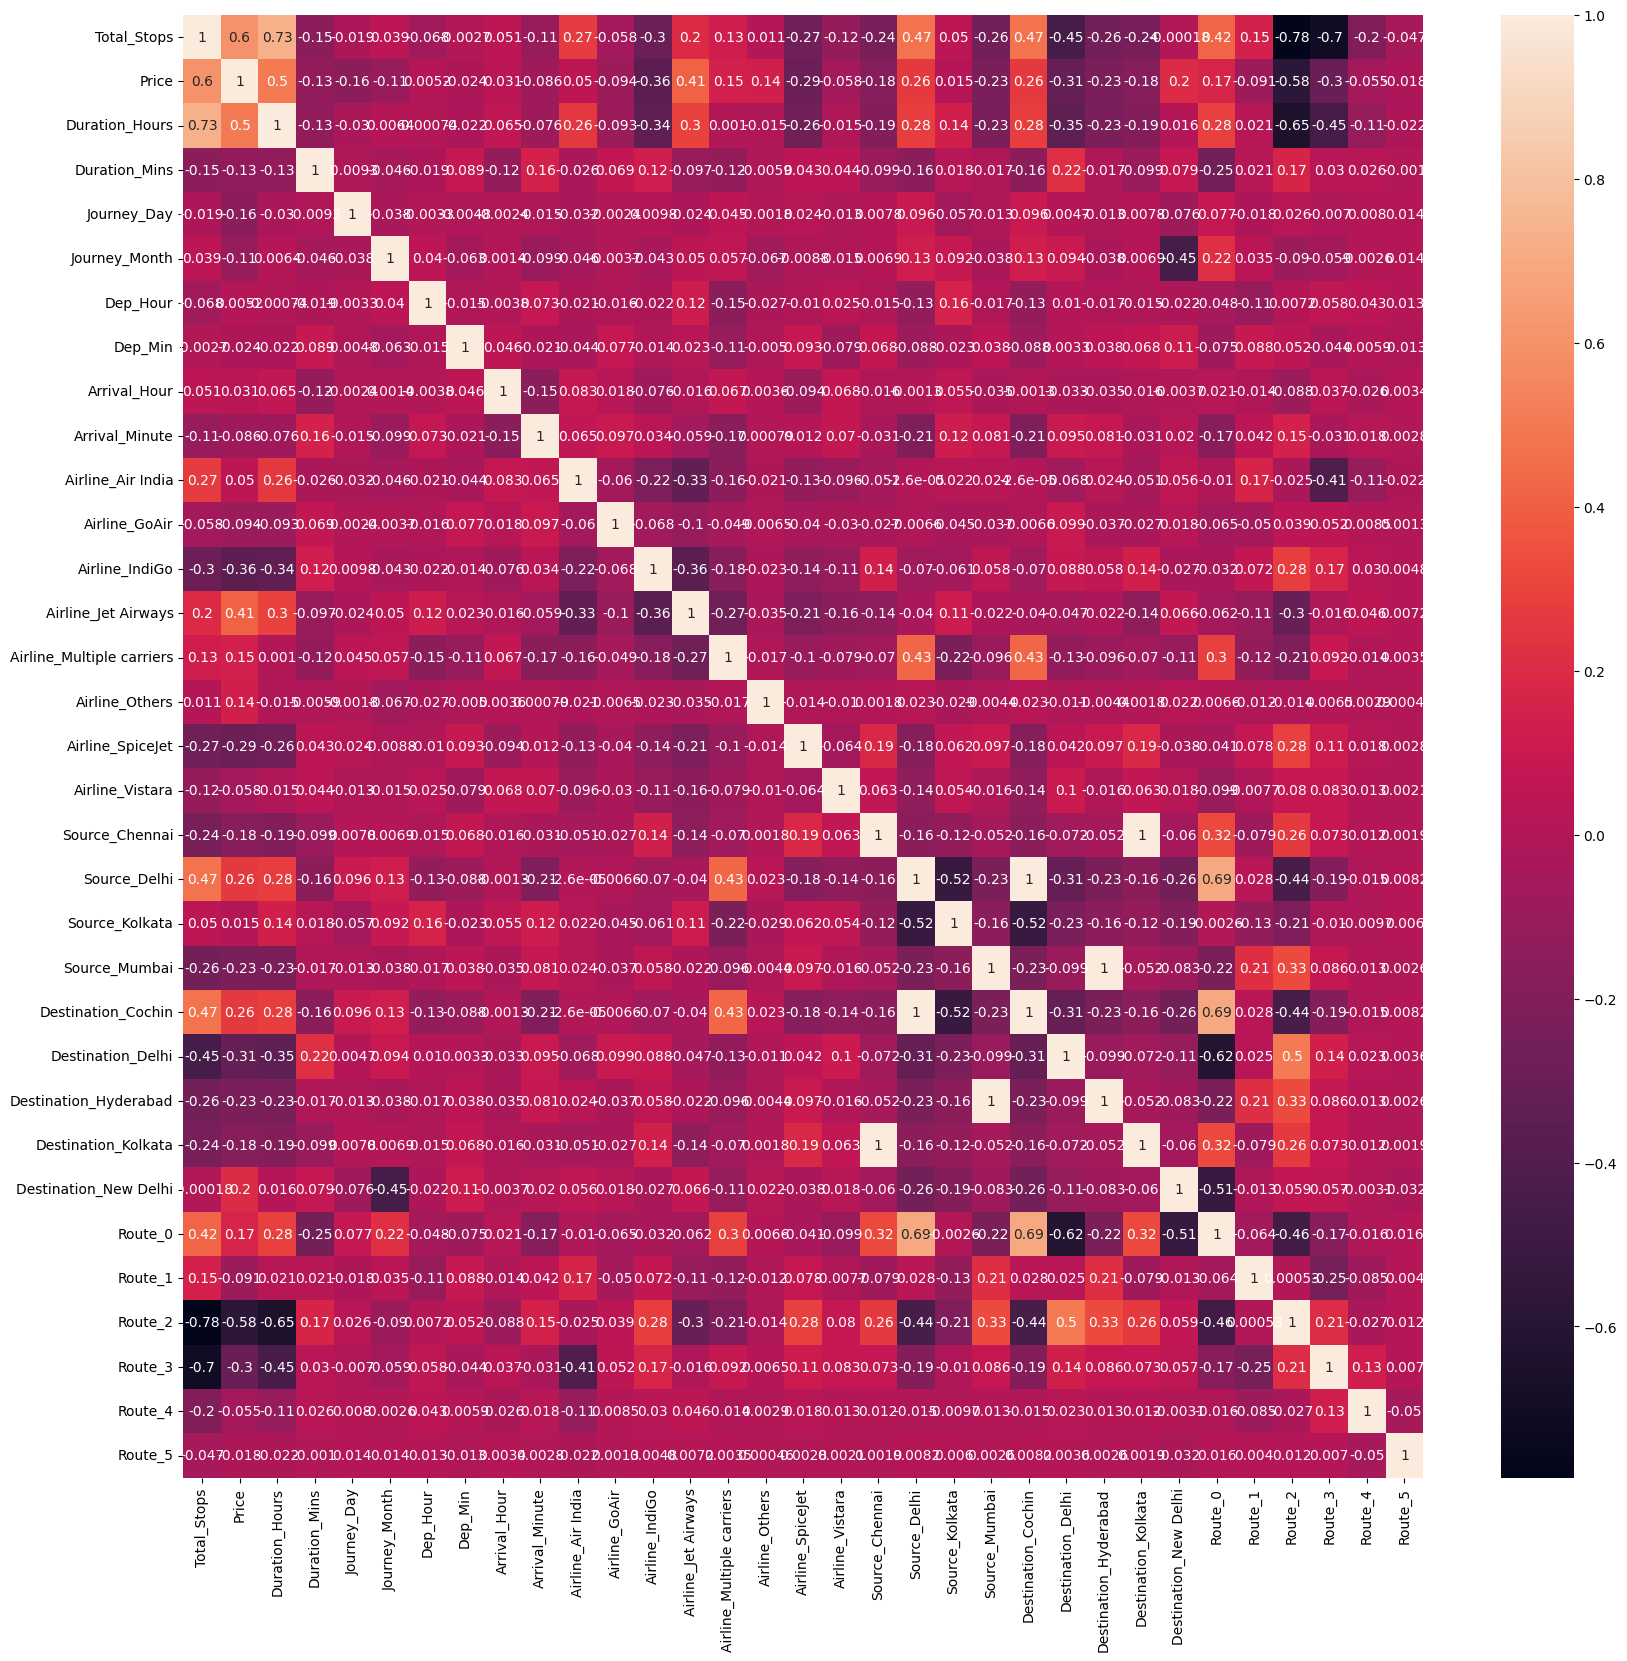

In [77]:
plt.figure(figsize=(20, 19))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [78]:
# Splitting Train data into feature and target

In [79]:
df_train_scaled.columns

Index(['Total_Stops', 'Duration_Hours', 'Duration_Mins', 'Journey_Day',
       'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Others', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Route_0', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [80]:
# X = df_train.drop(
#     columns=[
#         "Price", "Source_Chennai", "Source_Mumbai",
#         "Airline_Others", "Route_5", "Airline_Multiple carriers",
#         "Airline_Jet Airways", "Airline_Air India", "Airline_Multiple carriers",
#         "Airline_Jet Airways", "Airline_Air India", "Destination_Cochin",
#         "Destination_Kolkata", "Destination_Hyderabad"
#         ])


X = df_train_scaled
y = df_train_target

models = {}
plots = {}


In [81]:
predictions = {}

In [82]:
def store_detail(modelname: str, model, figure):
    models[modelname] = model
    plots[modelname] = figure


In [83]:
X.shape

(10463, 32)

In [84]:
X

,Total_Stops,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,-1.214674,-0.958135,1.290954,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,-0.439678,-0.137447,2.030121,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,-0.613325,-0.267152,-0.842899,-0.370850,-0.267152,-0.194397,3.232257,-1.659037,0.066723,1.352136,0.377526,0.061618,0.009777
1,1.813113,-0.361347,-0.190267,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,2.274393,-0.137447,-0.492582,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,1.630457,-0.267152,-0.842899,-0.370850,-0.267152,-0.194397,-0.309381,-0.004191,1.639776,-1.228609,-3.454825,0.061618,0.009777
2,1.813113,1.070945,-1.671488,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,-0.439678,-0.137447,-0.492582,1.351976,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,1.186382,-0.613325,-0.267152,1.186382,-0.370850,-0.267152,-0.194397,-0.309381,0.823232,2.740913,-0.859931,-2.359867,0.061618,0.009777
3,0.299219,-0.600062,-0.190267,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,-0.439678,-0.137447,2.030121,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,1.630457,-0.267152,-0.842899,-0.370850,-0.267152,-0.194397,-0.309381,-0.004191,3.055524,-0.982824,0.377526,0.061618,0.009777
4,0.299219,-0.719420,0.994710,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,-0.439678,-0.137447,2.030121,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,-0.613325,-0.267152,-0.842899,-0.370850,-0.267152,-0.194397,3.232257,-1.659037,3.055524,-0.368361,0.377526,0.061618,0.009777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,-1.214674,-0.958135,0.105977,-0.527045,-0.602838,1.138832,1.625992,1.256411,0.016901,-0.439678,-0.137447,-0.492582,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,1.630457,-0.267152,-0.842899,-0.370850,-0.267152,-0.194397,-0.309381,-0.004191,-0.719804,1.352136,0.377526,0.061618,0.009777
10459,-1.214674,-0.958135,0.402222,1.598856,-0.602838,1.313450,1.094501,1.402289,-0.284870,2.274393,-0.137447,-0.492582,-0.739658,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,1.630457,-0.267152,-0.842899,-0.370850,-0.267152,-0.194397,-0.309381,-0.004191,-0.719804,1.352136,0.377526,0.061618,0.009777
10460,-1.214674,-0.838777,-1.671488,1.598856,-0.602838,-0.781968,-0.234226,-0.348251,-0.284870,-0.439678,-0.137447,-0.492582,1.351976,-0.359249,-0.046937,-0.290643,-0.218796,-0.194397,-0.842899,-0.613325,-0.267152,-0.842899,2.696506,-0.267152,-0.194397,-0.309381,-1.659037,0.066723,1.352136,0.377526,0.061618,0.009777
10461,-1.214674,-0.958135,0.698466,-1.471890,-1.462170,-0.258114,0.297265,0.089384,-0.888411,-0.439678,-0.137447,-0.492582,-0.739658,-0.359249,-0.046937,-0.290643,4.570462,-0.194397,-0.842899,-0.613325,-0.267152,-0.842899,-0.370850,-0.267152,-0.194397,3.232257,-1.659037,0.066723,1.352136,0.377526,0.061618,0.009777


In [85]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10458     4107.0
10459     4145.0
10460     7229.0
10461    12648.0
10462    11753.0
Name: Price, Length: 10463, dtype: float64

### LightGBM
LightGBM is a gradient boosting framework that uses tree based learning algorithms. LightGBM also have low memory usage.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 8370, number of used features: 30
[LightGBM] [Info] Start training from score 9013.127240


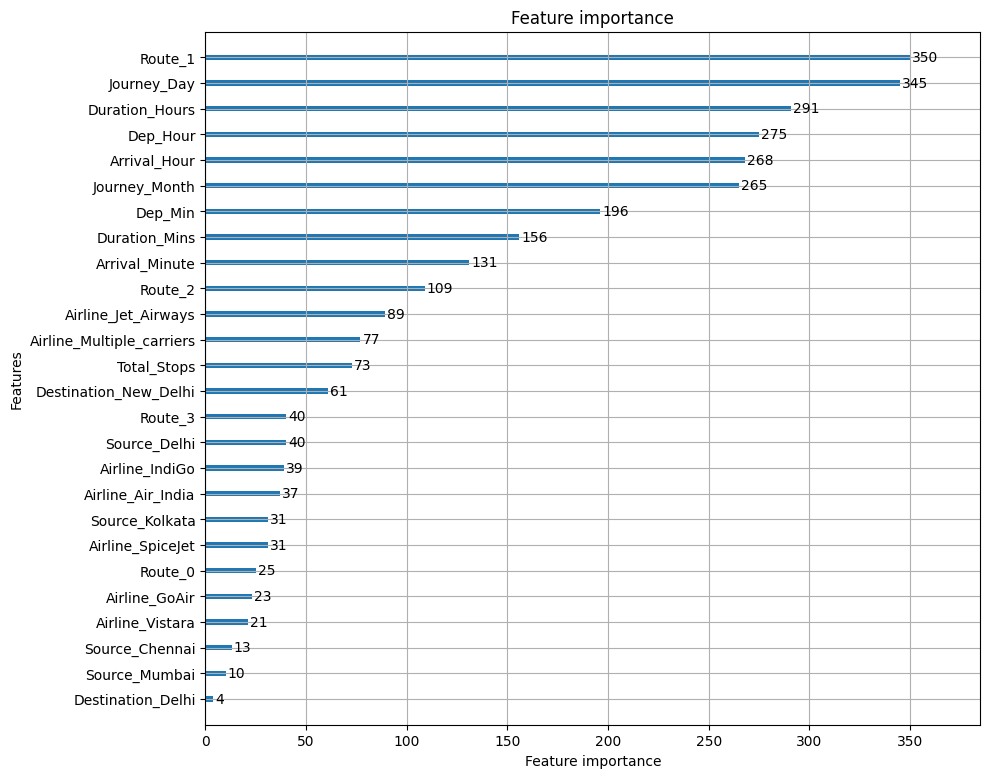

In [149]:
from lightgbm import LGBMRegressor, plot_importance
lgb = LGBMRegressor(objective = "regression", importance_type='split')
fig, ax = plt.subplots(figsize=(10, 9))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
lgb.fit(X_train, y_train)
plot_lgb = plot_importance(lgb, ax=ax)

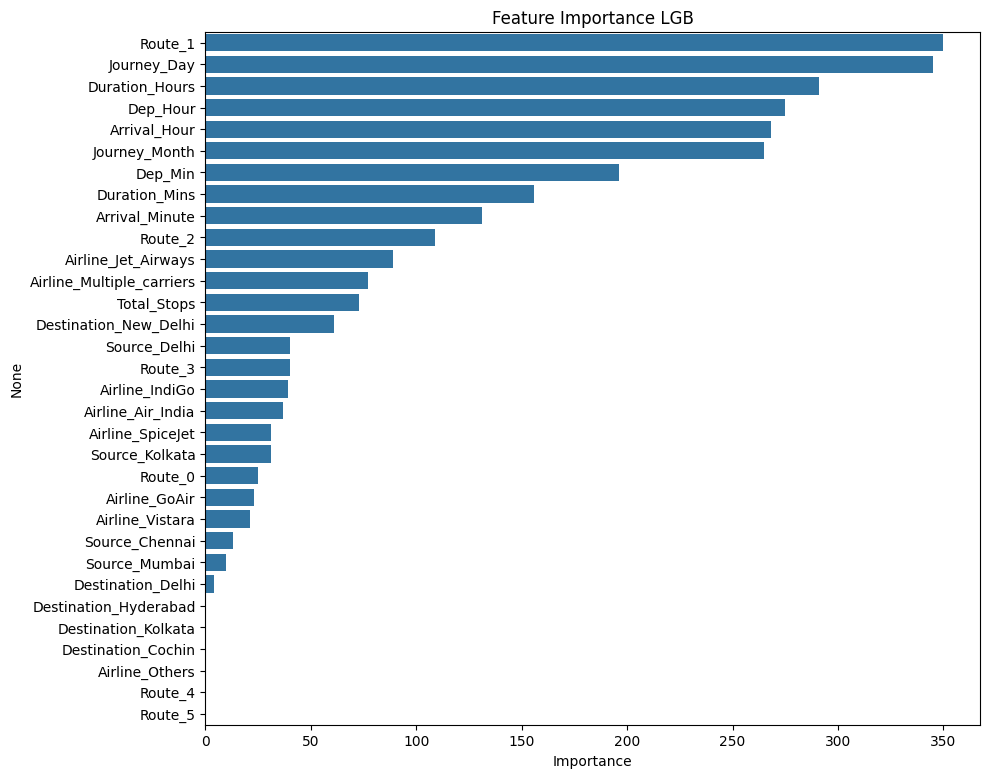

In [150]:
fig, ax = plt.subplots(figsize=(10, 9))
lgb_importance = pd.Series(data=lgb.feature_importances_, index=lgb.feature_name_).sort_values(ascending=False)
lgb_importance_plot = sns.barplot(x=lgb_importance.values, y=lgb_importance.index, ax=ax)
ax.set_title('Feature Importance LGB')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
plt.show()

'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_Cochin', 'Airline_Others', 'Route_4' and 'Route_5' features have very low importance.

In [153]:
predictions['LightGBM'] = lgb.predict(X_test)

Conclusion: From LGBMRegressor we have find out the importance of each feature. Here I am checking again the importance with xgboost.

In [154]:
drop_columns_lgb = [
    'Airline_Others', 'Source_Chennai','Source_Mumbai',
    'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
    'Destination_Kolkata', 'Route_4', 'Route_5'
    ]

In [155]:
store_detail('LightGBM', lgb, fig)

### Extra Tree Regression
ExtraTreesRegressor:-
1) It is a ensemble learning methods that uses in Decision Trees. The ExtraTree algorithm is like a the random forest algorithm, create many decision tree,but the sampling for each tree is random, without replacement.
 
 2) Extra Tree algo. does not performe bootstrap aggregation.In simple words,takes random subset of data without replacement.
 
 3) The main advantages of Extra Tree is the reduction of bias.

In [156]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(
    n_estimators=100,
    criterion='squared_error',
)
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor()

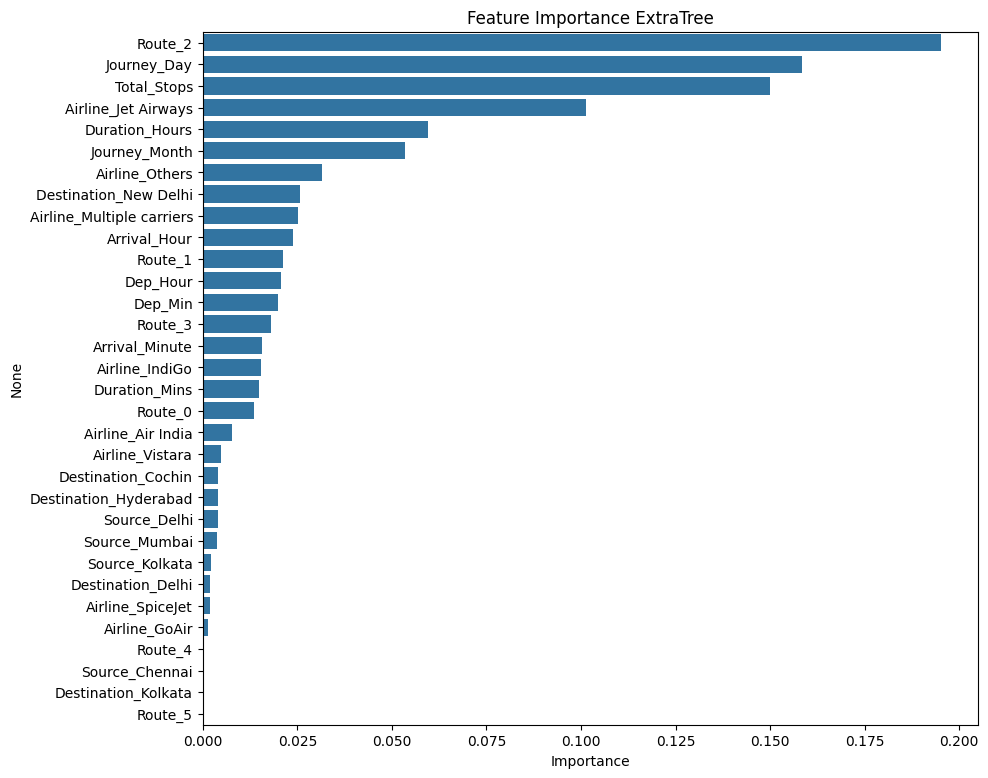

In [157]:
fig , ax = plt.subplots(figsize=(10, 9))

extra_tree_importance = pd.Series(data=extra_tree.feature_importances_, index=extra_tree.feature_names_in_).sort_values(ascending=False)
sns.barplot(x=extra_tree_importance.values, y=extra_tree_importance.index, ax=ax)
ax.set_title('Feature Importance ExtraTree')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
plt.show()

'Route_4', 'Source_Chennai', 'Destination_Kolkata' and 'Route_5' have very low importance.

In [160]:
predictions['ExtraTree'] = extra_tree.predict(X_test)

In [161]:
drop_columns_extra_tree = [
    'Destinatio_Cochin', 'Airline_SpiceJet', 'Source_Kolkata', 
    'Destination_Delhi', 'Airline_GoAir', 'Destination_Kolkata',
    'Source_Chennai', 'Route_4', 'Route_5'
]

In [162]:
store_detail('ExtraTree', extra_tree, fig)

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

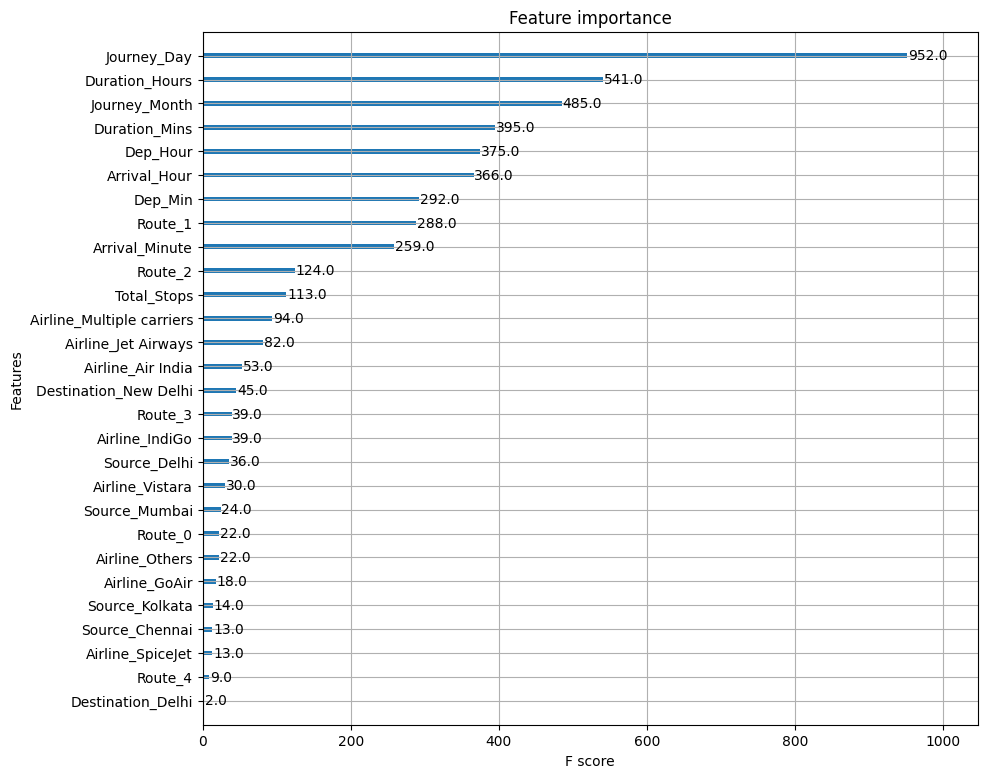

In [163]:
import xgboost
from xgboost.plotting import plot_importance

# creating figure and axes
fig, ax = plt.subplots(figsize=(10, 9))

xgb = xgboost.XGBRegressor(objective='reg:squarederror', importance_type='gain')
xgb.fit(X_train, y_train)
plot_xgb = plot_importance(xgb, ax=ax);

In [164]:
temp = xgb.get_booster()

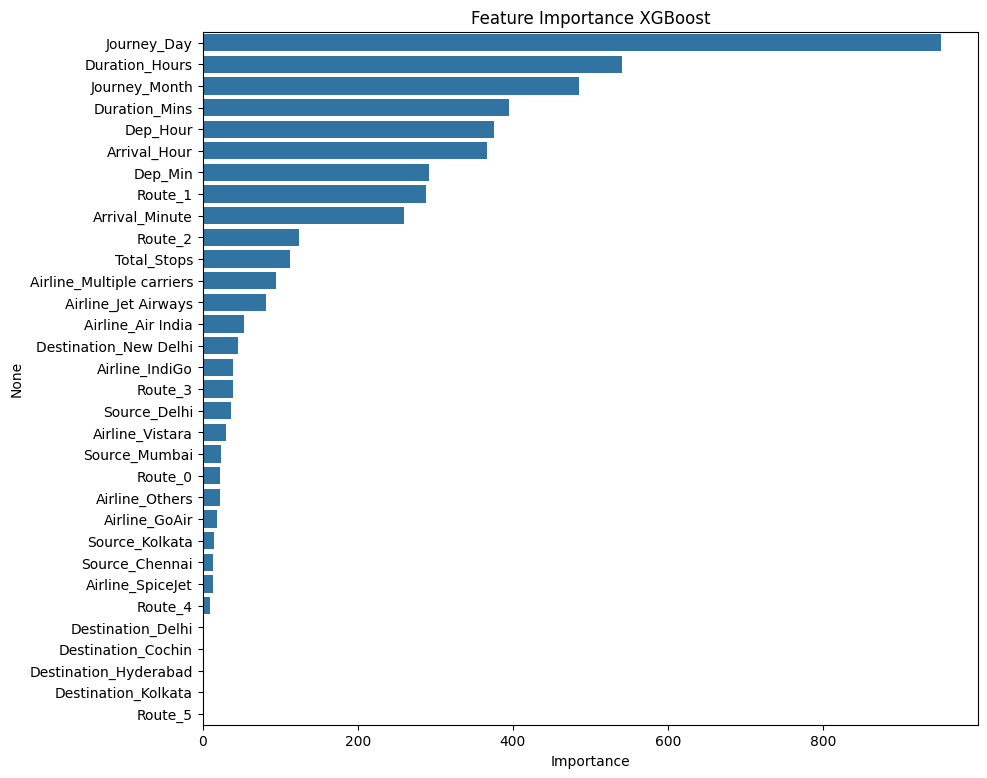

In [165]:
xgb_fscore:dict = temp.get_fscore()
cols = []
f_score = []
for col in xgb.feature_names_in_:
    cols.append(col)
    f_score.append(xgb_fscore.get(col, 0))
xgb_importance = pd.Series(index=cols, data=f_score).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, ax=ax)
ax.set_title('Feature Importance XGBoost')
ax.set_xlabel('Importance')
ax.set_xlabel('Features')
plt.show()

Similar to previous model 'Route_4', 'Destination_Delhi', 'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata' and 'Route_5' have very low importance.

In [168]:
predictions['XGBoost'] = xgb.predict(X_test)

In [169]:
# dropping these columns
drop_columns_xgb = [
    'Airline_Others', 'Airline_SpiceJet', 'Airline_GoAir', 
    'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 
    'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 
    'Destination_Kolkata', 'Route_4', 'Route_5'
]

In [170]:
store_detail('XGBoost', xgb, fig)

## Random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=True, verbose=1)

random_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


RandomForestRegressor(verbose=1)

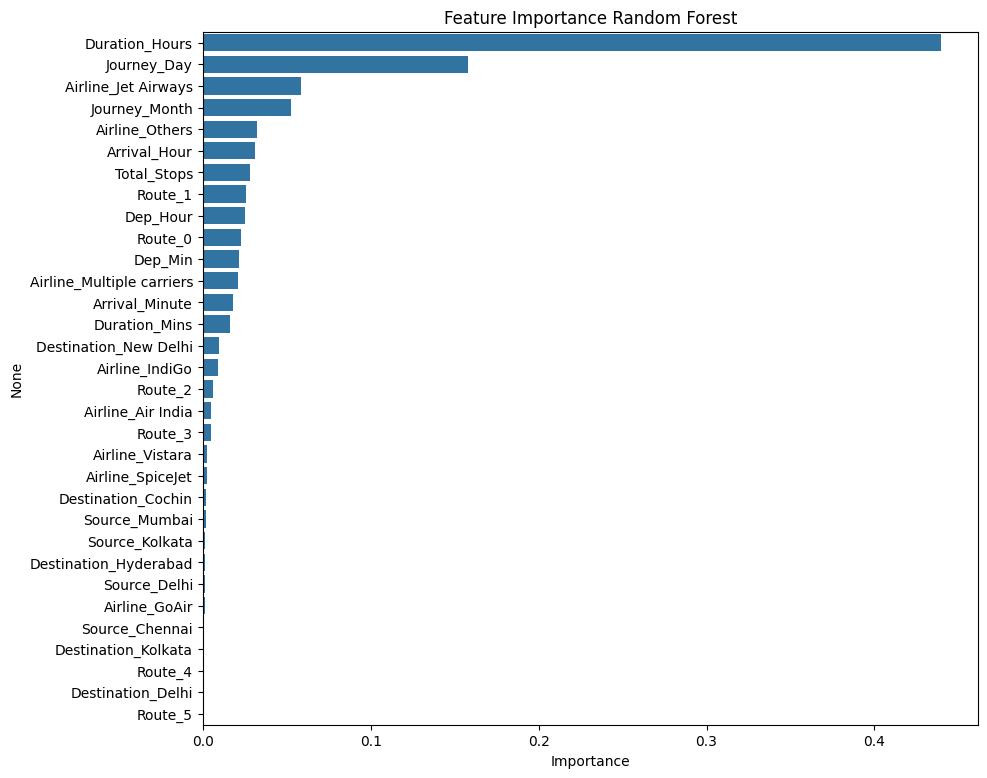

In [172]:
fig , ax = plt.subplots(figsize=(10, 9))

random_forest_importance = pd.Series(data=random_forest.feature_importances_, index=random_forest.feature_names_in_).sort_values(ascending=False)
random_forest_plot = sns.barplot(x=random_forest_importance.values, y=random_forest_importance.index, ax=ax)
ax.set_title('Feature Importance Random Forest')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
plt.show()

Here we can see there a 13 features have very low importance.

In [175]:
predictions['RandomForest'] = random_forest.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [176]:
store_detail('RandomForest', random_forest, fig)

Importance of All Features

In [178]:
all_importance = pd.DataFrame(
    index=xgb_importance.sort_index().index,
    data={
        'LightGBM' : lgb_importance.sort_index().values,
        'XGBoost' : xgb_importance.sort_index().values,
        'ExtraTree' : extra_tree_importance.sort_index().values,
        'RandomForest' : random_forest_importance.sort_index().values
    }
             )

In [179]:
all_importance

,LightGBM,XGBoost,ExtraTree,RandomForest
Airline_Air India,37,53.0,0.007822,0.004893
Airline_GoAir,23,18.0,0.001265,0.001128
Airline_IndiGo,39,39.0,0.015401,0.008882
Airline_Jet Airways,89,82.0,0.101245,0.058414
Airline_Multiple carriers,77,94.0,0.025146,0.021048
Airline_Others,0,22.0,0.031475,0.032542
Airline_SpiceJet,31,13.0,0.001815,0.002364
Airline_Vistara,21,30.0,0.004917,0.002730
Arrival_Hour,268,366.0,0.023950,0.030995
Arrival_Minute,131,259.0,0.015607,0.018055


Creating a `Cross` column in importance dataframe which is product of importance of all model.

In [180]:
from sklearn.preprocessing import MinMaxScaler

min_max_scale = MinMaxScaler((1, 1.1))
all_importance['Cross'] = min_max_scale.fit_transform(all_importance[['LightGBM']]) * min_max_scale.fit_transform(all_importance[['XGBoost']]) * min_max_scale.fit_transform(all_importance[['ExtraTree']]) * min_max_scale.fit_transform(all_importance[['RandomForest']])

In [181]:
all_importance

,LightGBM,XGBoost,ExtraTree,RandomForest,Cross
Airline_Air India,37,53.0,0.007822,0.004893,1.021388
Airline_GoAir,23,18.0,0.001265,0.001128,1.009369
Airline_IndiGo,39,39.0,0.015401,0.008882,1.025348
Airline_Jet Airways,89,82.0,0.101245,0.058414,1.102364
Airline_Multiple carriers,77,94.0,0.025146,0.021048,1.050379
Airline_Others,0,22.0,0.031475,0.032542,1.026000
Airline_SpiceJet,31,13.0,0.001815,0.002364,1.011700
Airline_Vistara,21,30.0,0.004917,0.002730,1.012323
Arrival_Hour,268,366.0,0.023950,0.030995,1.139642
Arrival_Minute,131,259.0,0.015607,0.018055,1.078569


Sorting importance by `Cross`

In [182]:
all_importance.sort_values(by='Cross', ascending=False)

,LightGBM,XGBoost,ExtraTree,RandomForest,Cross
Journey_Day,345,952.0,0.158550,0.158079,1.353586
Duration_Hours,291,541.0,0.059498,0.439568,1.297540
Journey_Month,265,485.0,0.053500,0.052478,1.175360
Route_1,350,288.0,0.021308,0.025837,1.152366
Route_2,109,124.0,0.195159,0.005794,1.150543
Arrival_Hour,268,366.0,0.023950,0.030995,1.139642
Dep_Hour,275,375.0,0.020803,0.025301,1.139510
Total_Stops,73,113.0,0.149947,0.027885,1.119391
Dep_Min,196,292.0,0.019810,0.021448,1.104784
Airline_Jet Airways,89,82.0,0.101245,0.058414,1.102364


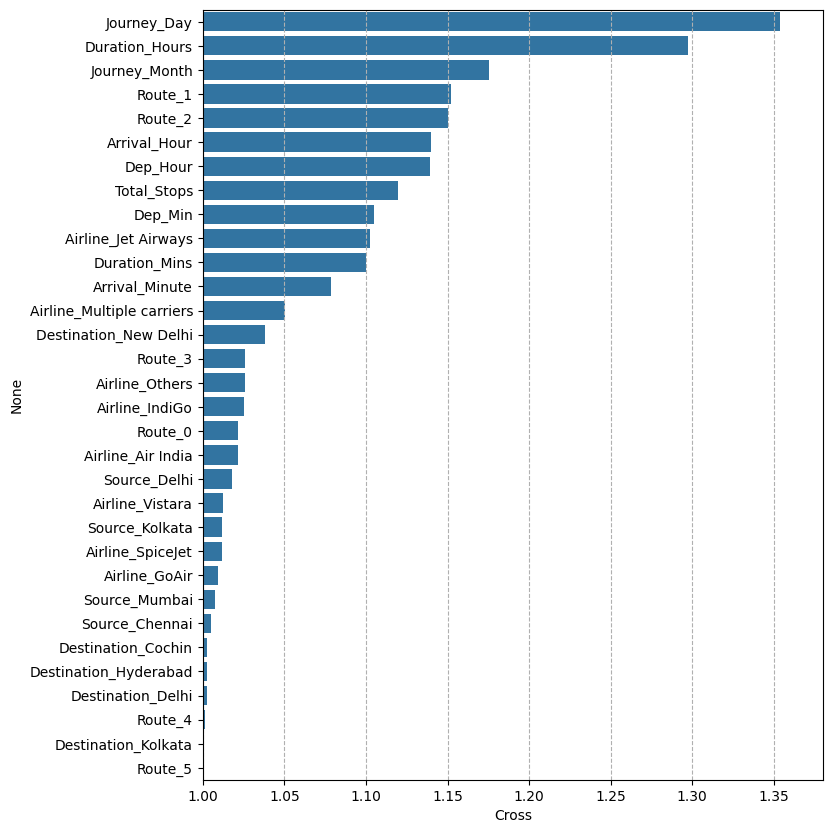

In [183]:
_ = all_importance.sort_values(by='Cross', ascending=False)

fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(y=_.index, x=_.Cross, ax=ax)
ax.set_xlim(left=1, right=1.38)
ax.grid(axis='x', linestyle='--')
ax.set_title('Cross Importance')
ax.set_ylabel('Features')
plt.show()

Conclusion: Removing the feature whose importance is very low.

In [184]:
drop_columns = [
    'Airline_Vistara', 'Source_Kolkata', 'Airline_GoAir', 
    'Airline_SpiceJet', 'Source_Mumbai', 'Source_Chennai', 
    'Destination_Hyderabad', 'Destination_Delhi', 'Destination_Cochin', 
    'Route_4', 'Destination_Kolkata', 'Route_5'
]

### Hyperparameter Optimization

In [216]:
from lightgbm import LGBMRegressor
import optuna
from sklearn.metrics import mean_squared_error, r2_score
   
# X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns_lgb), y, test_size=0.1, random_state=14)

def objective_lgb(trial):
    'LightGBM Objective Function'

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # GBM Regessor Parameters
    params = {
        'objective' : 'regression',
        'boosting_type' : trial.suggest_categorical('boosting_type', ['gbdt']),
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
        'subsample' : trial.suggest_float('subsample', 0.3, 0.9),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.3, 0.9),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state' : trial.suggest_categorical('random_state', [42])
    }

    model_lgb = LGBMRegressor(verbosity=-1, **params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    # Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    return mae

study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=100, show_progress_bar=True)

IPython.display.display('Best Parameters: ', study_lgb.best_params)
lgb = LGBMRegressor(**study_lgb.best_params)

[I 2024-04-04 13:10:34,920] A new study created in memory with name: no-name-7f06bf27-17f0-444a-aaf9-219d68721699
Best trial: 0. Best value: 1180.51:   1%|          | 1/100 [00:00<00:34,  2.87it/s]

[I 2024-04-04 13:10:35,268] Trial 0 finished with value: 1180.5132747587868 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.05922113605941255, 'n_estimators': 316, 'min_child_weight': 1, 'subsample': 0.5661744320001576, 'colsample_bytree': 0.7352383197740082, 'reg_alpha': 0.4159745728482715, 'reg_lambda': 0.6807197211230519, 'random_state': 42}. Best is trial 0 with value: 1180.5132747587868.


Best trial: 0. Best value: 1180.51:   2%|▏         | 2/100 [00:00<00:36,  2.68it/s]

[I 2024-04-04 13:10:35,659] Trial 1 finished with value: 1278.804444266033 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.015616411162524083, 'n_estimators': 316, 'min_child_weight': 6, 'subsample': 0.7144616374688568, 'colsample_bytree': 0.8362422456226892, 'reg_alpha': 0.5087610157106424, 'reg_lambda': 0.7467314136909299, 'random_state': 42}. Best is trial 0 with value: 1180.5132747587868.


Best trial: 0. Best value: 1180.51:   3%|▎         | 3/100 [00:01<00:36,  2.67it/s]

[I 2024-04-04 13:10:36,033] Trial 2 finished with value: 1343.1587759077734 and parameters: {'boosting_type': 'gbdt', 'max_depth': 4, 'learning_rate': 0.023493480397895648, 'n_estimators': 486, 'min_child_weight': 3, 'subsample': 0.48519994028277313, 'colsample_bytree': 0.7443692463693121, 'reg_alpha': 0.16134519962312155, 'reg_lambda': 0.14680263577207991, 'random_state': 42}. Best is trial 0 with value: 1180.5132747587868.


Best trial: 0. Best value: 1180.51:   4%|▍         | 4/100 [00:01<00:43,  2.20it/s]

[I 2024-04-04 13:10:36,612] Trial 3 finished with value: 1512.4179490308304 and parameters: {'boosting_type': 'gbdt', 'max_depth': 2, 'learning_rate': 0.07608791357619979, 'n_estimators': 871, 'min_child_weight': 3, 'subsample': 0.5281894834323959, 'colsample_bytree': 0.3012529888045575, 'reg_alpha': 0.03779498564838791, 'reg_lambda': 0.4882464305770529, 'random_state': 42}. Best is trial 0 with value: 1180.5132747587868.


Best trial: 0. Best value: 1180.51:   5%|▌         | 5/100 [00:01<00:35,  2.66it/s]

[I 2024-04-04 13:10:36,847] Trial 4 finished with value: 1646.396489862832 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.010989269986715134, 'n_estimators': 181, 'min_child_weight': 5, 'subsample': 0.47916529961113963, 'colsample_bytree': 0.7362379802608123, 'reg_alpha': 0.9738411817369893, 'reg_lambda': 0.7887631414471302, 'random_state': 42}. Best is trial 0 with value: 1180.5132747587868.


Best trial: 5. Best value: 1122.12:   6%|▌         | 6/100 [00:02<00:51,  1.83it/s]

[I 2024-04-04 13:10:37,728] Trial 5 finished with value: 1122.1199621174412 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.057671612241196275, 'n_estimators': 827, 'min_child_weight': 8, 'subsample': 0.32821284464107164, 'colsample_bytree': 0.8433732442968243, 'reg_alpha': 0.06969125956119389, 'reg_lambda': 0.6617673345424384, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:   7%|▋         | 7/100 [00:03<00:45,  2.06it/s]

[I 2024-04-04 13:10:38,084] Trial 6 finished with value: 1228.9094481097088 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.04558226318177707, 'n_estimators': 305, 'min_child_weight': 9, 'subsample': 0.49485707979851923, 'colsample_bytree': 0.6780362357634688, 'reg_alpha': 0.49240893570608113, 'reg_lambda': 0.808488167332857, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:   8%|▊         | 8/100 [00:03<00:43,  2.10it/s]

[I 2024-04-04 13:10:38,545] Trial 7 finished with value: 1549.71119355237 and parameters: {'boosting_type': 'gbdt', 'max_depth': 3, 'learning_rate': 0.010058859473716408, 'n_estimators': 777, 'min_child_weight': 5, 'subsample': 0.3823102906195929, 'colsample_bytree': 0.8989236510258487, 'reg_alpha': 0.9067274009473015, 'reg_lambda': 0.08118916665689807, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:   9%|▉         | 9/100 [00:04<00:50,  1.78it/s]

[I 2024-04-04 13:10:39,287] Trial 8 finished with value: 1286.4342565652607 and parameters: {'boosting_type': 'gbdt', 'max_depth': 4, 'learning_rate': 0.024680941219922037, 'n_estimators': 718, 'min_child_weight': 9, 'subsample': 0.48204003984553523, 'colsample_bytree': 0.5403609620173011, 'reg_alpha': 0.9955355248604079, 'reg_lambda': 0.9666242573784811, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  10%|█         | 10/100 [00:05<01:02,  1.43it/s]

[I 2024-04-04 13:10:40,294] Trial 9 finished with value: 1254.0226135875473 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.07132336844921489, 'n_estimators': 966, 'min_child_weight': 9, 'subsample': 0.6285719891385684, 'colsample_bytree': 0.8438870915012711, 'reg_alpha': 0.8875780899027768, 'reg_lambda': 0.20762467712960017, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  11%|█         | 11/100 [00:06<01:03,  1.39it/s]

[I 2024-04-04 13:10:41,057] Trial 10 finished with value: 1145.7651710270677 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.09790672536157798, 'n_estimators': 598, 'min_child_weight': 7, 'subsample': 0.8694326092698734, 'colsample_bytree': 0.5169909029835409, 'reg_alpha': 0.24826726340230165, 'reg_lambda': 0.4712753731480278, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  12%|█▏        | 12/100 [00:06<01:06,  1.33it/s]

[I 2024-04-04 13:10:41,894] Trial 11 finished with value: 1125.3611503254695 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.09630196190627408, 'n_estimators': 595, 'min_child_weight': 7, 'subsample': 0.8926571581877653, 'colsample_bytree': 0.493396351788995, 'reg_alpha': 0.2156200964879585, 'reg_lambda': 0.4354461913955584, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  13%|█▎        | 13/100 [00:07<01:05,  1.33it/s]

[I 2024-04-04 13:10:42,650] Trial 12 finished with value: 1192.1402512830734 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.04235313713846713, 'n_estimators': 520, 'min_child_weight': 7, 'subsample': 0.32459609396355155, 'colsample_bytree': 0.41620859962937895, 'reg_alpha': 0.01574678591138018, 'reg_lambda': 0.34581222958952795, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  14%|█▍        | 14/100 [00:08<01:07,  1.28it/s]

[I 2024-04-04 13:10:43,498] Trial 13 finished with value: 1191.6534212856704 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'learning_rate': 0.08845733278196818, 'n_estimators': 689, 'min_child_weight': 10, 'subsample': 0.8955918593407834, 'colsample_bytree': 0.4514835626760791, 'reg_alpha': 0.29118729434720486, 'reg_lambda': 0.5909843207305009, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  15%|█▌        | 15/100 [00:09<01:12,  1.17it/s]

[I 2024-04-04 13:10:44,515] Trial 14 finished with value: 1156.2072978567671 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.04811662316658071, 'n_estimators': 875, 'min_child_weight': 7, 'subsample': 0.7875128791261538, 'colsample_bytree': 0.6257660701712211, 'reg_alpha': 0.6507790103738362, 'reg_lambda': 0.36337102921861025, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  16%|█▌        | 16/100 [00:10<01:02,  1.35it/s]

[I 2024-04-04 13:10:44,988] Trial 15 finished with value: 2040.312190465593 and parameters: {'boosting_type': 'gbdt', 'max_depth': 1, 'learning_rate': 0.03396016418860776, 'n_estimators': 633, 'min_child_weight': 8, 'subsample': 0.6963757468481508, 'colsample_bytree': 0.3743587273950999, 'reg_alpha': 0.1864024842238885, 'reg_lambda': 0.3181668551308141, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  17%|█▋        | 17/100 [00:10<00:57,  1.43it/s]

[I 2024-04-04 13:10:45,592] Trial 16 finished with value: 1175.8132862161076 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.06273848618726291, 'n_estimators': 436, 'min_child_weight': 4, 'subsample': 0.3740547387747429, 'colsample_bytree': 0.5688715678923272, 'reg_alpha': 0.10939598998959105, 'reg_lambda': 0.5836892211551561, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  18%|█▊        | 18/100 [00:11<01:02,  1.30it/s]

[I 2024-04-04 13:10:46,524] Trial 17 finished with value: 1150.613490970718 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.05583876482940158, 'n_estimators': 817, 'min_child_weight': 10, 'subsample': 0.7956420662995682, 'colsample_bytree': 0.4870799184570263, 'reg_alpha': 0.3533379080009845, 'reg_lambda': 0.9292492473840765, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  19%|█▉        | 19/100 [00:12<01:09,  1.17it/s]

[I 2024-04-04 13:10:47,580] Trial 18 finished with value: 1124.0267025108835 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.09839755642817172, 'n_estimators': 988, 'min_child_weight': 8, 'subsample': 0.6868770085862008, 'colsample_bytree': 0.6533373824519207, 'reg_alpha': 0.6898749143290717, 'reg_lambda': 0.6179349982409519, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  20%|██        | 20/100 [00:13<01:14,  1.08it/s]

[I 2024-04-04 13:10:48,677] Trial 19 finished with value: 1140.898587311405 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.03515980623924875, 'n_estimators': 982, 'min_child_weight': 8, 'subsample': 0.6439278639853421, 'colsample_bytree': 0.658947789148908, 'reg_alpha': 0.741603925378699, 'reg_lambda': 0.6363946443711325, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 5. Best value: 1122.12:  21%|██        | 21/100 [00:14<01:15,  1.04it/s]

[I 2024-04-04 13:10:49,715] Trial 20 finished with value: 1137.9784444453478 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'learning_rate': 0.07685545235353866, 'n_estimators': 998, 'min_child_weight': 6, 'subsample': 0.41424075317591286, 'colsample_bytree': 0.8110153181552939, 'reg_alpha': 0.6809290157950874, 'reg_lambda': 0.8581695326721026, 'random_state': 42}. Best is trial 5 with value: 1122.1199621174412.


Best trial: 21. Best value: 1120.4:  22%|██▏       | 22/100 [00:15<01:18,  1.00s/it]

[I 2024-04-04 13:10:50,822] Trial 21 finished with value: 1120.4020472217385 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.07548654465008554, 'n_estimators': 855, 'min_child_weight': 8, 'subsample': 0.8107050033744687, 'colsample_bytree': 0.5844803039216109, 'reg_alpha': 0.5834765049908922, 'reg_lambda': 0.4529738641519831, 'random_state': 42}. Best is trial 21 with value: 1120.4020472217385.


Best trial: 22. Best value: 1120:  23%|██▎       | 23/100 [00:17<01:20,  1.05s/it]  

[I 2024-04-04 13:10:51,963] Trial 22 finished with value: 1119.997248378291 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.07699615224103631, 'n_estimators': 890, 'min_child_weight': 8, 'subsample': 0.7353931005542842, 'colsample_bytree': 0.6041186197633825, 'reg_alpha': 0.6157709069120851, 'reg_lambda': 0.7028435881951972, 'random_state': 42}. Best is trial 22 with value: 1119.997248378291.


Best trial: 22. Best value: 1120:  24%|██▍       | 24/100 [00:18<01:20,  1.06s/it]

[I 2024-04-04 13:10:53,062] Trial 23 finished with value: 1126.183946574693 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.053885781166458424, 'n_estimators': 868, 'min_child_weight': 8, 'subsample': 0.7868600318792703, 'colsample_bytree': 0.5957313612370816, 'reg_alpha': 0.5699469079723822, 'reg_lambda': 0.7124208087720225, 'random_state': 42}. Best is trial 22 with value: 1119.997248378291.


Best trial: 24. Best value: 1100.33:  25%|██▌       | 25/100 [00:18<01:13,  1.02it/s]

[I 2024-04-04 13:10:53,853] Trial 24 finished with value: 1100.3259117082098 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.06867901673979511, 'n_estimators': 766, 'min_child_weight': 10, 'subsample': 0.7550808794514143, 'colsample_bytree': 0.6952743244439273, 'reg_alpha': 0.7931242214327463, 'reg_lambda': 0.5497440556887077, 'random_state': 42}. Best is trial 24 with value: 1100.3259117082098.


Best trial: 25. Best value: 1095.2:  26%|██▌       | 26/100 [00:19<01:10,  1.06it/s] 

[I 2024-04-04 13:10:54,720] Trial 25 finished with value: 1095.1985623674786 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.06987496397962763, 'n_estimators': 746, 'min_child_weight': 10, 'subsample': 0.8268684577728833, 'colsample_bytree': 0.5938296354546215, 'reg_alpha': 0.8040697653653982, 'reg_lambda': 0.5490783867993129, 'random_state': 42}. Best is trial 25 with value: 1095.1985623674786.


Best trial: 25. Best value: 1095.2:  27%|██▋       | 27/100 [00:20<01:08,  1.06it/s]

[I 2024-04-04 13:10:55,653] Trial 26 finished with value: 1156.8948528505032 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.040423511019637655, 'n_estimators': 735, 'min_child_weight': 10, 'subsample': 0.7385206534039855, 'colsample_bytree': 0.682917890892302, 'reg_alpha': 0.7885125629230336, 'reg_lambda': 0.5476328166899119, 'random_state': 42}. Best is trial 25 with value: 1095.1985623674786.


Best trial: 25. Best value: 1095.2:  28%|██▊       | 28/100 [00:21<01:03,  1.14it/s]

[I 2024-04-04 13:10:56,386] Trial 27 finished with value: 1142.0247342763575 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.06733906345036156, 'n_estimators': 675, 'min_child_weight': 10, 'subsample': 0.8346587679431731, 'colsample_bytree': 0.7762514000127906, 'reg_alpha': 0.7993561595671128, 'reg_lambda': 0.5362749030680627, 'random_state': 42}. Best is trial 25 with value: 1095.1985623674786.


Best trial: 25. Best value: 1095.2:  29%|██▉       | 29/100 [00:22<01:04,  1.10it/s]

[I 2024-04-04 13:10:57,361] Trial 28 finished with value: 1199.0168979753553 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'learning_rate': 0.02372094632853868, 'n_estimators': 919, 'min_child_weight': 9, 'subsample': 0.7535748791790281, 'colsample_bytree': 0.6996473957101139, 'reg_alpha': 0.8455841390246451, 'reg_lambda': 0.27272431831377436, 'random_state': 42}. Best is trial 25 with value: 1095.1985623674786.


Best trial: 25. Best value: 1095.2:  30%|███       | 30/100 [00:23<01:04,  1.09it/s]

[I 2024-04-04 13:10:58,301] Trial 29 finished with value: 1145.1628947015727 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.028766447413905116, 'n_estimators': 770, 'min_child_weight': 10, 'subsample': 0.5990482230784496, 'colsample_bytree': 0.6357787077678745, 'reg_alpha': 0.6089769267238863, 'reg_lambda': 0.8882587469887588, 'random_state': 42}. Best is trial 25 with value: 1095.1985623674786.


Best trial: 30. Best value: 1093.9:  31%|███       | 31/100 [00:24<01:05,  1.06it/s]

[I 2024-04-04 13:10:59,312] Trial 30 finished with value: 1093.89589095283 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.08348595695562147, 'n_estimators': 920, 'min_child_weight': 9, 'subsample': 0.6614074541155446, 'colsample_bytree': 0.5368563671760649, 'reg_alpha': 0.7368765013512732, 'reg_lambda': 0.7008811320519961, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  32%|███▏      | 32/100 [00:25<01:05,  1.04it/s]

[I 2024-04-04 13:11:00,324] Trial 31 finished with value: 1184.748677254363 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.0828476054944759, 'n_estimators': 928, 'min_child_weight': 9, 'subsample': 0.6495603759279778, 'colsample_bytree': 0.5483937731520478, 'reg_alpha': 0.7305270868224262, 'reg_lambda': 0.7016559245688939, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  33%|███▎      | 33/100 [00:26<01:00,  1.11it/s]

[I 2024-04-04 13:11:01,066] Trial 32 finished with value: 1207.4423845516037 and parameters: {'boosting_type': 'gbdt', 'max_depth': 4, 'learning_rate': 0.06484821873972753, 'n_estimators': 790, 'min_child_weight': 9, 'subsample': 0.7435301368725508, 'colsample_bytree': 0.6201675709118099, 'reg_alpha': 0.487176856831885, 'reg_lambda': 0.7610782764672228, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  34%|███▍      | 34/100 [00:27<01:01,  1.08it/s]

[I 2024-04-04 13:11:02,053] Trial 33 finished with value: 1124.9185576438788 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.0505998827299089, 'n_estimators': 921, 'min_child_weight': 1, 'subsample': 0.6766436304866379, 'colsample_bytree': 0.7158145956010479, 'reg_alpha': 0.7608454305864648, 'reg_lambda': 0.6828681514894288, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  35%|███▌      | 35/100 [00:28<01:00,  1.08it/s]

[I 2024-04-04 13:11:02,989] Trial 34 finished with value: 1107.1601067972438 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.08209551154136079, 'n_estimators': 742, 'min_child_weight': 10, 'subsample': 0.8347699889021831, 'colsample_bytree': 0.5955083187793757, 'reg_alpha': 0.8360692337447349, 'reg_lambda': 0.5244042458198956, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  36%|███▌      | 36/100 [00:28<00:54,  1.18it/s]

[I 2024-04-04 13:11:03,658] Trial 35 finished with value: 1269.907942788469 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.019085217670190283, 'n_estimators': 430, 'min_child_weight': 10, 'subsample': 0.8372792272643863, 'colsample_bytree': 0.5541792157348908, 'reg_alpha': 0.91992124007784, 'reg_lambda': 0.4096490211921996, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  37%|███▋      | 37/100 [00:29<00:50,  1.26it/s]

[I 2024-04-04 13:11:04,323] Trial 36 finished with value: 1162.5198738044478 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'learning_rate': 0.0861995048968458, 'n_estimators': 643, 'min_child_weight': 10, 'subsample': 0.5703232001641472, 'colsample_bytree': 0.772718717045612, 'reg_alpha': 0.8390006521519668, 'reg_lambda': 0.5470502676566448, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  38%|███▊      | 38/100 [00:30<00:53,  1.17it/s]

[I 2024-04-04 13:11:05,319] Trial 37 finished with value: 1267.4589056557109 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.01337709477792836, 'n_estimators': 739, 'min_child_weight': 9, 'subsample': 0.8514708316679891, 'colsample_bytree': 0.4560923424014847, 'reg_alpha': 0.8469137002850657, 'reg_lambda': 0.485921366514085, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  39%|███▉      | 39/100 [00:31<00:48,  1.27it/s]

[I 2024-04-04 13:11:05,956] Trial 38 finished with value: 1308.5729067696561 and parameters: {'boosting_type': 'gbdt', 'max_depth': 3, 'learning_rate': 0.05926538365158937, 'n_estimators': 815, 'min_child_weight': 10, 'subsample': 0.7643626772175615, 'colsample_bytree': 0.5136523039545434, 'reg_alpha': 0.9561436603404562, 'reg_lambda': 0.5194946569676963, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  40%|████      | 40/100 [00:31<00:47,  1.26it/s]

[I 2024-04-04 13:11:06,765] Trial 39 finished with value: 1114.928579466953 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.06650070185233135, 'n_estimators': 583, 'min_child_weight': 1, 'subsample': 0.8159694743419131, 'colsample_bytree': 0.32175690323323625, 'reg_alpha': 0.812271151515471, 'reg_lambda': 0.8153456256473585, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  41%|████      | 41/100 [00:32<00:46,  1.27it/s]

[I 2024-04-04 13:11:07,533] Trial 40 finished with value: 1111.9554065366194 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.08804328318340802, 'n_estimators': 688, 'min_child_weight': 2, 'subsample': 0.7122961001871223, 'colsample_bytree': 0.6595581919198835, 'reg_alpha': 0.8845093793561061, 'reg_lambda': 0.40399045374083165, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  42%|████▏     | 42/100 [00:33<00:45,  1.26it/s]

[I 2024-04-04 13:11:08,335] Trial 41 finished with value: 1107.6372208252765 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.08512050861059217, 'n_estimators': 694, 'min_child_weight': 2, 'subsample': 0.7743896243773388, 'colsample_bytree': 0.737257037795164, 'reg_alpha': 0.890014982417786, 'reg_lambda': 0.40333017465261484, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  43%|████▎     | 43/100 [00:34<00:44,  1.27it/s]

[I 2024-04-04 13:11:09,103] Trial 42 finished with value: 1176.4749876366946 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.08290704593700264, 'n_estimators': 753, 'min_child_weight': 2, 'subsample': 0.8647280104230206, 'colsample_bytree': 0.7584518800175477, 'reg_alpha': 0.9521128336307536, 'reg_lambda': 0.6020929326902567, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  44%|████▍     | 44/100 [00:34<00:42,  1.32it/s]

[I 2024-04-04 13:11:09,795] Trial 43 finished with value: 1171.4202598910726 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'learning_rate': 0.07131247176627253, 'n_estimators': 645, 'min_child_weight': 4, 'subsample': 0.773937584266876, 'colsample_bytree': 0.7013636353404458, 'reg_alpha': 0.7169913669823568, 'reg_lambda': 0.23056817356119547, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  45%|████▌     | 45/100 [00:35<00:42,  1.31it/s]

[I 2024-04-04 13:11:10,578] Trial 44 finished with value: 1121.7218126056487 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.05922922842917365, 'n_estimators': 826, 'min_child_weight': 6, 'subsample': 0.7207448730915675, 'colsample_bytree': 0.7290730996856847, 'reg_alpha': 0.889341699696665, 'reg_lambda': 0.4900937612921202, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  46%|████▌     | 46/100 [00:36<00:38,  1.39it/s]

[I 2024-04-04 13:11:11,185] Trial 45 finished with value: 1135.4069323488036 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.0910348401977611, 'n_estimators': 540, 'min_child_weight': 4, 'subsample': 0.8165741618562578, 'colsample_bytree': 0.8020935602300517, 'reg_alpha': 0.993810281645024, 'reg_lambda': 0.6404118569518243, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  47%|████▋     | 47/100 [00:36<00:29,  1.77it/s]

[I 2024-04-04 13:11:11,397] Trial 46 finished with value: 1388.9091355626347 and parameters: {'boosting_type': 'gbdt', 'max_depth': 4, 'learning_rate': 0.0999479878286999, 'n_estimators': 170, 'min_child_weight': 9, 'subsample': 0.6679768616939166, 'colsample_bytree': 0.5721648966990172, 'reg_alpha': 0.7681235769113198, 'reg_lambda': 0.3876376621851572, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  48%|████▊     | 48/100 [00:37<00:31,  1.64it/s]

[I 2024-04-04 13:11:12,103] Trial 47 finished with value: 1349.9103042809543 and parameters: {'boosting_type': 'gbdt', 'max_depth': 3, 'learning_rate': 0.06849498107391358, 'n_estimators': 718, 'min_child_weight': 3, 'subsample': 0.5387208286667851, 'colsample_bytree': 0.52364145509491, 'reg_alpha': 0.5245955651621652, 'reg_lambda': 0.3001822044800637, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  49%|████▉     | 49/100 [00:37<00:29,  1.76it/s]

[I 2024-04-04 13:11:12,588] Trial 48 finished with value: 1179.7870400060774 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.05254935281920405, 'n_estimators': 290, 'min_child_weight': 5, 'subsample': 0.8661277703537306, 'colsample_bytree': 0.6109209561988784, 'reg_alpha': 0.923886904756783, 'reg_lambda': 0.5756175261610058, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  50%|█████     | 50/100 [00:38<00:32,  1.53it/s]

[I 2024-04-04 13:11:13,435] Trial 49 finished with value: 1157.2702612963958 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.07868953957580438, 'n_estimators': 781, 'min_child_weight': 9, 'subsample': 0.6190996884945059, 'colsample_bytree': 0.8764326585545442, 'reg_alpha': 0.8448097020577917, 'reg_lambda': 0.7622386496014082, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  51%|█████     | 51/100 [00:38<00:25,  1.93it/s]

[I 2024-04-04 13:11:13,636] Trial 50 finished with value: 1274.927885140502 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.07316102692200055, 'n_estimators': 110, 'min_child_weight': 10, 'subsample': 0.8825446392384437, 'colsample_bytree': 0.4664134761055538, 'reg_alpha': 0.6950916968173975, 'reg_lambda': 0.162653468050157, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  52%|█████▏    | 52/100 [00:39<00:28,  1.66it/s]

[I 2024-04-04 13:11:14,433] Trial 51 finished with value: 1133.8349483515212 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.08954432446474764, 'n_estimators': 711, 'min_child_weight': 3, 'subsample': 0.7127323123549144, 'colsample_bytree': 0.6633068189332272, 'reg_alpha': 0.8658199758033209, 'reg_lambda': 0.41302729999442134, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  53%|█████▎    | 53/100 [00:40<00:29,  1.58it/s]

[I 2024-04-04 13:11:15,141] Trial 52 finished with value: 1154.275416048904 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'learning_rate': 0.0835168889030969, 'n_estimators': 673, 'min_child_weight': 2, 'subsample': 0.7057942604682923, 'colsample_bytree': 0.6895657974907158, 'reg_alpha': 0.8057062212885091, 'reg_lambda': 0.440112252291829, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  54%|█████▍    | 54/100 [00:41<00:31,  1.46it/s]

[I 2024-04-04 13:11:15,936] Trial 53 finished with value: 1119.0723928579775 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.09272286451401168, 'n_estimators': 689, 'min_child_weight': 2, 'subsample': 0.7709514405031187, 'colsample_bytree': 0.6453899140619289, 'reg_alpha': 0.893394149722757, 'reg_lambda': 0.3617803771239838, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  55%|█████▌    | 55/100 [00:41<00:31,  1.41it/s]

[I 2024-04-04 13:11:16,708] Trial 54 finished with value: 1163.6256156478726 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.06309800606257095, 'n_estimators': 594, 'min_child_weight': 2, 'subsample': 0.8026126666983414, 'colsample_bytree': 0.7265103320647813, 'reg_alpha': 0.9387577266631366, 'reg_lambda': 0.5052487953040813, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  56%|█████▌    | 56/100 [00:42<00:29,  1.47it/s]

[I 2024-04-04 13:11:17,321] Trial 55 finished with value: 1113.9082409477348 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.04569311242426857, 'n_estimators': 497, 'min_child_weight': 3, 'subsample': 0.8354137934254579, 'colsample_bytree': 0.6709738063439252, 'reg_alpha': 0.648899727681651, 'reg_lambda': 0.05152952774511499, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  57%|█████▋    | 57/100 [00:43<00:33,  1.29it/s]

[I 2024-04-04 13:11:18,312] Trial 56 finished with value: 1164.2894769344696 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.07954110665708045, 'n_estimators': 796, 'min_child_weight': 1, 'subsample': 0.7213263702118995, 'colsample_bytree': 0.592751630702648, 'reg_alpha': 0.7646789734642125, 'reg_lambda': 0.3208786159660315, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  58%|█████▊    | 58/100 [00:44<00:32,  1.28it/s]

[I 2024-04-04 13:11:19,121] Trial 57 finished with value: 1113.8840313173368 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.08840773674499, 'n_estimators': 618, 'min_child_weight': 9, 'subsample': 0.6945750120764907, 'colsample_bytree': 0.5318965436429631, 'reg_alpha': 0.8774025624454582, 'reg_lambda': 0.453525623607227, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  59%|█████▉    | 59/100 [00:45<00:33,  1.23it/s]

[I 2024-04-04 13:11:19,994] Trial 58 finished with value: 1159.835820693427 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.07258192362670479, 'n_estimators': 854, 'min_child_weight': 10, 'subsample': 0.6594875007658141, 'colsample_bytree': 0.6239953911269418, 'reg_alpha': 0.9998199513245771, 'reg_lambda': 0.6565019244031318, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  60%|██████    | 60/100 [00:45<00:31,  1.25it/s]

[I 2024-04-04 13:11:20,764] Trial 59 finished with value: 1197.5209659003785 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'learning_rate': 0.03989924286370254, 'n_estimators': 558, 'min_child_weight': 6, 'subsample': 0.7786649486866262, 'colsample_bytree': 0.49775547586446167, 'reg_alpha': 0.8170036350574408, 'reg_lambda': 0.5671886957244855, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  61%|██████    | 61/100 [00:46<00:33,  1.17it/s]

[I 2024-04-04 13:11:21,756] Trial 60 finished with value: 1118.577138891107 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.05913753888053512, 'n_estimators': 758, 'min_child_weight': 7, 'subsample': 0.7528396857001721, 'colsample_bytree': 0.567977133240512, 'reg_alpha': 0.6626053332107702, 'reg_lambda': 0.3866866047694878, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  62%|██████▏   | 62/100 [00:47<00:33,  1.12it/s]

[I 2024-04-04 13:11:22,720] Trial 61 finished with value: 1125.6282617514212 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.09085140549891947, 'n_estimators': 637, 'min_child_weight': 9, 'subsample': 0.7021944659657434, 'colsample_bytree': 0.5372197600830265, 'reg_alpha': 0.8783860505630751, 'reg_lambda': 0.4723378165001368, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  63%|██████▎   | 63/100 [00:48<00:32,  1.13it/s]

[I 2024-04-04 13:11:23,598] Trial 62 finished with value: 1142.3802389573436 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.08559097217915095, 'n_estimators': 613, 'min_child_weight': 10, 'subsample': 0.6331814170171556, 'colsample_bytree': 0.4155812817437319, 'reg_alpha': 0.9023098566159204, 'reg_lambda': 0.43317147522868243, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  64%|██████▍   | 64/100 [00:49<00:30,  1.19it/s]

[I 2024-04-04 13:11:24,333] Trial 63 finished with value: 1141.458464391145 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.09839507526326942, 'n_estimators': 707, 'min_child_weight': 9, 'subsample': 0.6895195013407146, 'colsample_bytree': 0.744138406170511, 'reg_alpha': 0.7810807507016633, 'reg_lambda': 0.5150984663359524, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 30. Best value: 1093.9:  65%|██████▌   | 65/100 [00:50<00:28,  1.21it/s]

[I 2024-04-04 13:11:25,129] Trial 64 finished with value: 1132.3387147970525 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.07634887096743613, 'n_estimators': 667, 'min_child_weight': 8, 'subsample': 0.7354670108157353, 'colsample_bytree': 0.639190668270609, 'reg_alpha': 0.7413828912351891, 'reg_lambda': 0.4644678371216429, 'random_state': 42}. Best is trial 30 with value: 1093.89589095283.


Best trial: 65. Best value: 1060.52:  66%|██████▌   | 66/100 [00:51<00:31,  1.07it/s]

[I 2024-04-04 13:11:26,306] Trial 65 finished with value: 1060.521352741114 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.06947537554218695, 'n_estimators': 951, 'min_child_weight': 10, 'subsample': 0.6028795471676109, 'colsample_bytree': 0.5802865752878412, 'reg_alpha': 0.8660580148184349, 'reg_lambda': 0.6129885867350885, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  67%|██████▋   | 67/100 [00:52<00:33,  1.00s/it]

[I 2024-04-04 13:11:27,467] Trial 66 finished with value: 1168.0423236564425 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.06817719166564983, 'n_estimators': 958, 'min_child_weight': 10, 'subsample': 0.5605037396163497, 'colsample_bytree': 0.5830121565310782, 'reg_alpha': 0.8251602980035652, 'reg_lambda': 0.615070897845299, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  68%|██████▊   | 68/100 [00:53<00:31,  1.01it/s]

[I 2024-04-04 13:11:28,434] Trial 67 finished with value: 1149.2570375379094 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.0625415784846179, 'n_estimators': 895, 'min_child_weight': 10, 'subsample': 0.6201329557915974, 'colsample_bytree': 0.7078222619843574, 'reg_alpha': 0.9647709198588733, 'reg_lambda': 0.7277954042700536, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  69%|██████▉   | 69/100 [00:54<00:32,  1.06s/it]

[I 2024-04-04 13:11:29,649] Trial 68 finished with value: 1143.9742217671892 and parameters: {'boosting_type': 'gbdt', 'max_depth': 7, 'learning_rate': 0.05590808738001877, 'n_estimators': 952, 'min_child_weight': 10, 'subsample': 0.5832697123011839, 'colsample_bytree': 0.614881898728155, 'reg_alpha': 0.7197057273604979, 'reg_lambda': 0.5380664929616911, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  70%|███████   | 70/100 [00:55<00:30,  1.02s/it]

[I 2024-04-04 13:11:30,571] Trial 69 finished with value: 1132.8561117883035 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.07997202240974571, 'n_estimators': 853, 'min_child_weight': 2, 'subsample': 0.46351571910767386, 'colsample_bytree': 0.6831993221292741, 'reg_alpha': 0.8613433605863331, 'reg_lambda': 0.6783522371930304, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  71%|███████   | 71/100 [00:56<00:25,  1.15it/s]

[I 2024-04-04 13:11:31,099] Trial 70 finished with value: 1911.8176258205892 and parameters: {'boosting_type': 'gbdt', 'max_depth': 1, 'learning_rate': 0.019104390784256967, 'n_estimators': 804, 'min_child_weight': 9, 'subsample': 0.8234384862252231, 'colsample_bytree': 0.5551269912807271, 'reg_alpha': 0.9230577720831211, 'reg_lambda': 0.5623159512205845, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  72%|███████▏  | 72/100 [00:57<00:25,  1.11it/s]

[I 2024-04-04 13:11:32,063] Trial 71 finished with value: 1099.4970627443288 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.09380210927502845, 'n_estimators': 734, 'min_child_weight': 9, 'subsample': 0.674799069138081, 'colsample_bytree': 0.5178429371405003, 'reg_alpha': 0.8717546721818448, 'reg_lambda': 0.6246568066493491, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  73%|███████▎  | 73/100 [00:58<00:25,  1.07it/s]

[I 2024-04-04 13:11:33,093] Trial 72 finished with value: 1152.749221569766 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.09210309840358429, 'n_estimators': 736, 'min_child_weight': 10, 'subsample': 0.7871319344452118, 'colsample_bytree': 0.510126329871166, 'reg_alpha': 0.800674883663661, 'reg_lambda': 0.6300244901315611, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  74%|███████▍  | 74/100 [00:59<00:25,  1.02it/s]

[I 2024-04-04 13:11:34,154] Trial 73 finished with value: 1133.323570248443 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.07198216237866988, 'n_estimators': 834, 'min_child_weight': 10, 'subsample': 0.6134346321992351, 'colsample_bytree': 0.5969264175801665, 'reg_alpha': 0.8355049676215651, 'reg_lambda': 0.652527301803242, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  75%|███████▌  | 75/100 [01:00<00:25,  1.02s/it]

[I 2024-04-04 13:11:35,297] Trial 74 finished with value: 1110.7613876547405 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.08196677456907074, 'n_estimators': 899, 'min_child_weight': 9, 'subsample': 0.8014506087326495, 'colsample_bytree': 0.4783257796907774, 'reg_alpha': 0.4360144123436374, 'reg_lambda': 0.5937277727740664, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  76%|███████▌  | 76/100 [01:01<00:25,  1.07s/it]

[I 2024-04-04 13:11:36,469] Trial 75 finished with value: 1086.3718518761661 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.08123913332378353, 'n_estimators': 944, 'min_child_weight': 9, 'subsample': 0.7957177954802159, 'colsample_bytree': 0.4283912766404253, 'reg_alpha': 0.42044273386744635, 'reg_lambda': 0.5805432088941572, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  77%|███████▋  | 77/100 [01:02<00:25,  1.11s/it]

[I 2024-04-04 13:11:37,684] Trial 76 finished with value: 1133.9192014695545 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.06969328736267419, 'n_estimators': 942, 'min_child_weight': 8, 'subsample': 0.8554638745157155, 'colsample_bytree': 0.4213213326977613, 'reg_alpha': 0.3606456723330409, 'reg_lambda': 0.7336644370252507, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  78%|███████▊  | 78/100 [01:03<00:25,  1.15s/it]

[I 2024-04-04 13:11:38,895] Trial 77 finished with value: 1234.2724155625244 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.027348880525865784, 'n_estimators': 982, 'min_child_weight': 9, 'subsample': 0.638790869036537, 'colsample_bytree': 0.3498460714095017, 'reg_alpha': 0.4060510629001187, 'reg_lambda': 0.6760048779739029, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  79%|███████▉  | 79/100 [01:04<00:23,  1.10s/it]

[I 2024-04-04 13:11:39,888] Trial 78 finished with value: 1212.2845950680708 and parameters: {'boosting_type': 'gbdt', 'max_depth': 4, 'learning_rate': 0.07511925281982952, 'n_estimators': 887, 'min_child_weight': 8, 'subsample': 0.8865786384820236, 'colsample_bytree': 0.4339889705714724, 'reg_alpha': 0.47557156202104367, 'reg_lambda': 0.5175872290469997, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  80%|████████  | 80/100 [01:06<00:22,  1.10s/it]

[I 2024-04-04 13:11:41,003] Trial 79 finished with value: 1181.1083352545563 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.06331948561435839, 'n_estimators': 916, 'min_child_weight': 9, 'subsample': 0.6015622222868249, 'colsample_bytree': 0.5658410949769964, 'reg_alpha': 0.2846804450687741, 'reg_lambda': 0.5910440857674396, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  81%|████████  | 81/100 [01:07<00:19,  1.05s/it]

[I 2024-04-04 13:11:41,927] Trial 80 finished with value: 1082.3851586803646 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.0945285007415161, 'n_estimators': 840, 'min_child_weight': 10, 'subsample': 0.7622592001100023, 'colsample_bytree': 0.7988411959344526, 'reg_alpha': 0.5327625147155348, 'reg_lambda': 0.8087007338671768, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  82%|████████▏ | 82/100 [01:07<00:17,  1.02it/s]

[I 2024-04-04 13:11:42,762] Trial 81 finished with value: 1143.0131920105785 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.0977569977623758, 'n_estimators': 841, 'min_child_weight': 10, 'subsample': 0.7524397429822648, 'colsample_bytree': 0.7941091031960603, 'reg_alpha': 0.4018663535460007, 'reg_lambda': 0.7923305160630758, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  83%|████████▎ | 83/100 [01:08<00:16,  1.05it/s]

[I 2024-04-04 13:11:43,646] Trial 82 finished with value: 1092.301968803282 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.08429838437838875, 'n_estimators': 769, 'min_child_weight': 10, 'subsample': 0.7615292403967817, 'colsample_bytree': 0.8272883580053385, 'reg_alpha': 0.548976481151612, 'reg_lambda': 0.8215183863983694, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  84%|████████▍ | 84/100 [01:09<00:14,  1.08it/s]

[I 2024-04-04 13:11:44,515] Trial 83 finished with value: 1127.04324405746 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.09366285689741628, 'n_estimators': 760, 'min_child_weight': 10, 'subsample': 0.8440934873964182, 'colsample_bytree': 0.824813416664589, 'reg_alpha': 0.5268508133038481, 'reg_lambda': 0.8842228725004833, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  85%|████████▌ | 85/100 [01:10<00:14,  1.04it/s]

[I 2024-04-04 13:11:45,555] Trial 84 finished with value: 1114.795881719089 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.0791491773460232, 'n_estimators': 1000, 'min_child_weight': 10, 'subsample': 0.7280128705225625, 'colsample_bytree': 0.8745295555060095, 'reg_alpha': 0.5665340616114083, 'reg_lambda': 0.8427434333710686, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  86%|████████▌ | 86/100 [01:11<00:12,  1.08it/s]

[I 2024-04-04 13:11:46,396] Trial 85 finished with value: 1101.9613680295668 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.07542678224740156, 'n_estimators': 788, 'min_child_weight': 9, 'subsample': 0.8246550630661102, 'colsample_bytree': 0.8428936334582224, 'reg_alpha': 0.5463959714071549, 'reg_lambda': 0.70415691953589, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  87%|████████▋ | 87/100 [01:12<00:11,  1.11it/s]

[I 2024-04-04 13:11:47,241] Trial 86 finished with value: 1125.3347685249876 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.07753030989490385, 'n_estimators': 782, 'min_child_weight': 9, 'subsample': 0.6561897900863486, 'colsample_bytree': 0.8459208715503521, 'reg_alpha': 0.4695880154177415, 'reg_lambda': 0.6883309879216574, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  88%|████████▊ | 88/100 [01:13<00:10,  1.10it/s]

[I 2024-04-04 13:11:48,173] Trial 87 finished with value: 1093.591084344281 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.06655370995670293, 'n_estimators': 877, 'min_child_weight': 8, 'subsample': 0.7923734914378522, 'colsample_bytree': 0.8570110395120045, 'reg_alpha': 0.5480550367909773, 'reg_lambda': 0.9306665467916626, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  89%|████████▉ | 89/100 [01:14<00:09,  1.10it/s]

[I 2024-04-04 13:11:49,067] Trial 88 finished with value: 1110.586151071453 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.06569659618543418, 'n_estimators': 863, 'min_child_weight': 8, 'subsample': 0.7577772117873989, 'colsample_bytree': 0.895450602479295, 'reg_alpha': 0.6107442680436656, 'reg_lambda': 0.9568470848125197, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  90%|█████████ | 90/100 [01:15<00:09,  1.07it/s]

[I 2024-04-04 13:11:50,060] Trial 89 finished with value: 1111.5528309939396 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.08572565048159789, 'n_estimators': 911, 'min_child_weight': 10, 'subsample': 0.7951914802488417, 'colsample_bytree': 0.8667731714847964, 'reg_alpha': 0.4434554258328554, 'reg_lambda': 0.946395371991319, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  91%|█████████ | 91/100 [01:16<00:09,  1.01s/it]

[I 2024-04-04 13:11:51,266] Trial 90 finished with value: 1150.0175752668692 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.09530640556306567, 'n_estimators': 933, 'min_child_weight': 9, 'subsample': 0.6742853958769993, 'colsample_bytree': 0.388830273079637, 'reg_alpha': 0.5162538506844355, 'reg_lambda': 0.9022027678279656, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  92%|█████████▏| 92/100 [01:17<00:07,  1.02it/s]

[I 2024-04-04 13:11:52,173] Trial 91 finished with value: 1125.980126679079 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.07380484665377075, 'n_estimators': 810, 'min_child_weight': 9, 'subsample': 0.8113772203990057, 'colsample_bytree': 0.8244659129527363, 'reg_alpha': 0.49799867372826323, 'reg_lambda': 0.9807188563671816, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  93%|█████████▎| 93/100 [01:18<00:06,  1.02it/s]

[I 2024-04-04 13:11:53,165] Trial 92 finished with value: 1156.245992718617 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.06126713430365727, 'n_estimators': 969, 'min_child_weight': 9, 'subsample': 0.8190631869842824, 'colsample_bytree': 0.787101976692805, 'reg_alpha': 0.5483194519777266, 'reg_lambda': 0.8210940853857274, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  94%|█████████▍| 94/100 [01:19<00:05,  1.01it/s]

[I 2024-04-04 13:11:54,163] Trial 93 finished with value: 1080.3632041963015 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'learning_rate': 0.06751498244458742, 'n_estimators': 873, 'min_child_weight': 7, 'subsample': 0.7843575998284092, 'colsample_bytree': 0.8619852172311836, 'reg_alpha': 0.5922282275654409, 'reg_lambda': 0.9226926106544926, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  95%|█████████▌| 95/100 [01:20<00:04,  1.01it/s]

[I 2024-04-04 13:11:55,148] Trial 94 finished with value: 1175.955407048549 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.05084596427174821, 'n_estimators': 881, 'min_child_weight': 8, 'subsample': 0.7832744356913958, 'colsample_bytree': 0.8603605827583739, 'reg_alpha': 0.5924238294824887, 'reg_lambda': 0.9035699093245063, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  96%|█████████▌| 96/100 [01:21<00:03,  1.02it/s]

[I 2024-04-04 13:11:56,095] Trial 95 finished with value: 1120.6180249647948 and parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.05629709959045217, 'n_estimators': 873, 'min_child_weight': 7, 'subsample': 0.736096977520649, 'colsample_bytree': 0.8979602669732555, 'reg_alpha': 0.6343211570849868, 'reg_lambda': 0.8582445479907851, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  97%|█████████▋| 97/100 [01:21<00:02,  1.08it/s]

[I 2024-04-04 13:11:56,905] Trial 96 finished with value: 1192.344118745806 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.06921251223317217, 'n_estimators': 830, 'min_child_weight': 7, 'subsample': 0.7491798911693077, 'colsample_bytree': 0.8143909326925729, 'reg_alpha': 0.6962371470644295, 'reg_lambda': 0.8653283074157813, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  98%|█████████▊| 98/100 [01:23<00:01,  1.05it/s]

[I 2024-04-04 13:11:57,929] Trial 97 finished with value: 1065.7835210385406 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.06653162768317934, 'n_estimators': 967, 'min_child_weight': 10, 'subsample': 0.5125139598853607, 'colsample_bytree': 0.7620526535130318, 'reg_alpha': 0.34756160374376266, 'reg_lambda': 0.922815013966799, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52:  99%|█████████▉| 99/100 [01:24<00:00,  1.03it/s]

[I 2024-04-04 13:11:58,946] Trial 98 finished with value: 1145.02111897967 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'learning_rate': 0.08211533538334725, 'n_estimators': 967, 'min_child_weight': 10, 'subsample': 0.5009408997374759, 'colsample_bytree': 0.7623801840791186, 'reg_alpha': 0.4573103581299129, 'reg_lambda': 0.989732765533062, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


Best trial: 65. Best value: 1060.52: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]

[I 2024-04-04 13:11:59,401] Trial 99 finished with value: 1434.7079243222313 and parameters: {'boosting_type': 'gbdt', 'max_depth': 2, 'learning_rate': 0.06581708072971529, 'n_estimators': 936, 'min_child_weight': 8, 'subsample': 0.44277139870575505, 'colsample_bytree': 0.8528300316035132, 'reg_alpha': 0.3408722342754399, 'reg_lambda': 0.838118908117166, 'random_state': 42}. Best is trial 65 with value: 1060.521352741114.


'Best Parameters: '

{'boosting_type': 'gbdt',
 'max_depth': 9,
 'learning_rate': 0.06947537554218695,
 'n_estimators': 951,
 'min_child_weight': 10,
 'subsample': 0.6028795471676109,
 'colsample_bytree': 0.5802865752878412,
 'reg_alpha': 0.8660580148184349,
 'reg_lambda': 0.6129885867350885,
 'random_state': 42}

In [217]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns_lgb), y, test_size=0.2, random_state=42)
lgb = LGBMRegressor(verbosity=-1, **study_lgb.best_params)
lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) 

IPython.display.display('-'*50)
IPython.display.display('Mean Squared Error: ', mse)
IPython.display.display('Mean Absolute Error: ', mae)
IPython.display.display('Cross Validation Score Train', cross_val_score(lgb, X_train, y_train))
IPython.display.display('Train Score', lgb.score(X_train, y_train))
IPython.display.display('Cross Validation Score Test', cross_val_score(lgb, X_test, y_test))
IPython.display.display('Test Score', lgb.score(X_test, y_test))
IPython.display.display('-'*50)

'--------------------------------------------------'

'Mean Squared Error: '

3328934.1704516476

'Mean Absolute Error: '

1109.6199901834786

'Cross Validation Score Train'

array([0.85865085, 0.81809773, 0.81716005, 0.83035259, 0.82669442])

'Train Score'

0.9324098611932767

'Cross Validation Score Test'

array([0.75569749, 0.76546013, 0.74667708, 0.71261797, 0.73627592])

'Test Score'

0.8404513269987013

'--------------------------------------------------'

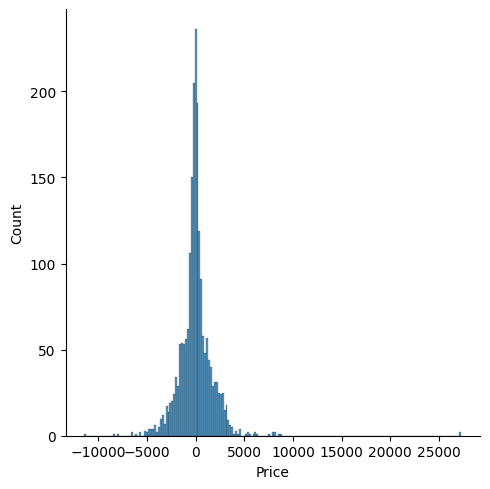

In [204]:
sns.displot(y_test-y_pred)
plt.show()

### Optimizing XGBoost Regressor

In [221]:
from xgboost import XGBRegressor
import optuna
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


def objective_xgb(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    params = {
        'objective' : trial.suggest_categorical('objective', ['reg:squarederror']),
        'booster' : trial.suggest_categorical('booster', ['gbtree']),
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
        'gamma' : trial.suggest_loguniform('gamma', 1e-8, 1),
        'subsample' : trial.suggest_float('subsample', 0.3, 0.9),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0.01, 1.0),
        'seed' : trial.suggest_categorical('seed', [42])
    }

    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae


study_xgb = optuna.create_study(direction='minimize')xx
study_xgb.optimize(objective_xgb, n_trials=100, show_progress_bar=True)


IPython.display.display('-'*50)
IPython.display.display('Best Parameters for XGBoost: ', study_xgb.best_params)


[I 2024-04-04 13:22:28,866] A new study created in memory with name: no-name-9d139d98-9683-4fcf-bdb8-572a98d208f9
Best trial: 0. Best value: 1113.38:   2%|▏         | 1/50 [00:00<00:47,  1.04it/s]

[I 2024-04-04 13:22:29,830] Trial 0 finished with value: 1113.3754769082395 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.016483142459871848, 'n_estimators': 733, 'min_child_weight': 1, 'gamma': 0.06115085069643974, 'subsample': 0.671872396893908, 'reg_alpha': 0.39426457128786974, 'reg_lambda': 0.22372629333614374, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:   4%|▍         | 2/50 [00:01<00:26,  1.82it/s]

[I 2024-04-04 13:22:30,088] Trial 1 finished with value: 1667.8202712072234 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 2, 'learning_rate': 0.034773946770490574, 'n_estimators': 221, 'min_child_weight': 3, 'gamma': 2.5910172614060536e-08, 'subsample': 0.6278856113656504, 'reg_alpha': 0.4920710745515807, 'reg_lambda': 0.38418356563212674, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:   6%|▌         | 3/50 [00:01<00:26,  1.79it/s]

[I 2024-04-04 13:22:30,658] Trial 2 finished with value: 1152.5497985635714 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.07405449870571106, 'n_estimators': 334, 'min_child_weight': 4, 'gamma': 0.5567036991052101, 'subsample': 0.7705375490296533, 'reg_alpha': 0.5841959928765995, 'reg_lambda': 0.1733725045208088, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:   8%|▊         | 4/50 [00:02<00:30,  1.52it/s]

[I 2024-04-04 13:22:31,468] Trial 3 finished with value: 1286.7233191507032 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 4, 'learning_rate': 0.01735991363310532, 'n_estimators': 921, 'min_child_weight': 9, 'gamma': 6.194030284378623e-06, 'subsample': 0.590302077847235, 'reg_alpha': 0.20437355586692393, 'reg_lambda': 0.38773805932585553, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:  10%|█         | 5/50 [00:03<00:34,  1.30it/s]

[I 2024-04-04 13:22:32,432] Trial 4 finished with value: 1419.7015920348333 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 4, 'learning_rate': 0.010555884093482888, 'n_estimators': 845, 'min_child_weight': 6, 'gamma': 3.3903004143450422e-06, 'subsample': 0.8257065814257913, 'reg_alpha': 0.37257455264400363, 'reg_lambda': 0.05727207790617094, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:  12%|█▏        | 6/50 [00:04<00:34,  1.29it/s]

[I 2024-04-04 13:22:33,213] Trial 5 finished with value: 1288.137368527999 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 4, 'learning_rate': 0.029494489480577098, 'n_estimators': 692, 'min_child_weight': 10, 'gamma': 5.255316129891522e-07, 'subsample': 0.6851060956452564, 'reg_alpha': 0.09686799332878644, 'reg_lambda': 0.6941947653791521, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:  14%|█▍        | 7/50 [00:05<00:32,  1.32it/s]

[I 2024-04-04 13:22:33,939] Trial 6 finished with value: 1198.8051679659504 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 5, 'learning_rate': 0.03908091468397874, 'n_estimators': 659, 'min_child_weight': 7, 'gamma': 0.037242842462236365, 'subsample': 0.7446791011115235, 'reg_alpha': 0.9689234457155649, 'reg_lambda': 0.1830345531728377, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:  16%|█▌        | 8/50 [00:05<00:28,  1.48it/s]

[I 2024-04-04 13:22:34,434] Trial 7 finished with value: 1150.9886068097155 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.024198561209535136, 'n_estimators': 157, 'min_child_weight': 3, 'gamma': 9.647081788561386e-07, 'subsample': 0.7633629984285674, 'reg_alpha': 0.09294241812163095, 'reg_lambda': 0.7921441447319235, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:  18%|█▊        | 9/50 [00:06<00:36,  1.14it/s]

[I 2024-04-04 13:22:35,763] Trial 8 finished with value: 1125.8111337223409 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.010305079503616841, 'n_estimators': 872, 'min_child_weight': 1, 'gamma': 0.0005255616511709668, 'subsample': 0.3738474302014846, 'reg_alpha': 0.6321317836887677, 'reg_lambda': 0.18993649652465855, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 0. Best value: 1113.38:  20%|██        | 10/50 [00:07<00:28,  1.41it/s]

[I 2024-04-04 13:22:36,099] Trial 9 finished with value: 1239.0232663799345 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.0309231843558284, 'n_estimators': 226, 'min_child_weight': 9, 'gamma': 0.8395684859297888, 'subsample': 0.8404540248253916, 'reg_alpha': 0.7714094447356693, 'reg_lambda': 0.6795234893004486, 'seed': 42}. Best is trial 0 with value: 1113.3754769082395.


Best trial: 10. Best value: 1109.07:  22%|██▏       | 11/50 [00:09<00:41,  1.05s/it]

[I 2024-04-04 13:22:37,929] Trial 10 finished with value: 1109.073799639983 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 10, 'learning_rate': 0.016089819509579165, 'n_estimators': 455, 'min_child_weight': 2, 'gamma': 0.001995383908206355, 'subsample': 0.47403543769013934, 'reg_alpha': 0.364514550057973, 'reg_lambda': 0.969248185750594, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  24%|██▍       | 12/50 [00:10<00:45,  1.20s/it]

[I 2024-04-04 13:22:39,470] Trial 11 finished with value: 1121.2545091362017 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 10, 'learning_rate': 0.015464420696306458, 'n_estimators': 424, 'min_child_weight': 1, 'gamma': 0.00286470287875207, 'subsample': 0.48557037458608837, 'reg_alpha': 0.2977045142921281, 'reg_lambda': 0.9523874436901791, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  26%|██▌       | 13/50 [00:10<00:34,  1.06it/s]

[I 2024-04-04 13:22:39,807] Trial 12 finished with value: 2009.6057603656534 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 1, 'learning_rate': 0.017380045021186157, 'n_estimators': 526, 'min_child_weight': 1, 'gamma': 0.017201857993912755, 'subsample': 0.4850418406552086, 'reg_alpha': 0.39490366510752606, 'reg_lambda': 0.47958432236357146, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  28%|██▊       | 14/50 [00:12<00:41,  1.15s/it]

[I 2024-04-04 13:22:41,445] Trial 13 finished with value: 1233.9918047836165 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.058407533655804256, 'n_estimators': 706, 'min_child_weight': 3, 'gamma': 8.780822364486602e-05, 'subsample': 0.30335348747908636, 'reg_alpha': 0.25101355073128373, 'reg_lambda': 0.9073833841159489, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  30%|███       | 15/50 [00:14<00:44,  1.28s/it]

[I 2024-04-04 13:22:43,015] Trial 14 finished with value: 1143.099754424626 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 10, 'learning_rate': 0.014139923718770474, 'n_estimators': 532, 'min_child_weight': 5, 'gamma': 0.03356883160356683, 'subsample': 0.5180344121661842, 'reg_alpha': 0.47975220959092896, 'reg_lambda': 0.6024057641385027, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  32%|███▏      | 16/50 [00:14<00:38,  1.13s/it]

[I 2024-04-04 13:22:43,802] Trial 15 finished with value: 1133.005109456186 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.02292123956048977, 'n_estimators': 389, 'min_child_weight': 2, 'gamma': 0.00012166239439971387, 'subsample': 0.5618905119228697, 'reg_alpha': 0.7422627543579927, 'reg_lambda': 0.36921825449234097, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  34%|███▍      | 17/50 [00:16<00:39,  1.19s/it]

[I 2024-04-04 13:22:45,137] Trial 16 finished with value: 1207.1323150036953 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.04613310017666365, 'n_estimators': 801, 'min_child_weight': 2, 'gamma': 0.002925496275346726, 'subsample': 0.4341109216689015, 'reg_alpha': 0.4064453279304365, 'reg_lambda': 0.039649293338674285, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  36%|███▌      | 18/50 [00:16<00:30,  1.04it/s]

[I 2024-04-04 13:22:45,549] Trial 17 finished with value: 1650.1033854477723 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 2, 'learning_rate': 0.02063093887208942, 'n_estimators': 573, 'min_child_weight': 5, 'gamma': 0.13087043956931355, 'subsample': 0.6716091726761945, 'reg_alpha': 0.1910405981336696, 'reg_lambda': 0.28076591439294585, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 10. Best value: 1109.07:  38%|███▊      | 19/50 [00:17<00:31,  1.01s/it]

[I 2024-04-04 13:22:46,690] Trial 18 finished with value: 1193.355298621428 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.012944428609107203, 'n_estimators': 967, 'min_child_weight': 7, 'gamma': 0.003594972702200909, 'subsample': 0.40667558935523274, 'reg_alpha': 0.6180385855034137, 'reg_lambda': 0.526463018261544, 'seed': 42}. Best is trial 10 with value: 1109.073799639983.


Best trial: 19. Best value: 1108.62:  40%|████      | 20/50 [00:19<00:39,  1.31s/it]

[I 2024-04-04 13:22:48,696] Trial 19 finished with value: 1108.6240686962494 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.020649887082385462, 'n_estimators': 757, 'min_child_weight': 2, 'gamma': 0.0002446067749314292, 'subsample': 0.6512537495158203, 'reg_alpha': 0.3399086440494398, 'reg_lambda': 0.8009099004741286, 'seed': 42}. Best is trial 19 with value: 1108.6240686962494.


Best trial: 19. Best value: 1108.62:  42%|████▏     | 21/50 [00:21<00:40,  1.40s/it]

[I 2024-04-04 13:22:50,321] Trial 20 finished with value: 1129.591137648654 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.026107180527901095, 'n_estimators': 624, 'min_child_weight': 4, 'gamma': 4.077046259853089e-05, 'subsample': 0.5640194098811142, 'reg_alpha': 0.2825929387083677, 'reg_lambda': 0.8600611420003709, 'seed': 42}. Best is trial 19 with value: 1108.6240686962494.


Best trial: 21. Best value: 1095.76:  44%|████▍     | 22/50 [00:23<00:41,  1.47s/it]

[I 2024-04-04 13:22:51,959] Trial 21 finished with value: 1095.75927641058 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.019829450388487366, 'n_estimators': 784, 'min_child_weight': 2, 'gamma': 0.0008230474586146274, 'subsample': 0.6362175455449727, 'reg_alpha': 0.3448975822181775, 'reg_lambda': 0.9896571750361404, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 21. Best value: 1095.76:  46%|████▌     | 23/50 [00:24<00:42,  1.56s/it]

[I 2024-04-04 13:22:53,723] Trial 22 finished with value: 1144.066705739276 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.012509180442475412, 'n_estimators': 793, 'min_child_weight': 2, 'gamma': 0.0006390952921575992, 'subsample': 0.6335240615659483, 'reg_alpha': 0.32398571771907725, 'reg_lambda': 0.9860198540813429, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 21. Best value: 1095.76:  48%|████▊     | 24/50 [00:26<00:37,  1.46s/it]

[I 2024-04-04 13:22:54,935] Trial 23 finished with value: 1123.8655167172756 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 10, 'learning_rate': 0.019339685855096243, 'n_estimators': 473, 'min_child_weight': 4, 'gamma': 0.00046797969162873924, 'subsample': 0.5297901764728349, 'reg_alpha': 0.17403672232836917, 'reg_lambda': 0.8143851050601608, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 21. Best value: 1095.76:  50%|█████     | 25/50 [00:28<00:42,  1.70s/it]

[I 2024-04-04 13:22:57,204] Trial 24 finished with value: 1146.2333584861556 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.020839604404920203, 'n_estimators': 1000, 'min_child_weight': 2, 'gamma': 2.176849437396317e-05, 'subsample': 0.7139742903864834, 'reg_alpha': 0.03381626084439099, 'reg_lambda': 0.7471550952532531, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 21. Best value: 1095.76:  52%|█████▏    | 26/50 [00:30<00:45,  1.91s/it]

[I 2024-04-04 13:22:59,600] Trial 25 finished with value: 1126.9911023398306 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.023965214972695388, 'n_estimators': 763, 'min_child_weight': 3, 'gamma': 0.005500509676438962, 'subsample': 0.6257094583999445, 'reg_alpha': 0.5447213688178949, 'reg_lambda': 0.994356609462742, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 21. Best value: 1095.76:  54%|█████▍    | 27/50 [00:32<00:41,  1.82s/it]

[I 2024-04-04 13:23:01,212] Trial 26 finished with value: 1220.1435340411117 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.0890771781287867, 'n_estimators': 591, 'min_child_weight': 2, 'gamma': 0.00017821869403762263, 'subsample': 0.8821924412457892, 'reg_alpha': 0.4868069348154052, 'reg_lambda': 0.8722187311746235, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 21. Best value: 1095.76:  56%|█████▌    | 28/50 [00:33<00:34,  1.55s/it]

[I 2024-04-04 13:23:02,135] Trial 27 finished with value: 1161.1239480840152 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 10, 'learning_rate': 0.012334014971005319, 'n_estimators': 309, 'min_child_weight': 4, 'gamma': 0.0007037066145955538, 'subsample': 0.45514851625096775, 'reg_alpha': 0.686574534144792, 'reg_lambda': 0.9253371831174189, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 21. Best value: 1095.76:  58%|█████▊    | 29/50 [00:34<00:30,  1.44s/it]

[I 2024-04-04 13:23:03,319] Trial 28 finished with value: 1167.585309476529 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.041750342430206235, 'n_estimators': 476, 'min_child_weight': 3, 'gamma': 1.1682677574428505e-05, 'subsample': 0.3435776087942032, 'reg_alpha': 0.44931410450078413, 'reg_lambda': 0.8067427406404891, 'seed': 42}. Best is trial 21 with value: 1095.75927641058.


Best trial: 29. Best value: 1086.89:  60%|██████    | 30/50 [00:35<00:28,  1.43s/it]

[I 2024-04-04 13:23:04,708] Trial 29 finished with value: 1086.8856309652897 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.015539588946679601, 'n_estimators': 739, 'min_child_weight': 1, 'gamma': 0.008391327181952152, 'subsample': 0.6694965882954814, 'reg_alpha': 0.33534702535086264, 'reg_lambda': 0.7146917648486985, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  62%|██████▏   | 31/50 [00:36<00:24,  1.29s/it]

[I 2024-04-04 13:23:05,674] Trial 30 finished with value: 1149.2438785208508 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 5, 'learning_rate': 0.026938686295464892, 'n_estimators': 870, 'min_child_weight': 1, 'gamma': 0.12090745072229109, 'subsample': 0.6729287241487083, 'reg_alpha': 0.23659286906274857, 'reg_lambda': 0.6348296074128699, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  64%|██████▍   | 32/50 [00:38<00:25,  1.41s/it]

[I 2024-04-04 13:23:07,386] Trial 31 finished with value: 1146.294764810809 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.017121322845202742, 'n_estimators': 740, 'min_child_weight': 1, 'gamma': 0.012239335509621764, 'subsample': 0.704693970152582, 'reg_alpha': 0.3465870948334294, 'reg_lambda': 0.7438551125711705, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  66%|██████▌   | 33/50 [00:40<00:25,  1.49s/it]

[I 2024-04-04 13:23:09,037] Trial 32 finished with value: 1112.7156539749312 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.01469169715938656, 'n_estimators': 639, 'min_child_weight': 2, 'gamma': 0.0016190291268988546, 'subsample': 0.646763854625182, 'reg_alpha': 0.34036183342445314, 'reg_lambda': 0.87200546566009, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  68%|██████▊   | 34/50 [00:41<00:22,  1.38s/it]

[I 2024-04-04 13:23:10,165] Trial 33 finished with value: 1122.110537263348 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.01943845802948651, 'n_estimators': 727, 'min_child_weight': 3, 'gamma': 0.01056422799352041, 'subsample': 0.6020471224102709, 'reg_alpha': 0.43651306758267333, 'reg_lambda': 0.9349551725826581, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  70%|███████   | 35/50 [00:42<00:20,  1.37s/it]

[I 2024-04-04 13:23:11,507] Trial 34 finished with value: 1153.4252591996574 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.016904111031952482, 'n_estimators': 925, 'min_child_weight': 1, 'gamma': 0.00023779136709586767, 'subsample': 0.5897294617195851, 'reg_alpha': 0.14941099524589715, 'reg_lambda': 0.7553461410682549, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  72%|███████▏  | 36/50 [00:44<00:21,  1.51s/it]

[I 2024-04-04 13:23:13,329] Trial 35 finished with value: 1101.7293411305916 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.01127323648070335, 'n_estimators': 825, 'min_child_weight': 2, 'gamma': 2.4430137284556915e-08, 'subsample': 0.7205008902112184, 'reg_alpha': 0.5544585980121105, 'reg_lambda': 0.8361146528671113, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  74%|███████▍  | 37/50 [00:46<00:20,  1.59s/it]

[I 2024-04-04 13:23:15,111] Trial 36 finished with value: 1136.6866861590345 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.011790181824299452, 'n_estimators': 834, 'min_child_weight': 3, 'gamma': 1.605871168945044e-08, 'subsample': 0.7978375724061101, 'reg_alpha': 0.5754618308953625, 'reg_lambda': 0.5673612359075896, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  76%|███████▌  | 38/50 [00:47<00:17,  1.46s/it]

[I 2024-04-04 13:23:16,275] Trial 37 finished with value: 1118.9575200561583 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.034754328464988424, 'n_estimators': 890, 'min_child_weight': 4, 'gamma': 6.989127676168919e-08, 'subsample': 0.7248016728050608, 'reg_alpha': 0.5509360700067077, 'reg_lambda': 0.6901165290479083, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  78%|███████▊  | 39/50 [00:49<00:17,  1.56s/it]

[I 2024-04-04 13:23:18,061] Trial 38 finished with value: 1148.357770472352 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.011294533462235766, 'n_estimators': 795, 'min_child_weight': 1, 'gamma': 7.285004029339394e-08, 'subsample': 0.7889902214965483, 'reg_alpha': 0.9994102682211905, 'reg_lambda': 0.8389606583435408, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  80%|████████  | 40/50 [00:50<00:13,  1.40s/it]

[I 2024-04-04 13:23:19,076] Trial 39 finished with value: 1241.8886551362616 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 5, 'learning_rate': 0.014160018582010886, 'n_estimators': 663, 'min_child_weight': 2, 'gamma': 8.753167674895116e-07, 'subsample': 0.7558019500665001, 'reg_alpha': 0.86964066744206, 'reg_lambda': 0.8935812944337984, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  82%|████████▏ | 41/50 [00:51<00:12,  1.40s/it]

[I 2024-04-04 13:23:20,493] Trial 40 finished with value: 1161.9406915000336 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.010041756861166007, 'n_estimators': 921, 'min_child_weight': 6, 'gamma': 1.852795304519338e-06, 'subsample': 0.6541393384650633, 'reg_alpha': 0.5286121700503369, 'reg_lambda': 0.6495094133033341, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  84%|████████▍ | 42/50 [00:53<00:12,  1.51s/it]

[I 2024-04-04 13:23:22,265] Trial 41 finished with value: 1095.422940388628 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.015663817210700526, 'n_estimators': 688, 'min_child_weight': 2, 'gamma': 0.0011751149693968587, 'subsample': 0.6139546635624609, 'reg_alpha': 0.4057287583597151, 'reg_lambda': 0.9953711101070171, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  86%|████████▌ | 43/50 [00:55<00:12,  1.79s/it]

[I 2024-04-04 13:23:24,716] Trial 42 finished with value: 1119.9967927527211 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.019035394319629504, 'n_estimators': 698, 'min_child_weight': 1, 'gamma': 2.297357598622204e-07, 'subsample': 0.6870003448105663, 'reg_alpha': 0.26702598167509567, 'reg_lambda': 0.7563776505075757, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 29. Best value: 1086.89:  88%|████████▊ | 44/50 [00:57<00:10,  1.73s/it]

[I 2024-04-04 13:23:26,283] Trial 43 finished with value: 1177.2897883313613 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.013391617635698334, 'n_estimators': 757, 'min_child_weight': 2, 'gamma': 5.2532606028003054e-05, 'subsample': 0.6080138502084933, 'reg_alpha': 0.4264139270597625, 'reg_lambda': 0.9323884771635235, 'seed': 42}. Best is trial 29 with value: 1086.8856309652897.


Best trial: 44. Best value: 1081.75:  90%|█████████ | 45/50 [00:59<00:09,  1.84s/it]

[I 2024-04-04 13:23:28,393] Trial 44 finished with value: 1081.74800849838 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.015243171336347457, 'n_estimators': 835, 'min_child_weight': 3, 'gamma': 0.001355793585310468, 'subsample': 0.7358132220092057, 'reg_alpha': 0.4939212328254001, 'reg_lambda': 0.7925511071183527, 'seed': 42}. Best is trial 44 with value: 1081.74800849838.


Best trial: 44. Best value: 1081.75:  92%|█████████▏| 46/50 [01:01<00:08,  2.03s/it]

[I 2024-04-04 13:23:30,858] Trial 45 finished with value: 1127.683297410173 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.01110198826218224, 'n_estimators': 842, 'min_child_weight': 3, 'gamma': 0.0012434030271544496, 'subsample': 0.7254903263586185, 'reg_alpha': 0.5080133754568974, 'reg_lambda': 0.992166246848811, 'seed': 42}. Best is trial 44 with value: 1081.74800849838.


Best trial: 44. Best value: 1081.75:  94%|█████████▍| 47/50 [01:03<00:06,  2.00s/it]

[I 2024-04-04 13:23:32,810] Trial 46 finished with value: 1150.5367029794254 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 9, 'learning_rate': 0.015584096546231125, 'n_estimators': 674, 'min_child_weight': 1, 'gamma': 0.081818713079393, 'subsample': 0.7446282282109877, 'reg_alpha': 0.6457597173635904, 'reg_lambda': 0.7039724474217597, 'seed': 42}. Best is trial 44 with value: 1081.74800849838.


Best trial: 44. Best value: 1081.75:  96%|█████████▌| 48/50 [01:05<00:03,  1.88s/it]

[I 2024-04-04 13:23:34,391] Trial 47 finished with value: 1117.1517560861353 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.013598192558150346, 'n_estimators': 819, 'min_child_weight': 3, 'gamma': 0.28658522766833966, 'subsample': 0.8337261689226225, 'reg_alpha': 0.38062178133516406, 'reg_lambda': 0.8375176345290666, 'seed': 42}. Best is trial 44 with value: 1081.74800849838.


Best trial: 44. Best value: 1081.75:  98%|█████████▊| 49/50 [01:06<00:01,  1.46s/it]

[I 2024-04-04 13:23:34,880] Trial 48 finished with value: 1570.118635371719 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 3, 'learning_rate': 0.01550224722514835, 'n_estimators': 612, 'min_child_weight': 9, 'gamma': 0.00831322666990148, 'subsample': 0.7822160456680615, 'reg_alpha': 0.4555912279866219, 'reg_lambda': 0.893276249685586, 'seed': 42}. Best is trial 44 with value: 1081.74800849838.


Best trial: 44. Best value: 1081.75: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it]

[I 2024-04-04 13:23:38,295] Trial 49 finished with value: 1204.4672743081478 and parameters: {'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 10, 'learning_rate': 0.017596831832833768, 'n_estimators': 880, 'min_child_weight': 1, 'gamma': 0.017832180267799355, 'subsample': 0.57110754893533, 'reg_alpha': 0.592666045355915, 'reg_lambda': 0.4393171763368985, 'seed': 42}. Best is trial 44 with value: 1081.74800849838.


'--------------------------------------------------'

'Best Parameters for XGBoost: '

{'objective': 'reg:squarederror',
 'booster': 'gbtree',
 'max_depth': 9,
 'learning_rate': 0.015243171336347457,
 'n_estimators': 835,
 'min_child_weight': 3,
 'gamma': 0.001355793585310468,
 'subsample': 0.7358132220092057,
 'reg_alpha': 0.4939212328254001,
 'reg_lambda': 0.7925511071183527,
 'seed': 42}

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns), y, test_size=0.2, random_state=7)
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

IPython.display.display('-'*50)
IPython.display.display('Mean Squared Error: ', mse)
IPython.display.display('Mean Absolute Error: ', mae)
IPython.display.display('Cross Validation Score Train', cross_val_score(xgb, X_train, y_train))
IPython.display.display('Train Score', xgb.score(X_train, y_train))
IPython.display.display('Cross Validation Score Test', cross_val_score(xgb, X_test, y_test, cv=4))
IPython.display.display('Test Score', xgb.score(X_test, y_test))
IPython.display.display('-'*50)

'--------------------------------------------------'

'Mean Squared Error: '

3677819.858762855

'Mean Absolute Error: '

1126.7515236334657

'Cross Validation Score Train'

array([0.82406678, 0.83266171, 0.78119001, 0.80000691, 0.84010287])

'Train Score'

0.9470232975083865

'Cross Validation Score Test'

array([0.70592681, 0.75417426, 0.81485652, 0.74521985])

'Test Score'

0.8451395608986939

'--------------------------------------------------'

### Optimising Extra Tree Regressor

In [223]:
from sklearn.ensemble import ExtraTreesRegressor
import optuna
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


def objective_extratree(trial):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    params = {
        'criterion' : trial.suggest_categorical('criterion', ['squared_error']),
        'max_depth' : trial.suggest_int('max_depth', 2, 10),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 10),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'ccp_alpha' : trial.suggest_int('ccp_alpha', 0, 10)
    }

    model_extratree = ExtraTreesRegressor(**params)
    model_extratree.fit(X_train, y_train)
    y_pred = model_extratree.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae


study_extratree = optuna.create_study(direction='minimize')
study_extratree.optimize(objective_extratree, n_trials=100, show_progress_bar=True)


IPython.display.display('-'*50)
IPython.display.display('Best Parameters for ExtraTree: ', study_extratree.best_params)

[I 2024-04-04 13:31:14,051] A new study created in memory with name: no-name-8e569442-760b-4075-9f56-61658e02b45e
Best trial: 0. Best value: 1835.37:   1%|          | 1/100 [00:01<01:47,  1.08s/it]

[I 2024-04-04 13:31:15,135] Trial 0 finished with value: 1835.3736091394546 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 2, 'n_estimators': 335, 'max_features': 'sqrt', 'ccp_alpha': 4}. Best is trial 0 with value: 1835.3736091394546.


Best trial: 1. Best value: 1718.5:   2%|▏         | 2/100 [00:02<01:45,  1.08s/it] 

[I 2024-04-04 13:31:16,207] Trial 1 finished with value: 1718.4994408545447 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 4, 'n_estimators': 336, 'max_features': 'sqrt', 'ccp_alpha': 6}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:   3%|▎         | 3/100 [00:03<02:09,  1.33s/it]

[I 2024-04-04 13:31:17,842] Trial 2 finished with value: 2496.3411084997915 and parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 5, 'n_estimators': 992, 'max_features': 'sqrt', 'ccp_alpha': 0}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:   4%|▍         | 4/100 [00:04<01:37,  1.01s/it]

[I 2024-04-04 13:31:18,370] Trial 3 finished with value: 2586.48517938404 and parameters: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 9, 'n_estimators': 416, 'max_features': 'sqrt', 'ccp_alpha': 5}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:   5%|▌         | 5/100 [00:04<01:13,  1.29it/s]

[I 2024-04-04 13:31:18,724] Trial 4 finished with value: 1897.285550481392 and parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 7, 'n_estimators': 152, 'max_features': 'sqrt', 'ccp_alpha': 5}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:   6%|▌         | 6/100 [00:05<01:16,  1.22it/s]

[I 2024-04-04 13:31:19,621] Trial 5 finished with value: 1775.402105595592 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 5, 'n_estimators': 315, 'max_features': 'sqrt', 'ccp_alpha': 1}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:   7%|▋         | 7/100 [00:06<01:21,  1.14it/s]

[I 2024-04-04 13:31:20,610] Trial 6 finished with value: 2137.4044153011046 and parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 9, 'n_estimators': 408, 'max_features': 'log2', 'ccp_alpha': 4}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:   8%|▊         | 8/100 [00:07<01:31,  1.00it/s]

[I 2024-04-04 13:31:21,876] Trial 7 finished with value: 1982.12919003038 and parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 1, 'n_estimators': 524, 'max_features': 'sqrt', 'ccp_alpha': 3}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:   9%|▉         | 9/100 [00:08<01:22,  1.10it/s]

[I 2024-04-04 13:31:22,593] Trial 8 finished with value: 2734.734469103988 and parameters: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 4, 'n_estimators': 588, 'max_features': 'log2', 'ccp_alpha': 2}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 1. Best value: 1718.5:  10%|█         | 10/100 [00:10<01:47,  1.20s/it]

[I 2024-04-04 13:31:24,427] Trial 9 finished with value: 2269.3882836761977 and parameters: {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 9, 'n_estimators': 946, 'max_features': 'sqrt', 'ccp_alpha': 2}. Best is trial 1 with value: 1718.4994408545447.


Best trial: 10. Best value: 1580.12:  11%|█         | 11/100 [00:13<02:27,  1.65s/it]

[I 2024-04-04 13:31:27,123] Trial 10 finished with value: 1580.1227633996523 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3, 'n_estimators': 744, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  12%|█▏        | 12/100 [00:15<02:51,  1.95s/it]

[I 2024-04-04 13:31:29,733] Trial 11 finished with value: 1615.0594146007213 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'n_estimators': 764, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  13%|█▎        | 13/100 [00:18<03:09,  2.18s/it]

[I 2024-04-04 13:31:32,449] Trial 12 finished with value: 1695.7515039666837 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'n_estimators': 779, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  14%|█▍        | 14/100 [00:21<03:19,  2.32s/it]

[I 2024-04-04 13:31:35,086] Trial 13 finished with value: 1636.5249265047241 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'n_estimators': 772, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  15%|█▌        | 15/100 [00:23<03:14,  2.28s/it]

[I 2024-04-04 13:31:37,295] Trial 14 finished with value: 1762.9211495069455 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7, 'n_estimators': 753, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  16%|█▌        | 16/100 [00:25<03:11,  2.28s/it]

[I 2024-04-04 13:31:39,561] Trial 15 finished with value: 1740.7065879300008 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3, 'n_estimators': 674, 'max_features': 'log2', 'ccp_alpha': 7}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  17%|█▋        | 17/100 [00:27<03:09,  2.28s/it]

[I 2024-04-04 13:31:41,839] Trial 16 finished with value: 1900.2480122441607 and parameters: {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 3, 'n_estimators': 882, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  18%|█▊        | 18/100 [00:29<03:01,  2.21s/it]

[I 2024-04-04 13:31:43,891] Trial 17 finished with value: 1706.3279158077376 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 7, 'n_estimators': 632, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  19%|█▉        | 19/100 [00:32<03:09,  2.34s/it]

[I 2024-04-04 13:31:46,533] Trial 18 finished with value: 1659.3514885462691 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_estimators': 856, 'max_features': 'log2', 'ccp_alpha': 7}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  20%|██        | 20/100 [00:33<02:43,  2.05s/it]

[I 2024-04-04 13:31:47,899] Trial 19 finished with value: 1806.6937256931285 and parameters: {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 6, 'n_estimators': 516, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  21%|██        | 21/100 [00:36<02:51,  2.17s/it]

[I 2024-04-04 13:31:50,351] Trial 20 finished with value: 1690.2420660605876 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4, 'n_estimators': 719, 'max_features': 'log2', 'ccp_alpha': 7}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  22%|██▏       | 22/100 [00:39<03:06,  2.39s/it]

[I 2024-04-04 13:31:53,253] Trial 21 finished with value: 1645.4926740791313 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'n_estimators': 819, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  23%|██▎       | 23/100 [00:41<02:59,  2.33s/it]

[I 2024-04-04 13:31:55,451] Trial 22 finished with value: 1683.888726911064 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 2, 'n_estimators': 691, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  24%|██▍       | 24/100 [00:44<03:16,  2.58s/it]

[I 2024-04-04 13:31:58,627] Trial 23 finished with value: 1651.431359831732 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_estimators': 888, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  25%|██▌       | 25/100 [00:47<03:14,  2.60s/it]

[I 2024-04-04 13:32:01,249] Trial 24 finished with value: 1732.637967084753 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2, 'n_estimators': 772, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  26%|██▌       | 26/100 [00:48<02:52,  2.33s/it]

[I 2024-04-04 13:32:02,960] Trial 25 finished with value: 1864.00878982953 and parameters: {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 3, 'n_estimators': 632, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  27%|██▋       | 27/100 [00:51<02:50,  2.34s/it]

[I 2024-04-04 13:32:05,330] Trial 26 finished with value: 1743.8854270102895 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 1, 'n_estimators': 824, 'max_features': 'log2', 'ccp_alpha': 6}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  28%|██▊       | 28/100 [00:54<03:04,  2.56s/it]

[I 2024-04-04 13:32:08,411] Trial 27 finished with value: 1593.8566625608003 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'n_estimators': 927, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  29%|██▉       | 29/100 [00:57<03:09,  2.67s/it]

[I 2024-04-04 13:32:11,342] Trial 28 finished with value: 1687.36572413877 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 5, 'n_estimators': 939, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  30%|███       | 30/100 [01:00<03:10,  2.73s/it]

[I 2024-04-04 13:32:14,192] Trial 29 finished with value: 1804.7786100870132 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 4, 'n_estimators': 990, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  31%|███       | 31/100 [01:02<03:08,  2.73s/it]

[I 2024-04-04 13:32:16,914] Trial 30 finished with value: 1777.8302865058151 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 3, 'n_estimators': 917, 'max_features': 'log2', 'ccp_alpha': 6}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  32%|███▏      | 32/100 [01:05<03:09,  2.78s/it]

[I 2024-04-04 13:32:19,831] Trial 31 finished with value: 1593.601808129177 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2, 'n_estimators': 837, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  33%|███▎      | 33/100 [01:08<03:06,  2.79s/it]

[I 2024-04-04 13:32:22,623] Trial 32 finished with value: 1635.1637602842939 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 4, 'n_estimators': 825, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  34%|███▍      | 34/100 [01:11<03:10,  2.89s/it]

[I 2024-04-04 13:32:25,745] Trial 33 finished with value: 1719.019586086682 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2, 'n_estimators': 994, 'max_features': 'log2', 'ccp_alpha': 7}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  35%|███▌      | 35/100 [01:14<03:00,  2.78s/it]

[I 2024-04-04 13:32:28,270] Trial 34 finished with value: 1606.6228239542738 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'n_estimators': 728, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  36%|███▌      | 36/100 [01:16<02:47,  2.61s/it]

[I 2024-04-04 13:32:30,499] Trial 35 finished with value: 1708.105145441139 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 2, 'n_estimators': 702, 'max_features': 'sqrt', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  37%|███▋      | 37/100 [01:19<02:49,  2.69s/it]

[I 2024-04-04 13:32:33,349] Trial 36 finished with value: 1656.113396917434 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 6, 'n_estimators': 863, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  38%|███▊      | 38/100 [01:21<02:31,  2.44s/it]

[I 2024-04-04 13:32:35,207] Trial 37 finished with value: 1764.169051406395 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 10, 'n_estimators': 637, 'max_features': 'sqrt', 'ccp_alpha': 6}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  39%|███▉      | 39/100 [01:22<02:02,  2.00s/it]

[I 2024-04-04 13:32:36,191] Trial 38 finished with value: 2056.638635469514 and parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 5, 'n_estimators': 470, 'max_features': 'log2', 'ccp_alpha': 5}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  40%|████      | 40/100 [01:24<02:06,  2.11s/it]

[I 2024-04-04 13:32:38,572] Trial 39 finished with value: 1874.757750594719 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 4, 'n_estimators': 818, 'max_features': 'sqrt', 'ccp_alpha': 0}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  41%|████      | 41/100 [01:26<01:53,  1.93s/it]

[I 2024-04-04 13:32:40,074] Trial 40 finished with value: 2426.4468054835593 and parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 3, 'n_estimators': 941, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  42%|████▏     | 42/100 [01:26<01:28,  1.52s/it]

[I 2024-04-04 13:32:40,641] Trial 41 finished with value: 1665.248976041936 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'n_estimators': 160, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  43%|████▎     | 43/100 [01:29<01:42,  1.79s/it]

[I 2024-04-04 13:32:43,056] Trial 42 finished with value: 1600.3055145847613 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3, 'n_estimators': 730, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  44%|████▍     | 44/100 [01:31<01:53,  2.02s/it]

[I 2024-04-04 13:32:45,622] Trial 43 finished with value: 1602.7611354301523 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3, 'n_estimators': 727, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  45%|████▌     | 45/100 [01:33<01:53,  2.06s/it]

[I 2024-04-04 13:32:47,764] Trial 44 finished with value: 1684.1150214113254 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 5, 'n_estimators': 662, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  46%|████▌     | 46/100 [01:35<01:48,  2.01s/it]

[I 2024-04-04 13:32:49,667] Trial 45 finished with value: 1745.41415914084 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 4, 'n_estimators': 581, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  47%|████▋     | 47/100 [01:38<01:54,  2.16s/it]

[I 2024-04-04 13:32:52,190] Trial 46 finished with value: 1725.1182165491462 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 3, 'n_estimators': 794, 'max_features': 'sqrt', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  48%|████▊     | 48/100 [01:40<01:58,  2.29s/it]

[I 2024-04-04 13:32:54,755] Trial 47 finished with value: 1623.4343346519747 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3, 'n_estimators': 730, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  49%|████▉     | 49/100 [01:42<01:49,  2.15s/it]

[I 2024-04-04 13:32:56,597] Trial 48 finished with value: 2092.7001270839255 and parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 3, 'n_estimators': 910, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  50%|█████     | 50/100 [01:45<01:58,  2.36s/it]

[I 2024-04-04 13:32:59,452] Trial 49 finished with value: 1619.0968497268902 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 4, 'n_estimators': 854, 'max_features': 'log2', 'ccp_alpha': 4}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  51%|█████     | 51/100 [01:47<01:49,  2.23s/it]

[I 2024-04-04 13:33:01,361] Trial 50 finished with value: 1704.065651507483 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 5, 'n_estimators': 588, 'max_features': 'sqrt', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  52%|█████▏    | 52/100 [01:49<01:50,  2.30s/it]

[I 2024-04-04 13:33:03,831] Trial 51 finished with value: 1637.8217815658513 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'n_estimators': 739, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  53%|█████▎    | 53/100 [01:52<01:54,  2.43s/it]

[I 2024-04-04 13:33:06,575] Trial 52 finished with value: 1624.7749554270106 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 2, 'n_estimators': 788, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  54%|█████▍    | 54/100 [01:54<01:49,  2.39s/it]

[I 2024-04-04 13:33:08,867] Trial 53 finished with value: 1607.2645764342103 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'n_estimators': 677, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  55%|█████▌    | 55/100 [01:57<01:48,  2.41s/it]

[I 2024-04-04 13:33:11,301] Trial 54 finished with value: 1704.6721901149876 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2, 'n_estimators': 736, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  56%|█████▌    | 56/100 [01:58<01:28,  2.00s/it]

[I 2024-04-04 13:33:12,366] Trial 55 finished with value: 1666.1064504222404 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3, 'n_estimators': 302, 'max_features': 'log2', 'ccp_alpha': 7}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  57%|█████▋    | 57/100 [02:00<01:24,  1.97s/it]

[I 2024-04-04 13:33:14,280] Trial 56 finished with value: 1585.0663680126117 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 3, 'n_estimators': 554, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  58%|█████▊    | 58/100 [02:01<01:15,  1.79s/it]

[I 2024-04-04 13:33:15,644] Trial 57 finished with value: 1822.9210170640517 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 4, 'n_estimators': 445, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  59%|█████▉    | 59/100 [02:03<01:12,  1.77s/it]

[I 2024-04-04 13:33:17,381] Trial 58 finished with value: 1628.8290080287231 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'n_estimators': 484, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  60%|██████    | 60/100 [02:04<01:01,  1.55s/it]

[I 2024-04-04 13:33:18,391] Trial 59 finished with value: 2276.9080183298556 and parameters: {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 8, 'n_estimators': 549, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  61%|██████    | 61/100 [02:05<00:56,  1.44s/it]

[I 2024-04-04 13:33:19,580] Trial 60 finished with value: 1742.39172033534 and parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 3, 'n_estimators': 398, 'max_features': 'log2', 'ccp_alpha': 3}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  62%|██████▏   | 62/100 [02:08<01:09,  1.83s/it]

[I 2024-04-04 13:33:22,304] Trial 61 finished with value: 1610.9165540760405 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'n_estimators': 768, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  63%|██████▎   | 63/100 [02:10<01:14,  2.00s/it]

[I 2024-04-04 13:33:24,728] Trial 62 finished with value: 1645.4572485920826 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 3, 'n_estimators': 709, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  64%|██████▍   | 64/100 [02:13<01:20,  2.22s/it]

[I 2024-04-04 13:33:27,467] Trial 63 finished with value: 1709.3989990288537 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 1, 'n_estimators': 888, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  65%|██████▌   | 65/100 [02:15<01:18,  2.25s/it]

[I 2024-04-04 13:33:29,762] Trial 64 finished with value: 1642.7945666122387 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'n_estimators': 655, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  66%|██████▌   | 66/100 [02:18<01:26,  2.55s/it]

[I 2024-04-04 13:33:33,010] Trial 65 finished with value: 1583.2805160661567 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 4, 'n_estimators': 971, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  67%|██████▋   | 67/100 [02:21<01:28,  2.68s/it]

[I 2024-04-04 13:33:36,014] Trial 66 finished with value: 1727.7759781498853 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 4, 'n_estimators': 966, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  68%|██████▊   | 68/100 [02:25<01:31,  2.86s/it]

[I 2024-04-04 13:33:39,277] Trial 67 finished with value: 1687.3863791897902 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'n_estimators': 963, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  69%|██████▉   | 69/100 [02:28<01:28,  2.86s/it]

[I 2024-04-04 13:33:42,147] Trial 68 finished with value: 1669.3700201042154 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 6, 'n_estimators': 912, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  70%|███████   | 70/100 [02:30<01:25,  2.85s/it]

[I 2024-04-04 13:33:44,972] Trial 69 finished with value: 1693.059810913565 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 5, 'n_estimators': 851, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  71%|███████   | 71/100 [02:32<01:11,  2.48s/it]

[I 2024-04-04 13:33:46,591] Trial 70 finished with value: 1849.1560180434606 and parameters: {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 3, 'n_estimators': 611, 'max_features': 'sqrt', 'ccp_alpha': 7}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  72%|███████▏  | 72/100 [02:35<01:10,  2.53s/it]

[I 2024-04-04 13:33:49,224] Trial 71 finished with value: 1673.2737887307082 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'n_estimators': 802, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 10. Best value: 1580.12:  73%|███████▎  | 73/100 [02:38<01:12,  2.68s/it]

[I 2024-04-04 13:33:52,272] Trial 72 finished with value: 1707.336675453716 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 4, 'n_estimators': 840, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 10 with value: 1580.1227633996523.


Best trial: 73. Best value: 1562.98:  74%|███████▍  | 74/100 [02:40<01:08,  2.63s/it]

[I 2024-04-04 13:33:54,771] Trial 73 finished with value: 1562.982988258934 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 2, 'n_estimators': 756, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  75%|███████▌  | 75/100 [02:43<01:05,  2.63s/it]

[I 2024-04-04 13:33:57,410] Trial 74 finished with value: 1655.4558746902462 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 2, 'n_estimators': 759, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  76%|███████▌  | 76/100 [02:45<00:58,  2.44s/it]

[I 2024-04-04 13:33:59,403] Trial 75 finished with value: 2024.7502596681948 and parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 3, 'n_estimators': 876, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  77%|███████▋  | 77/100 [02:47<00:54,  2.37s/it]

[I 2024-04-04 13:34:01,624] Trial 76 finished with value: 1761.9943910246047 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4, 'n_estimators': 698, 'max_features': 'log2', 'ccp_alpha': 5}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  78%|███████▊  | 78/100 [02:50<00:58,  2.64s/it]

[I 2024-04-04 13:34:04,887] Trial 77 finished with value: 1642.197989231155 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 1, 'n_estimators': 933, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  79%|███████▉  | 79/100 [02:53<00:58,  2.78s/it]

[I 2024-04-04 13:34:07,998] Trial 78 finished with value: 1754.4212562536316 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 3, 'n_estimators': 980, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  80%|████████  | 80/100 [02:56<00:57,  2.85s/it]

[I 2024-04-04 13:34:11,012] Trial 79 finished with value: 1703.3184014312058 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 4, 'n_estimators': 897, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  81%|████████  | 81/100 [02:59<00:54,  2.85s/it]

[I 2024-04-04 13:34:13,852] Trial 80 finished with value: 1620.7078477810269 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'n_estimators': 815, 'max_features': 'log2', 'ccp_alpha': 7}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  82%|████████▏ | 82/100 [03:02<00:49,  2.76s/it]

[I 2024-04-04 13:34:16,394] Trial 81 finished with value: 1620.858591529749 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 2, 'n_estimators': 753, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  83%|████████▎ | 83/100 [03:04<00:45,  2.69s/it]

[I 2024-04-04 13:34:18,928] Trial 82 finished with value: 1689.671271963624 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'n_estimators': 722, 'max_features': 'log2', 'ccp_alpha': 8}. Best is trial 73 with value: 1562.982988258934.


Best trial: 73. Best value: 1562.98:  84%|████████▍ | 84/100 [03:05<00:34,  2.16s/it]

[I 2024-04-04 13:34:19,850] Trial 83 finished with value: 2677.513384018134 and parameters: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 2, 'n_estimators': 687, 'max_features': 'log2', 'ccp_alpha': 10}. Best is trial 73 with value: 1562.982988258934.


Best trial: 84. Best value: 1558.77:  85%|████████▌ | 85/100 [03:08<00:35,  2.36s/it]

[I 2024-04-04 13:34:22,663] Trial 84 finished with value: 1558.773592894629 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 786, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  86%|████████▌ | 86/100 [03:11<00:34,  2.45s/it]

[I 2024-04-04 13:34:25,340] Trial 85 finished with value: 1623.3650700927187 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 1, 'n_estimators': 835, 'max_features': 'log2', 'ccp_alpha': 9}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  87%|████████▋ | 87/100 [03:14<00:33,  2.58s/it]

[I 2024-04-04 13:34:28,233] Trial 86 finished with value: 1591.4484347566522 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 790, 'max_features': 'sqrt', 'ccp_alpha': 10}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  88%|████████▊ | 88/100 [03:16<00:30,  2.55s/it]

[I 2024-04-04 13:34:30,691] Trial 87 finished with value: 1702.4639297199258 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 784, 'max_features': 'sqrt', 'ccp_alpha': 9}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  89%|████████▉ | 89/100 [03:19<00:28,  2.63s/it]

[I 2024-04-04 13:34:33,522] Trial 88 finished with value: 1589.506349611254 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 1, 'n_estimators': 803, 'max_features': 'sqrt', 'ccp_alpha': 8}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  90%|█████████ | 90/100 [03:22<00:27,  2.78s/it]

[I 2024-04-04 13:34:36,637] Trial 89 finished with value: 1613.997223098637 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 1, 'n_estimators': 873, 'max_features': 'sqrt', 'ccp_alpha': 8}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  91%|█████████ | 91/100 [03:25<00:24,  2.77s/it]

[I 2024-04-04 13:34:39,381] Trial 90 finished with value: 1700.707153957758 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 1, 'n_estimators': 805, 'max_features': 'sqrt', 'ccp_alpha': 7}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  92%|█████████▏| 92/100 [03:28<00:21,  2.74s/it]

[I 2024-04-04 13:34:42,063] Trial 91 finished with value: 1611.853081098799 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 779, 'max_features': 'sqrt', 'ccp_alpha': 8}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  93%|█████████▎| 93/100 [03:29<00:16,  2.33s/it]

[I 2024-04-04 13:34:43,421] Trial 92 finished with value: 1635.5086366479318 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'n_estimators': 366, 'max_features': 'sqrt', 'ccp_alpha': 9}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  94%|█████████▍| 94/100 [03:31<00:14,  2.40s/it]

[I 2024-04-04 13:34:46,003] Trial 93 finished with value: 1593.2771367141006 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 748, 'max_features': 'sqrt', 'ccp_alpha': 8}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  95%|█████████▌| 95/100 [03:35<00:13,  2.70s/it]

[I 2024-04-04 13:34:49,409] Trial 94 finished with value: 1607.1195121258645 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 1000, 'max_features': 'sqrt', 'ccp_alpha': 7}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  96%|█████████▌| 96/100 [03:36<00:08,  2.16s/it]

[I 2024-04-04 13:34:50,305] Trial 95 finished with value: 1734.2368724314852 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 1, 'n_estimators': 268, 'max_features': 'sqrt', 'ccp_alpha': 8}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  97%|█████████▋| 97/100 [03:38<00:06,  2.28s/it]

[I 2024-04-04 13:34:52,858] Trial 96 finished with value: 1610.0426992633386 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'n_estimators': 751, 'max_features': 'sqrt', 'ccp_alpha': 6}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  98%|█████████▊| 98/100 [03:41<00:04,  2.49s/it]

[I 2024-04-04 13:34:55,832] Trial 97 finished with value: 1574.0694927163977 and parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 829, 'max_features': 'sqrt', 'ccp_alpha': 8}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77:  99%|█████████▉| 99/100 [03:44<00:02,  2.53s/it]

[I 2024-04-04 13:34:58,457] Trial 98 finished with value: 1741.4494538622882 and parameters: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1, 'n_estimators': 836, 'max_features': 'sqrt', 'ccp_alpha': 8}. Best is trial 84 with value: 1558.773592894629.


Best trial: 84. Best value: 1558.77: 100%|██████████| 100/100 [03:45<00:00,  2.26s/it]

[I 2024-04-04 13:34:59,677] Trial 99 finished with value: 2404.520941753101 and parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 1, 'n_estimators': 796, 'max_features': 'sqrt', 'ccp_alpha': 9}. Best is trial 84 with value: 1558.773592894629.


'--------------------------------------------------'

'Best Parameters for ExtraTree: '

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'n_estimators': 786,
 'max_features': 'log2',
 'ccp_alpha': 9}

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=drop_columns), y, test_size=0.2, random_state=7)
extra_tree = ExtraTreesRegressor(**study_extratree.best_params)
extra_tree.fit(X_train, y_train)

y_pred = extra_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

IPython.display.display('-'*50)
IPython.display.display('Mean Squared Error: ', mse)
IPython.display.display('Cross Validation Score Train', cross_val_score(extra_tree, X_train, y_train, cv=4))
IPython.display.display('Train Score', extra_tree.score(X_train, y_train))
IPython.display.display('Test Score', extra_tree.score(X_test, y_test))
IPython.display.display('Cross Validation Score Test', cross_val_score(extra_tree, X_test, y_test, cv=4))
IPython.display.display('-'*50)

'--------------------------------------------------'

'Mean Squared Error: '

6073150.3474167185

'Cross Validation Score Train'

array([0.73785487, 0.73540236, 0.69650194, 0.75183522])

'Train Score'

0.7826669337268339

'Test Score'

0.7442803710768029

'Cross Validation Score Test'

array([0.70427157, 0.73115676, 0.77494392, 0.66482692])

'--------------------------------------------------'

Conclusion: XGBoost Regessor is performing better than both Extra Tree and LightGBM Regessor

### Saving the model

In [235]:

xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X, y)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001355793585310468, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015243171336347457,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=835, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [236]:
cross_val_score(xgb, X, y, cv=5)

array([0.84641507, 0.83952115, 0.8584088 , 0.83892731, 0.78128881])

In [238]:
import os
import joblib

root_dir = '..'
dir_name = os.path.join(root_dir, 'models')
file_path = os.path.join(dir_name, 'model.joblib')

os.makedirs(dir_name, exist_ok=True)
joblib.dump(xgb, os.path.join(dir_name, file_path))

['saved_model/model.joblib']